In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [77]:
RAW_DIR  = Path.cwd().parent / "data" / "raw"
PROCESSED_DIR = Path.cwd().parent / "data" / "processed"

df_pacigeral = pd.read_csv(RAW_DIR / 'pacigeral_filtrado.csv')
df_rhc = pd.read_csv(RAW_DIR / 'df_rhc_completo.csv')

df_summed = pd.read_csv(PROCESSED_DIR / 'df_summed.csv')

### Pacigeral Exploration

In [16]:
df_pacigeral.head()

,IDADE,CATEATEND,DIAGPREV,BASEDIAG,TOPOGRUP,EC,ECGRUP,T,N,M,PSA,GLEASON,META01,META02,META03,META04,TRATAMENTO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,FAIXAETAR,RECNENHUM,CIDO
0,66,1,2,3,C61,II,II,1C,0,0,8,8,NaN,NaN,NaN,NaN,B,2,125,0.0,125.0,60-69,1,85503.0
1,81,9,2,3,C61,III,III,3,0,0,8,8,NaN,NaN,NaN,NaN,I,4,61,17.0,78.0,70+,1,81403.0
2,50,2,2,3,C61,III,III,3,0,0,2,3,NaN,NaN,NaN,NaN,I,1,0,0.0,0.0,50-59,1,81403.0
3,74,2,2,3,C61,X,X,X,X,X,8,8,NaN,NaN,NaN,NaN,J,3,133,NaN,NaN,70+,1,81403.0
4,62,2,1,3,C61,II,II,2C,0,0,8,8,NaN,NaN,NaN,NaN,A,3,41,287.0,246.0,60-69,1,85503.0


In [ ]:
rename_dict = {
    "CATEATEND": "CATEGORIA_ATENDIMENTO",
    "DIAGPREV": "DIAGNOSTICO_E_TRATAMENTO_ANTERIOR",
    "BASEDIAG": "CODIGO_BASE_DIAGNOSTICO",
    "EC": "ESTADIO_CLINICO",
    "ECGRUP": "GRUPO_ESTADIO_CLINICO",
    "T": "TNM_T",
    "N": "TNM_N",
    "M": "TNM_M",
    "ULTINFO": "ULTIMA_INFORMACAO_PACIENTE",
    "CONSDIAG": "DIAS_ENTRE_CONSULTA_DIAGNOSTICO",
    "TRATCONS": "DIAS_ENTRE_CONSULTA_TRATAMENTO",
    "DIAGTRAT": "DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO",
    "ANODIAG": "ANO_DIAGNOSTICO",
    "FAIXAETAR": "FAIXA_ETARIA",
    "RECNENHUM": "SEM_RECIDIVA",
    "CIDO": "CID_O"
}
df_pacigeral["METASTASE"] = df_pacigeral[["META01", "META02", "META03", "META04"]].replace("", float("nan")).notna().any(axis=1)
df_pacigeral = df_pacigeral.drop(columns=["TOPOGRUP", "META01", "META02", "META03", "META04"])
df_pacigeral.rename(columns=rename_dict, inplace=True)


df_pacigeral.describe(include='all')

,IDADE,CATEGORIA_ATENDIMENTO,DIAGNOSTICO_E_TRATAMENTO_ANTERIOR,CODIGO_BASE_DIAGNOSTICO,ESTADIO_CLINICO,GRUPO_ESTADIO_CLINICO,TNM_T,TNM_N,TNM_M,PSA,GLEASON,TRATAMENTO,ULTIMA_INFORMACAO_PACIENTE,DIAS_ENTRE_CONSULTA_DIAGNOSTICO,DIAS_ENTRE_CONSULTA_TRATAMENTO,DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO,FAIXA_ETARIA,SEM_RECIDIVA,CID_O,METASTASE
count,131437.000000,131437.000000,131437.000000,131437.000000,131437,131437,131437,131437,131437,131437.000000,131437.000000,131437,131437.000000,131437.000000,121683.000000,121683.000000,131437,131437.000000,131436.000000,131437
unique,NaN,NaN,NaN,NaN,11,6,15,4,7,NaN,NaN,10,NaN,NaN,NaN,NaN,8,NaN,NaN,2
top,NaN,NaN,NaN,NaN,II,II,2C,0,0,NaN,NaN,I,NaN,NaN,NaN,NaN,70+,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,41228,72768,25424,111635,109878,NaN,NaN,61819,NaN,NaN,NaN,NaN,55503,NaN,NaN,116769
mean,67.570646,3.815318,1.679375,2.998417,NaN,NaN,NaN,NaN,NaN,5.267527,5.359480,NaN,2.438491,105.371988,108.644724,174.609255,NaN,0.897304,83993.046966,NaN
std,8.837348,3.170833,0.466719,0.207583,NaN,NaN,NaN,NaN,NaN,3.261373,3.087914,NaN,1.026276,283.227064,188.893110,318.744016,NaN,0.303562,1989.370056,NaN
min,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,80001.000000,NaN
25%,62.000000,2.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,2.000000,21.000000,17.000000,50.000000,NaN,1.000000,81403.000000,NaN
50%,68.000000,2.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000,NaN,2.000000,50.000000,62.000000,106.000000,NaN,1.000000,85503.000000,NaN
75%,74.000000,9.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,8.000000,8.000000,NaN,3.000000,98.000000,133.000000,193.000000,NaN,1.000000,85503.000000,NaN


DICIONÁRIO

IDADE

DIAS_ENTRE_CONSULTA_DIAGNOSTICO

DIAS_ENTRE_CONSULTA_TRATAMENTO

DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO

CATEGORIA_ATENDIMENTO
 - 1 - CONVENIO
 - 2 - SUS
 - 3 – PARTICULAR
 - 9 – SEM INFORMAÇÃO


DIAGNOSTICO_E_TRATAMENTO_ANTERIOR
 - 1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
 - 2 – COM DIAGNÓSTICO / SEM TRATAMENTO
 - 3 – COM DIAGNÓSTICO / COM TRATAMENTO
 - 4 – OUTROS


CODIGO_BASE_DIAGNOSTICO
 - 1 – EXAME CLINICO
 - 2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
 - 3 – CONFIRMAÇÃO MICROSCÓPICA
 - 9 – SEM INFORMAÇÃO


ESTADIO_CLINICO
  - Y significa que a classificação TNM foi feita depois que o paciente já passou por um tratamento inicial, antes da cirurgia, por exemplo, Quimioterapia, Radioterapia ou Terapia-alvo.
  - X significa que não pôde ser avaliado
  - ['II', 'III', 'IV', 'IIA', 'Y', 'X', 'I', 'IIB', 'IA', 'IIIA', 'IB']
  - 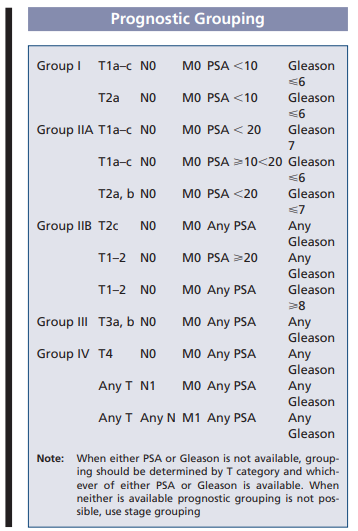

GRUPO_ESTADIO_CLINICO
 - X
 - Y
 - ['II', 'III', 'IV', 'Y', 'X', 'I']
 - 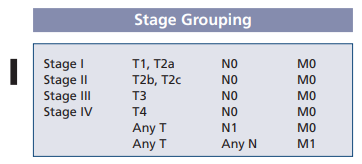

 TNM_T
 - X
 - Y
 - ['1C', '3', '2C', '3B', '1', '2', '2A', '1A', '2B', 'Y', 'X', '4', '3A', '0', '1B']
 - 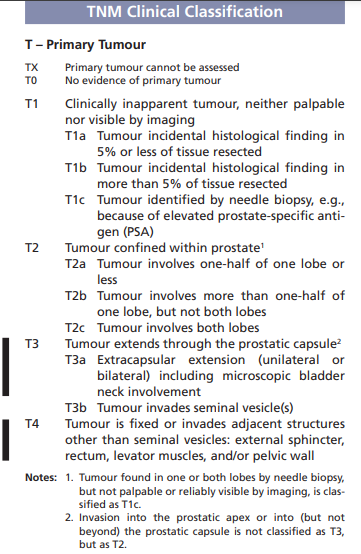

TNM_N
 - X
 - Y
 - ['0', '1', 'Y', 'X']
 - 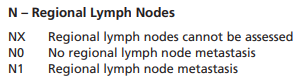

TNM_M
 - X
 - Y
 - ['0', '1', 'Y', 'X', '1B', '1C', '1A']
 - 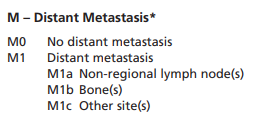

PSA
  - É a sigla para Antígeno Prostático Específico, uma proteína produzida pela próstata. O exame de PSA é um exame de sangue que mede a quantidade de PSA no sangue.
  - 1 – MENOR QUE 10
  - 2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
  - 3 – MAIOR OU IGUAL A 20
  - 8 – NÃO SE APLICA
  - 9 – X

GLEASON
  - A escala de Gleason é um sistema de pontuação que avalia a agressividade do câncer de próstata. Foi desenvolvida pelo patologista americano Donald Gleason na década de 1960.
  - 1 – MENOR OU IGUAL A 6
  - 2 – IGUAL A 7
  - 3 – MAIOR OU IGUAL A 8
  - 8 – NÃO SE APLICA
  - 9 – X

TRATAMENTO
  - A – Cirurgia
  - B – Radioterapia  
  - C – Quimioterapia
  - D – Cirurgia + Radioterapia
  - E – Cirurgia + Quimioterapia
  - F – Radioterapia + Quimioterapia
  - G – Cirurgia + Radio + Quimio
  - H – Cirurgia + Radio + Quimio + Hormonio
  - I – Outras combinações de tratamento
  - J – Nenhum tratamento realizado

ULTIMA_INFORMACAO_PACIENTE
 - 1 – VIVO, COM CÂNCER
 - 2 – VIVO, SOE (Sem outras especificações)
 - 3 – OBITO POR CANCER
 - 4 – OBITO POR OUTRAS CAUSAS, SOE (Sem outras especificações)

FAIXA_ETARIA
  - ['70+', '60-69', '50-59', '40-49']

SEM_RECIDIVA
  - 0 – Não
  - 1 – Sim

CID_O
  - Classificação Internacional de Doenças para Oncologia
  - https://fosp.saude.sp.gov.br/fosp/diretoria-adjunta-de-informacao-e-epidemiologia/cid-o/
  - 81403 - Adenocarcinoma, SOE (Sem outra especificação) - O termo adenocarcinoma indica que o tumor se origina em células glandulares. Sem outra especificação significa que não há detalhes adicionais sobre o subtipo específico do adenocarcinoma.
  - 85503 - Carcinoma de células acinosas - É o tipo mais comum de câncer de próstata (cerca de 95% dos casos). Origina-se nas células acinosas da glândula prostática, responsáveis pela produção do fluido prostático. É um subtipo específico de adenocarcinoma.

METASTASE
  - true or false

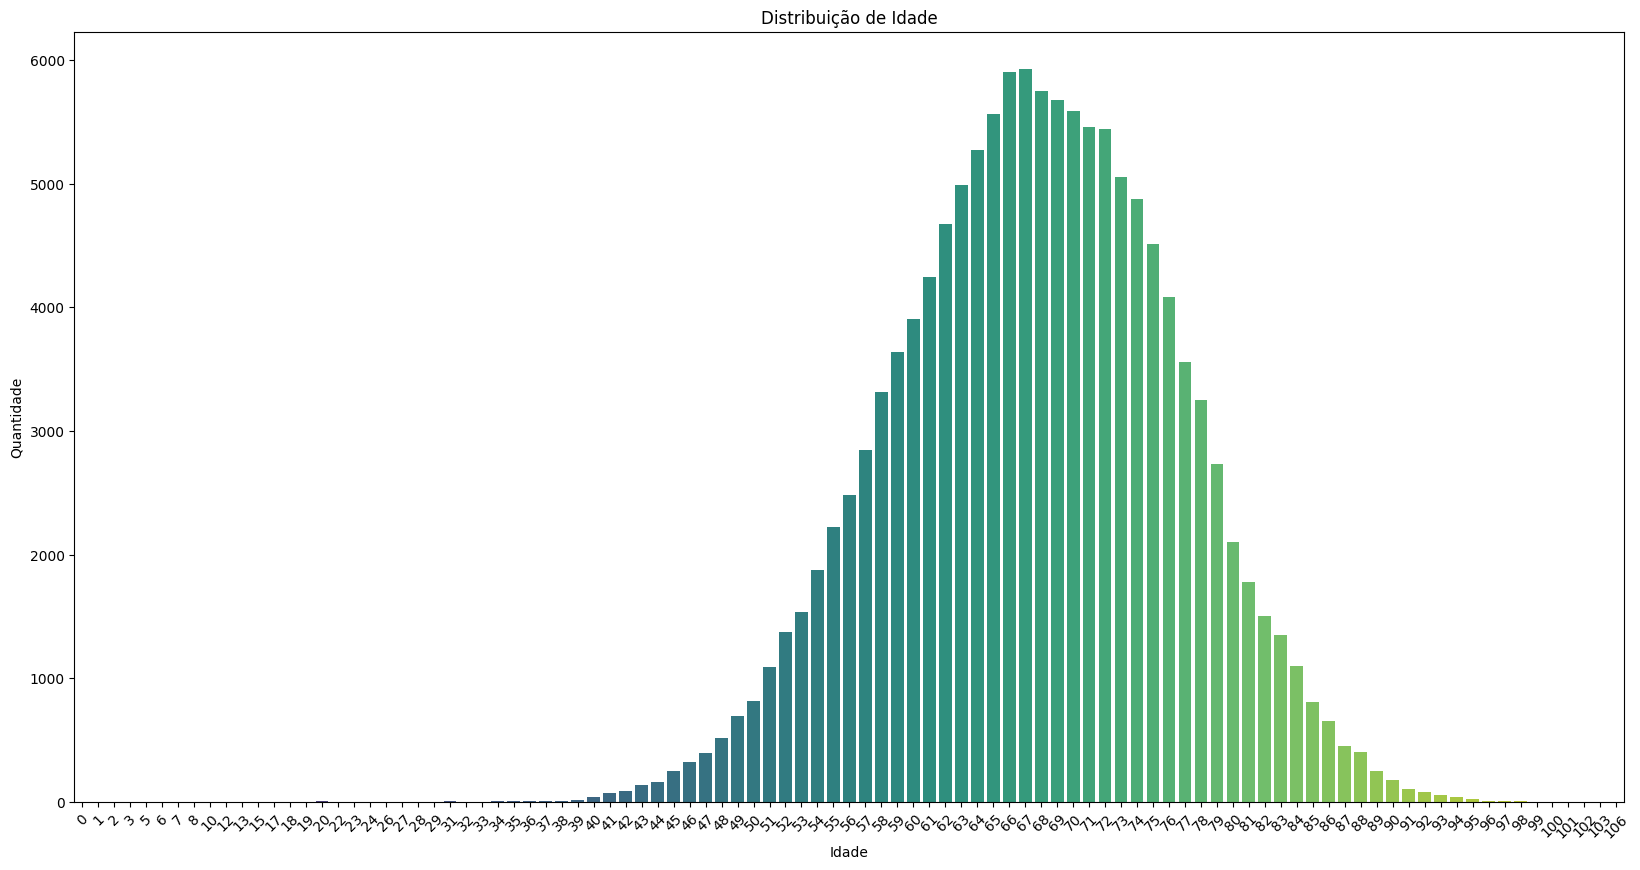

IDADE
0         3
1         4
2         3
3         2
5         1
6         1
7         3
8         1
10        1
12        2
13        2
15        3
17        1
18        2
19        1
20        5
22        1
23        1
24        1
26        1
27        1
28        1
29        1
31        5
32        2
33        3
34        6
35        5
36       10
37        9
38        8
39       19
40       40
41       77
42       91
43      135
44      165
45      254
46      322
47      397
48      521
49      694
50      819
51     1096
52     1372
53     1536
54     1880
55     2226
56     2483
57     2849
58     3316
59     3636
60     3906
61     4244
62     4677
63     4992
64     5273
65     5566
66     5903
67     5930
68     5747
69     5678
70     5591
71     5463
72     5439
73     5053
74     4873
75     4512
76     4081
77     3562
78     3254
79     2735
80     2104
81     1781
82     1503
83     1352
84     1098
85      809
86      652
87      457
88      404
89      252
90      17

In [ ]:
idade_counts = df_pacigeral.IDADE.value_counts().sort_index()

plt.figure(figsize=(20, 10))
sns.barplot(x=idade_counts.index, y=idade_counts.values, palette="viridis")

plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")
plt.xticks(rotation=45)

plt.show()
print(df_pacigeral.IDADE.value_counts().sort_index().to_string())

df_pacigeral = df_pacigeral[(df_pacigeral["IDADE"] >= 40) & (df_pacigeral["IDADE"] <= 95)]

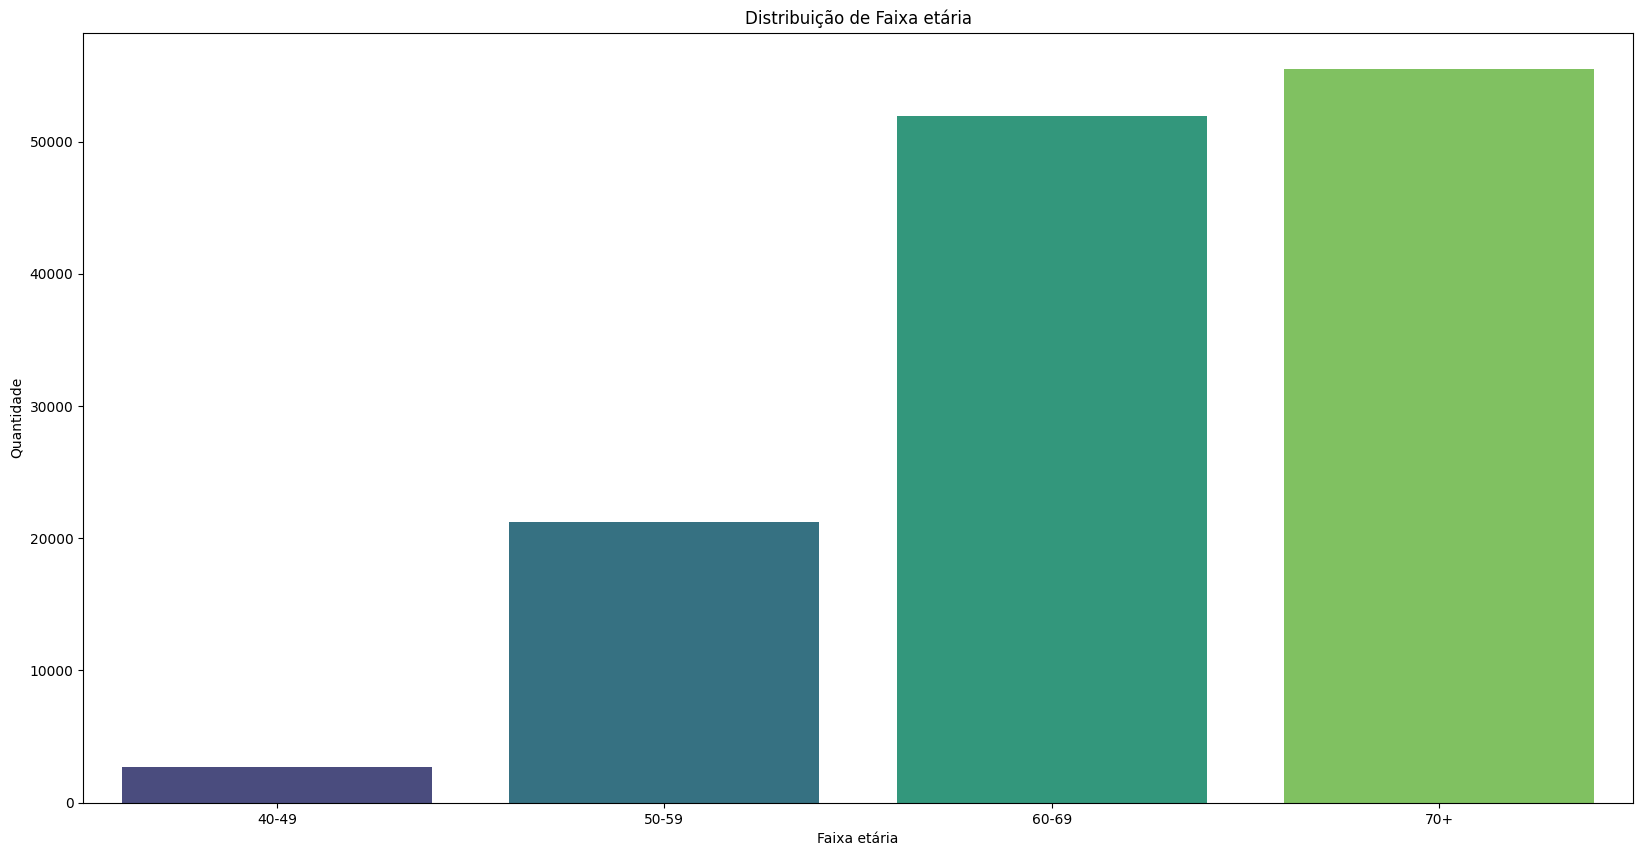

FAIXA_ETARIA
40-49     2696
50-59    21213
60-69    51916
70+      55461


In [ ]:
faixa_etaria_counts = df_pacigeral.FAIXA_ETARIA.value_counts().sort_index()

plt.figure(figsize=(20, 10))
sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette="viridis")

plt.xlabel("Faixa etária")
plt.ylabel("Quantidade")
plt.title("Distribuição de Faixa etária")
plt.show()
print(df_pacigeral.FAIXA_ETARIA.value_counts().sort_index().to_string())

In [ ]:
print(df_pacigeral[[
    "DIAS_ENTRE_CONSULTA_TRATAMENTO",
    "DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO",
    "CID_O"
]].isnull().sum())

df_pacigeral = df_pacigeral.dropna(subset=[
    "DIAS_ENTRE_CONSULTA_TRATAMENTO",
    "DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO",
    "CID_O"
])

DIAS_ENTRE_CONSULTA_TRATAMENTO       9734
DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO    9734
CID_O                                   1
dtype: int64


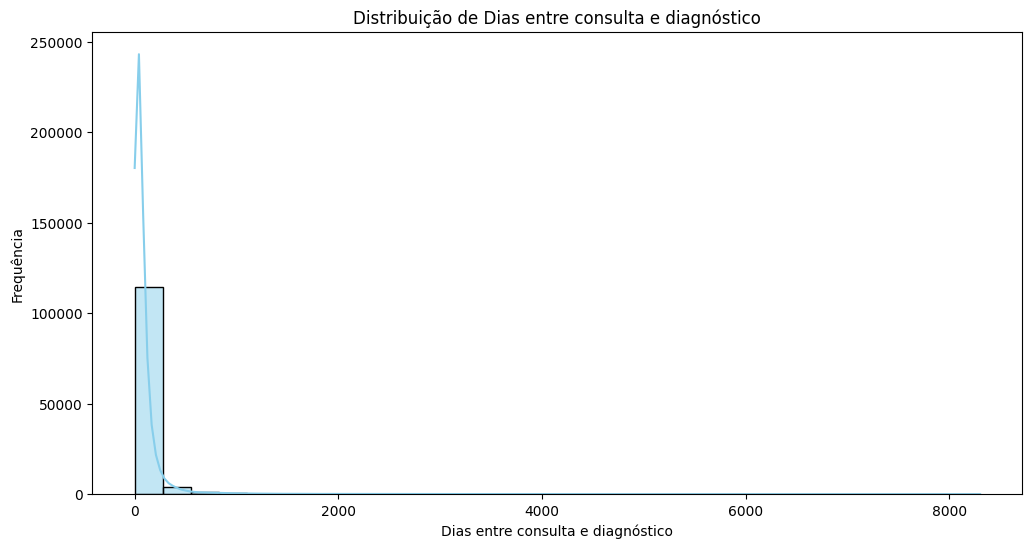

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_pacigeral["DIAS_ENTRE_CONSULTA_DIAGNOSTICO"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre consulta e diagnóstico")
plt.ylabel("Frequência")
plt.title("Distribuição de Dias entre consulta e diagnóstico")

plt.show()

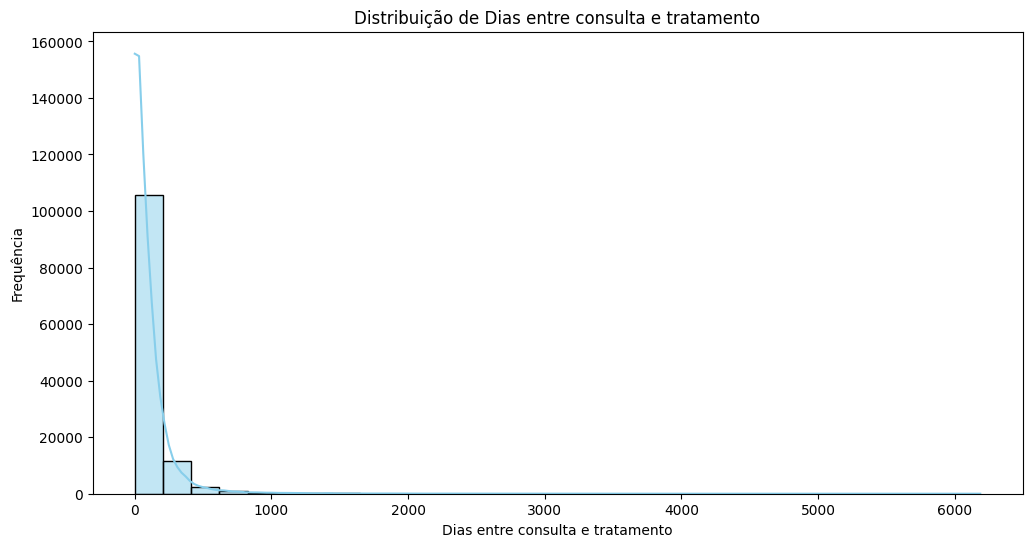

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_pacigeral["DIAS_ENTRE_CONSULTA_TRATAMENTO"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre consulta e tratamento")
plt.ylabel("Frequência")
plt.title("Distribuição de Dias entre consulta e tratamento")

plt.show()

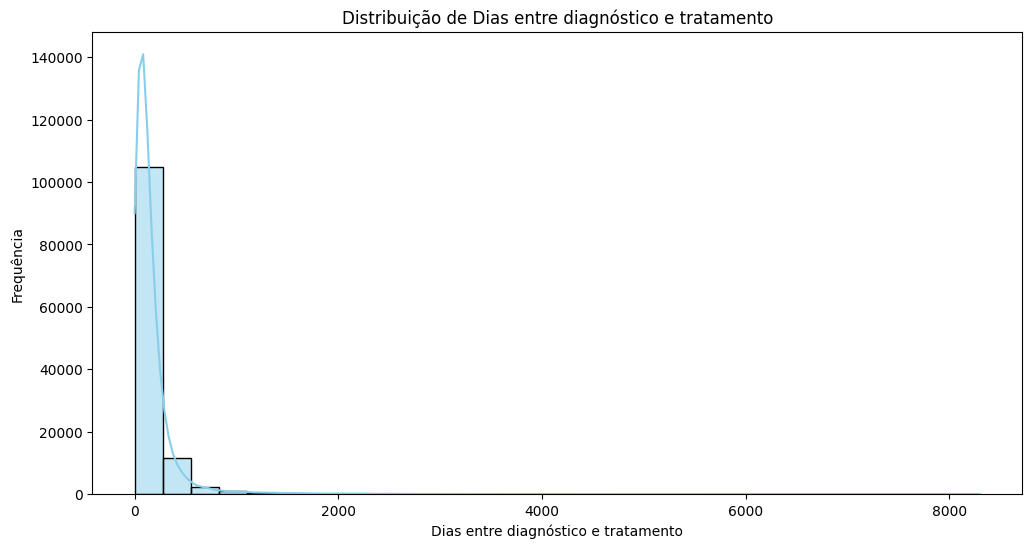

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_pacigeral["DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre diagnóstico e tratamento")
plt.ylabel("Frequência")
plt.title("Distribuição de Dias entre diagnóstico e tratamento")

plt.show()

In [ ]:
colunas = ["DIAS_ENTRE_CONSULTA_DIAGNOSTICO",
           "DIAS_ENTRE_CONSULTA_TRATAMENTO",
           "DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO"]

for col in colunas:
    min_val = df_pacigeral[col].min()
    max_val = df_pacigeral[col].max()

    start = np.floor(min_val / 30) * 30
    end = np.ceil(max_val / 30) * 30
    bins = np.arange(start, end + 30, 30)

    proporcao = df_pacigeral[col].value_counts(bins=bins, normalize=True).sort_index() * 100

    print(f"Proporção para {col}:")
    print(proporcao.to_string())
    print("\n")

Proporção para DIAS_ENTRE_CONSULTA_DIAGNOSTICO:
(-0.001, 30.0]      33.891124
(30.0, 60.0]        23.954554
(60.0, 90.0]        14.891692
(90.0, 120.0]        8.537157
(120.0, 150.0]       5.022583
(150.0, 180.0]       3.127082
(180.0, 210.0]       2.143133
(210.0, 240.0]       1.526108
(240.0, 270.0]       1.030020
(270.0, 300.0]       0.798019
(300.0, 330.0]       0.607153
(330.0, 360.0]       0.468116
(360.0, 390.0]       0.412995
(390.0, 420.0]       0.332371
(420.0, 450.0]       0.275604
(450.0, 480.0]       0.205675
(480.0, 510.0]       0.179349
(510.0, 540.0]       0.163717
(540.0, 570.0]       0.116823
(570.0, 600.0]       0.112710
(600.0, 630.0]       0.098724
(630.0, 660.0]       0.083915
(660.0, 690.0]       0.093788
(690.0, 720.0]       0.083093
(720.0, 750.0]       0.078979
(750.0, 780.0]       0.079802
(780.0, 810.0]       0.063348
(810.0, 840.0]       0.067461
(840.0, 870.0]       0.058412
(870.0, 900.0]       0.050185
(900.0, 930.0]       0.056766
(930.0, 960.0]       0

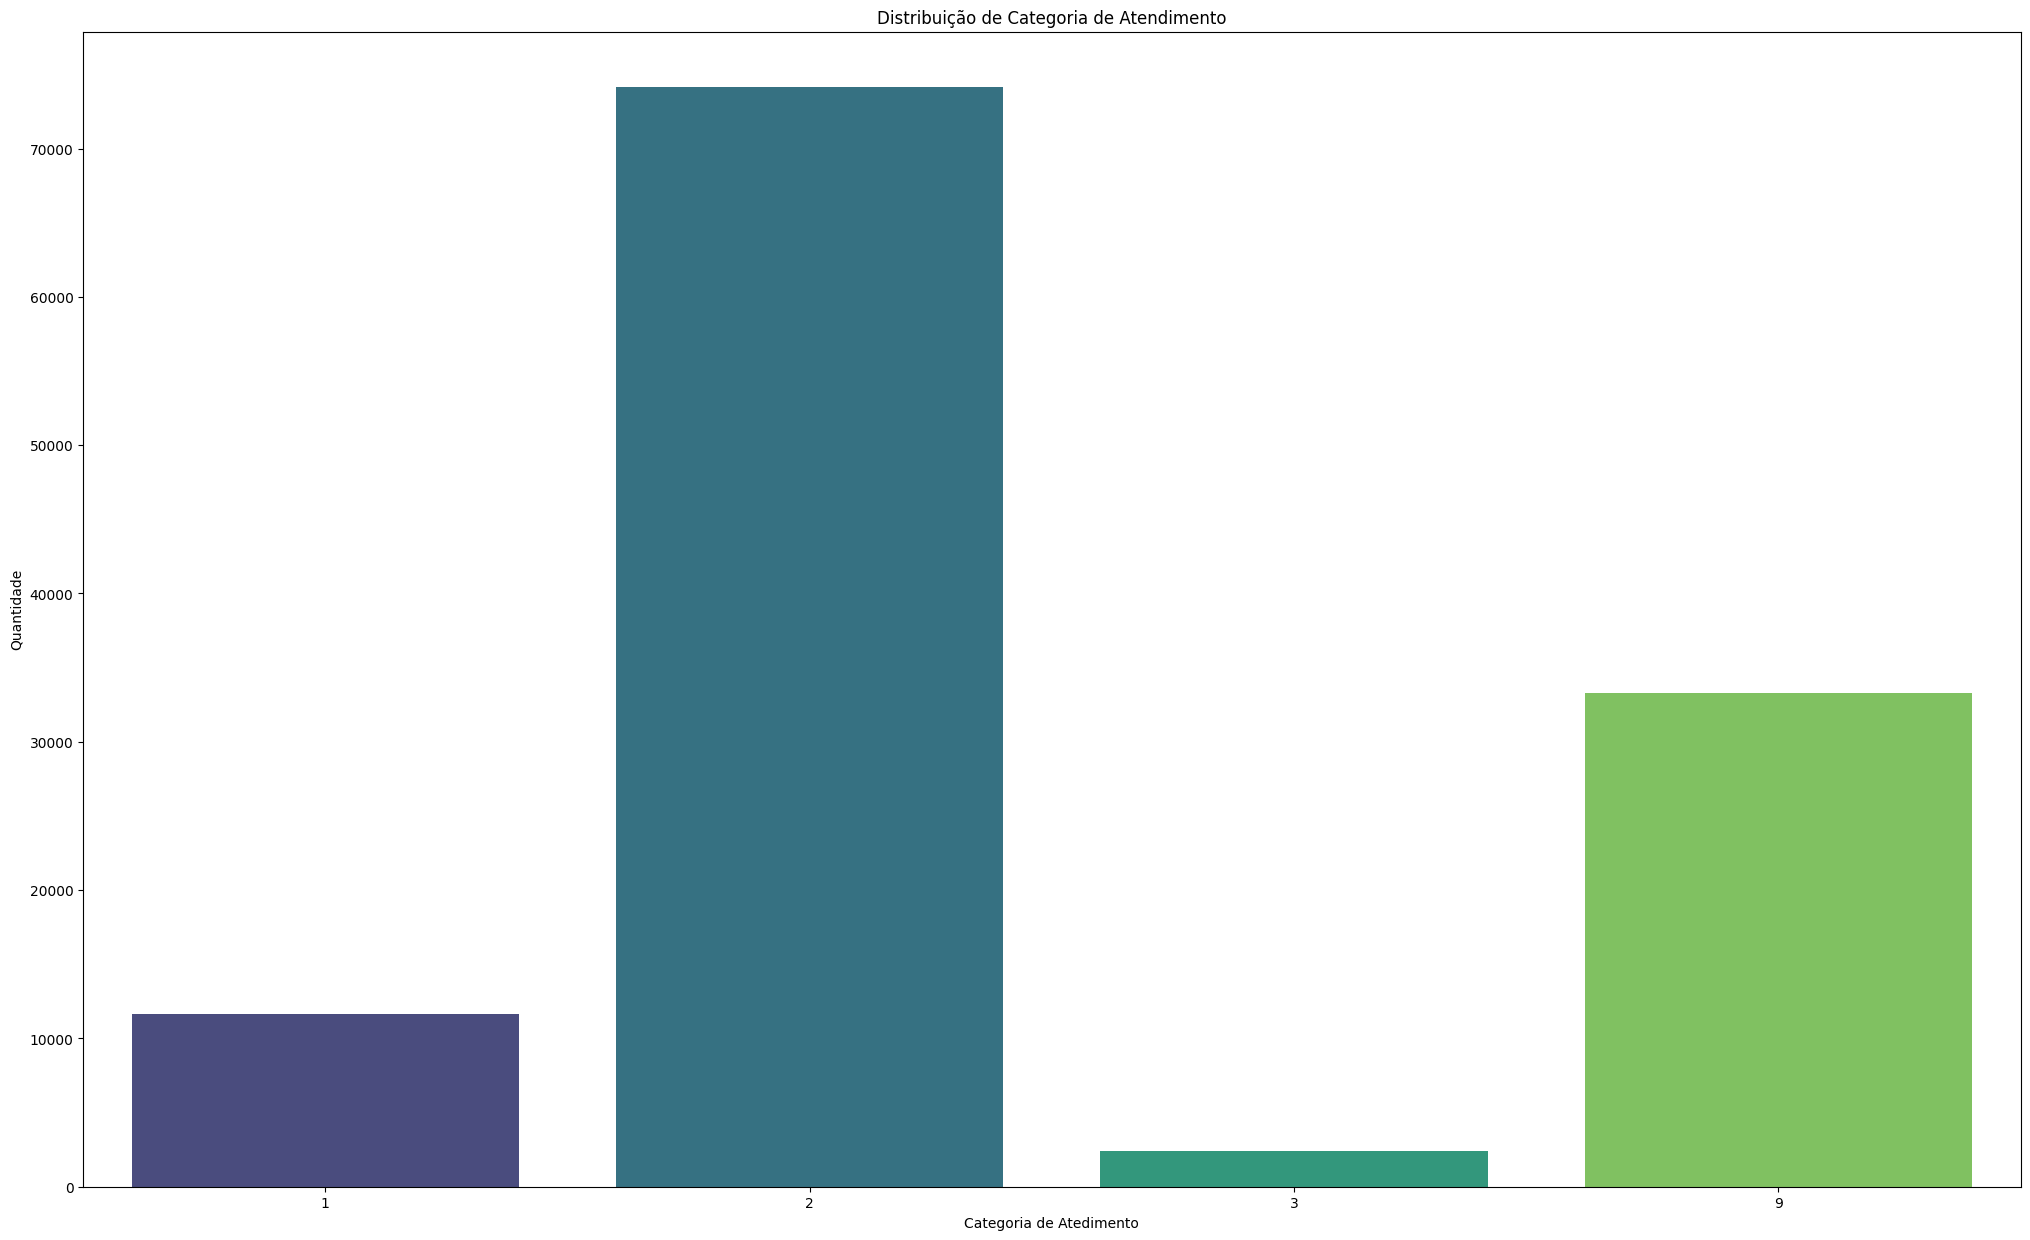

CATEGORIA_ATENDIMENTO
1    11673
2    74167
3     2431
9    33280


In [ ]:
categorica_atendimento_counts = df_pacigeral.CATEGORIA_ATENDIMENTO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=categorica_atendimento_counts.index, y=categorica_atendimento_counts.values, palette="viridis")

plt.xlabel("Categoria de Atedimento")
plt.ylabel("Quantidade")
plt.title("Distribuição de Categoria de Atendimento")

plt.show()
print(df_pacigeral.CATEGORIA_ATENDIMENTO.value_counts().sort_index().to_string())

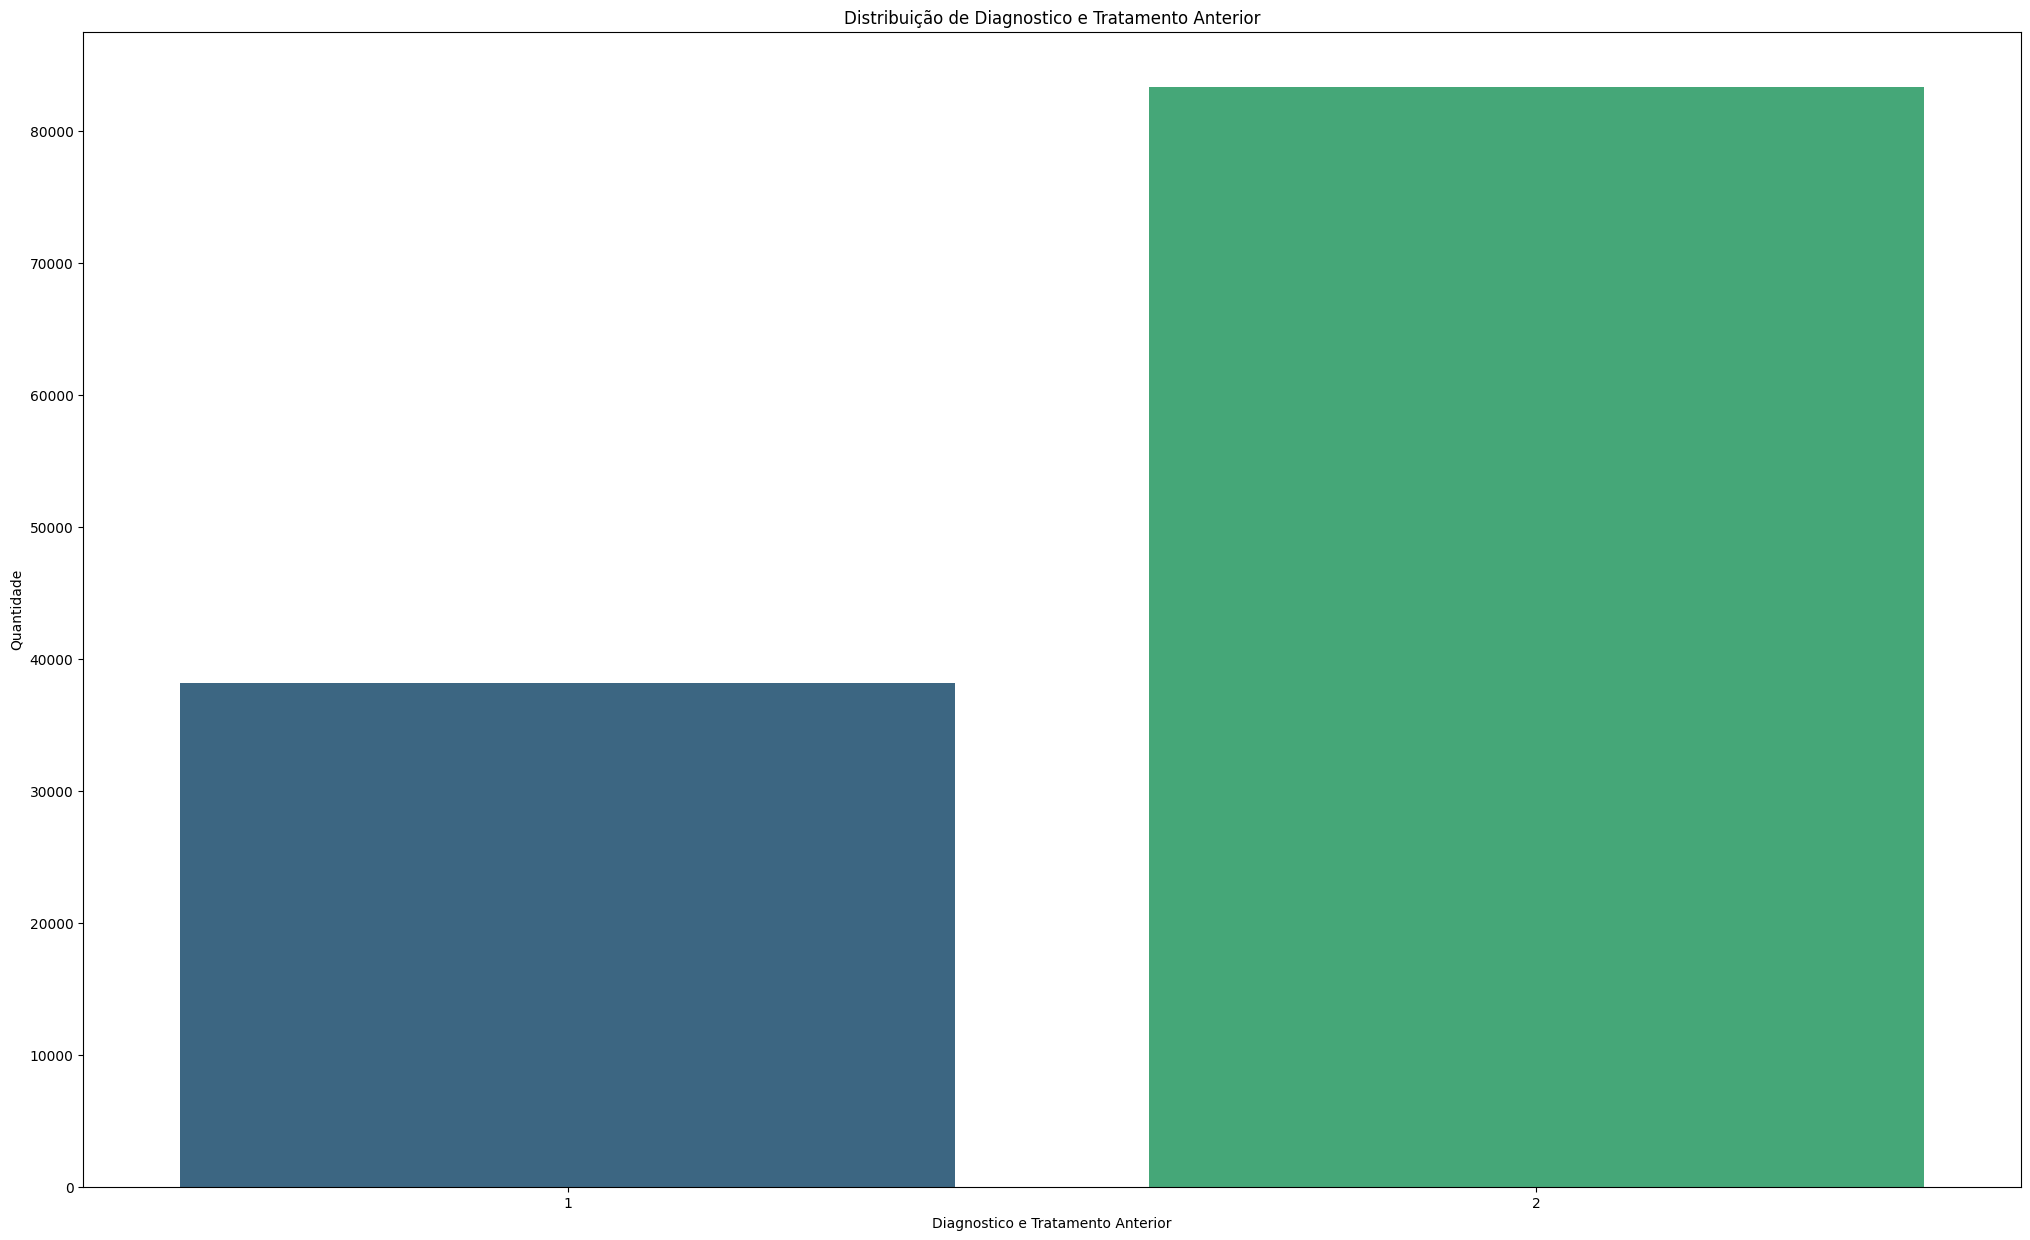

DIAGNOSTICO_E_TRATAMENTO_ANTERIOR
1    38191
2    83360


In [ ]:
diagnostico_e_tratamento_anterior_counts = df_pacigeral.DIAGNOSTICO_E_TRATAMENTO_ANTERIOR.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=diagnostico_e_tratamento_anterior_counts.index, y=diagnostico_e_tratamento_anterior_counts.values, palette="viridis")

plt.xlabel("Diagnostico e Tratamento Anterior")
plt.ylabel("Quantidade")
plt.title("Distribuição de Diagnostico e Tratamento Anterior")

plt.show()
print(df_pacigeral.DIAGNOSTICO_E_TRATAMENTO_ANTERIOR.value_counts().sort_index().to_string())

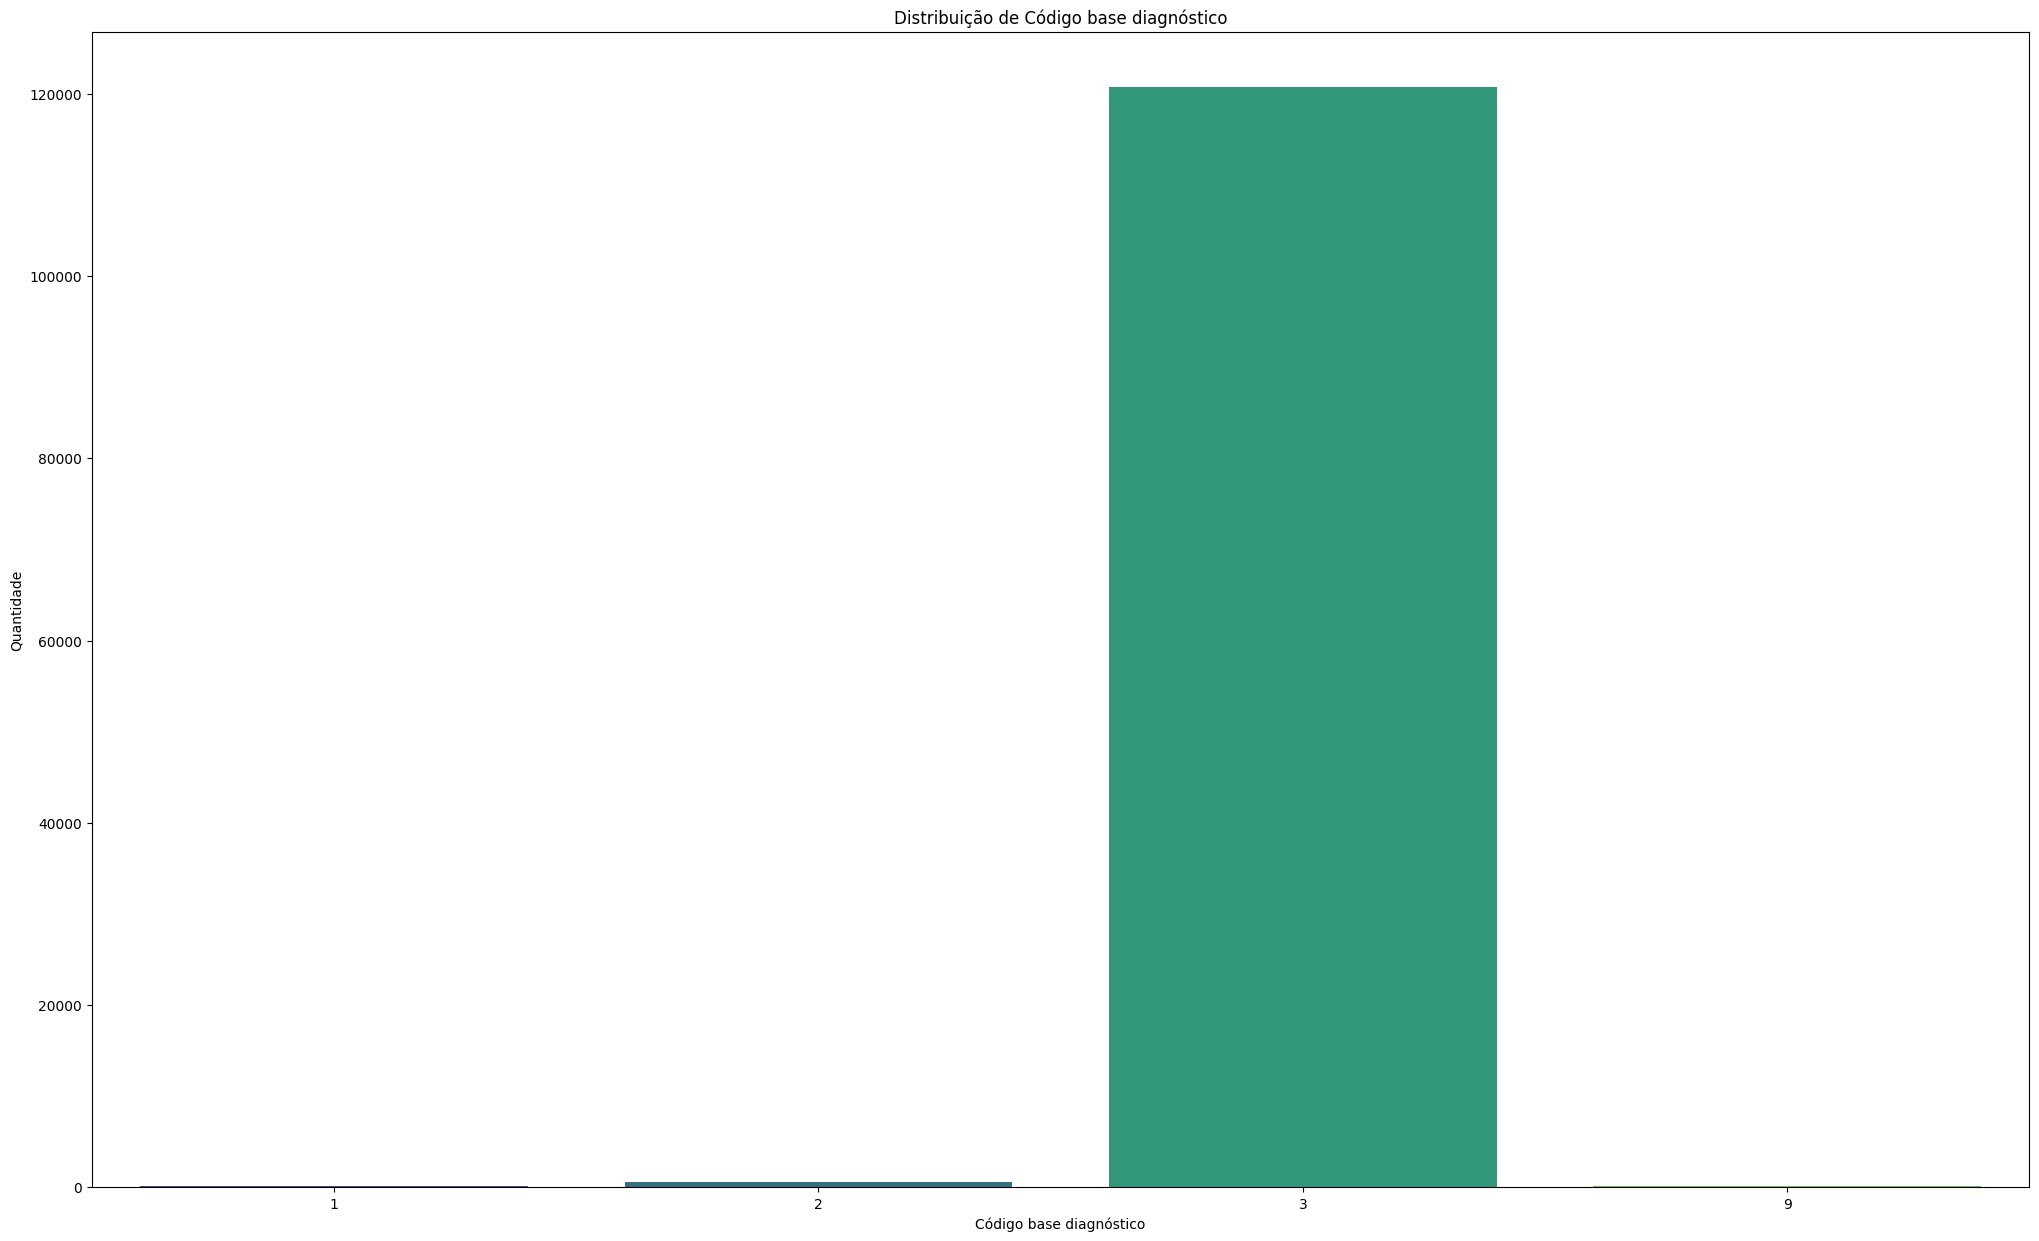

CODIGO_BASE_DIAGNOSTICO
1       109
2       599
3    120729
9       114


In [ ]:
codigo_base_diagnostico_counts = df_pacigeral.CODIGO_BASE_DIAGNOSTICO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=codigo_base_diagnostico_counts.index, y=codigo_base_diagnostico_counts.values, palette="viridis")

plt.xlabel("Código base diagnóstico")
plt.ylabel("Quantidade")
plt.title("Distribuição de Código base diagnóstico")

plt.show()
print(df_pacigeral.CODIGO_BASE_DIAGNOSTICO.value_counts().sort_index().to_string())

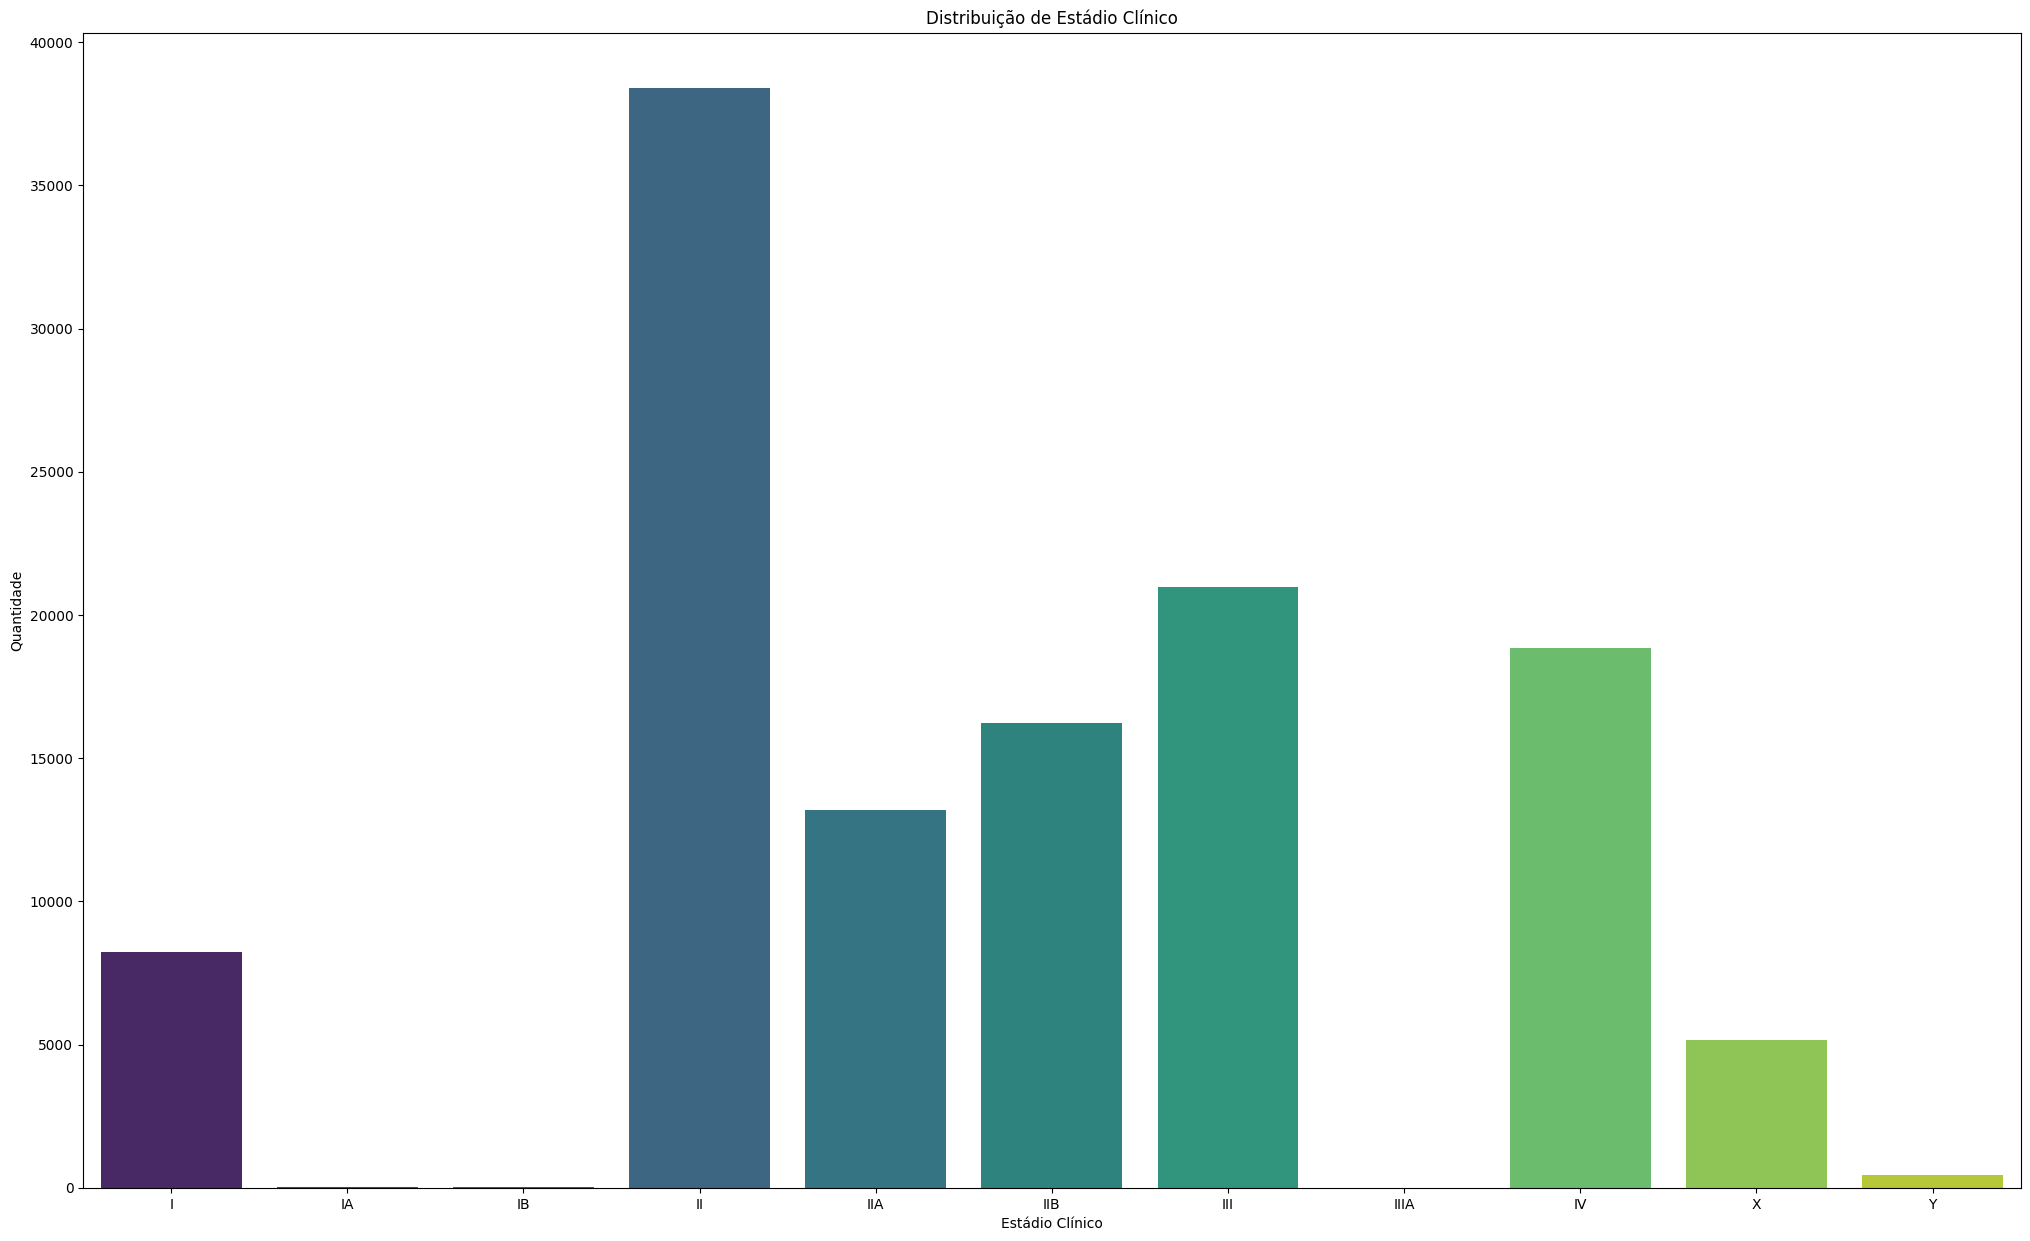

ESTADIO_CLINICO
I        8244
IA         12
IB         17
II      38412
IIA     13198
IIB     16228
III     20991
IIIA        7
IV      18831
X        5173
Y         438


In [ ]:
estadio_clinico_counts = df_pacigeral.ESTADIO_CLINICO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=estadio_clinico_counts.index, y=estadio_clinico_counts.values, palette="viridis")

plt.xlabel("Estádio Clínico")
plt.ylabel("Quantidade")
plt.title("Distribuição de Estádio Clínico")

plt.show()
print(df_pacigeral.ESTADIO_CLINICO.value_counts().sort_index().to_string())

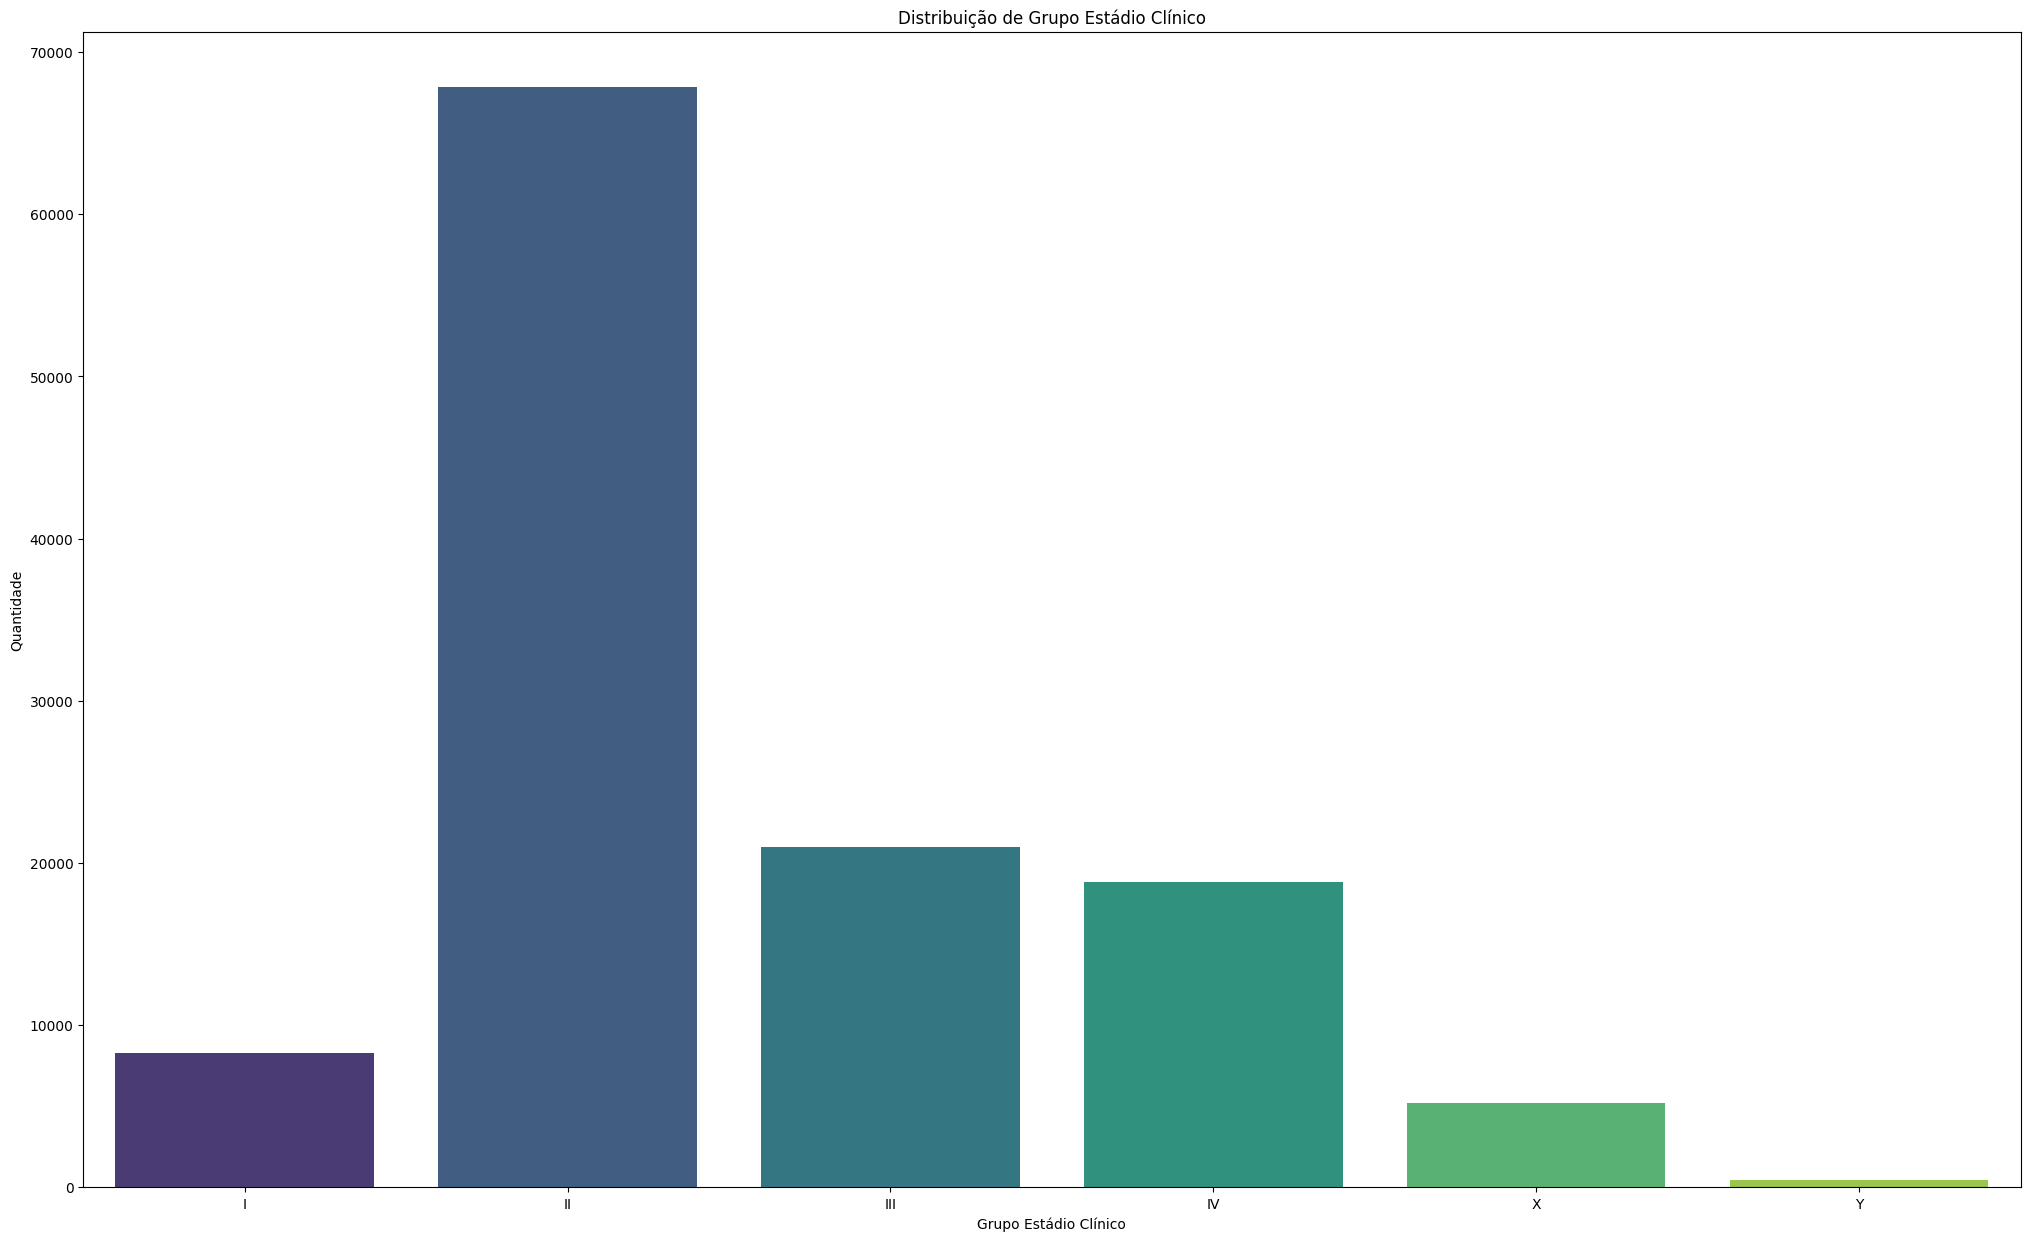

GRUPO_ESTADIO_CLINICO
I       8273
II     67838
III    20998
IV     18831
X       5173
Y        438


In [ ]:
grupo_estadio_clinico_counts = df_pacigeral.GRUPO_ESTADIO_CLINICO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=grupo_estadio_clinico_counts.index, y=grupo_estadio_clinico_counts.values, palette="viridis")

plt.xlabel("Grupo Estádio Clínico")
plt.ylabel("Quantidade")
plt.title("Distribuição de Grupo Estádio Clínico")

plt.show()
print(df_pacigeral.GRUPO_ESTADIO_CLINICO.value_counts().sort_index().to_string())

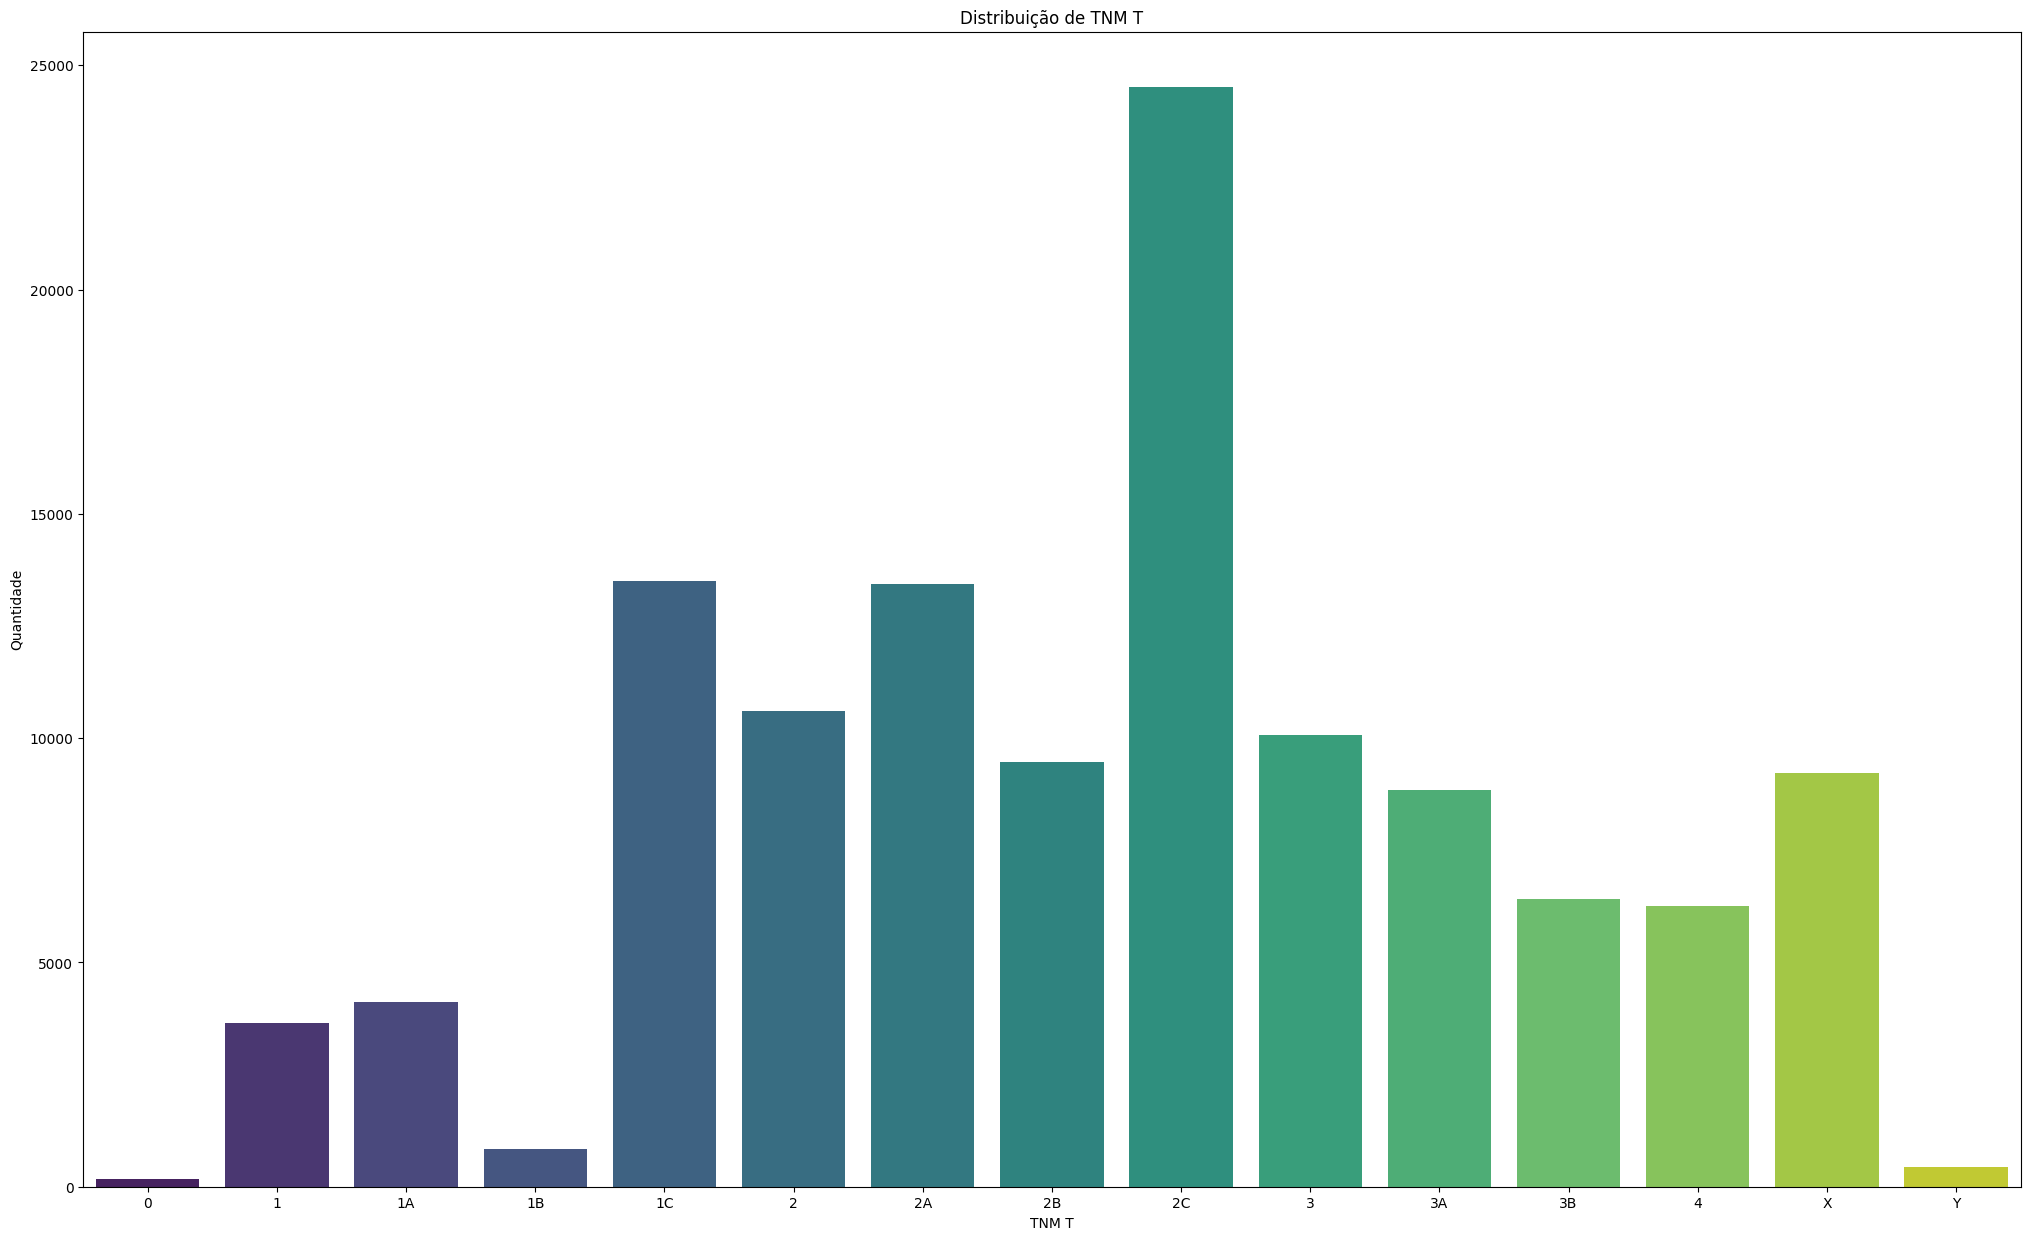

TNM_T
0       180
1      3640
1A     4129
1B      831
1C    13506
2     10600
2A    13432
2B     9462
2C    24522
3     10071
3A     8836
3B     6406
4      6264
X      9234
Y       438


In [ ]:
tnm_t_counts = df_pacigeral.TNM_T.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_t_counts.index, y=tnm_t_counts.values, palette="viridis")

plt.xlabel("TNM T")
plt.ylabel("Quantidade")
plt.title("Distribuição de TNM T")

plt.show()
print(df_pacigeral.TNM_T.value_counts().sort_index().to_string())

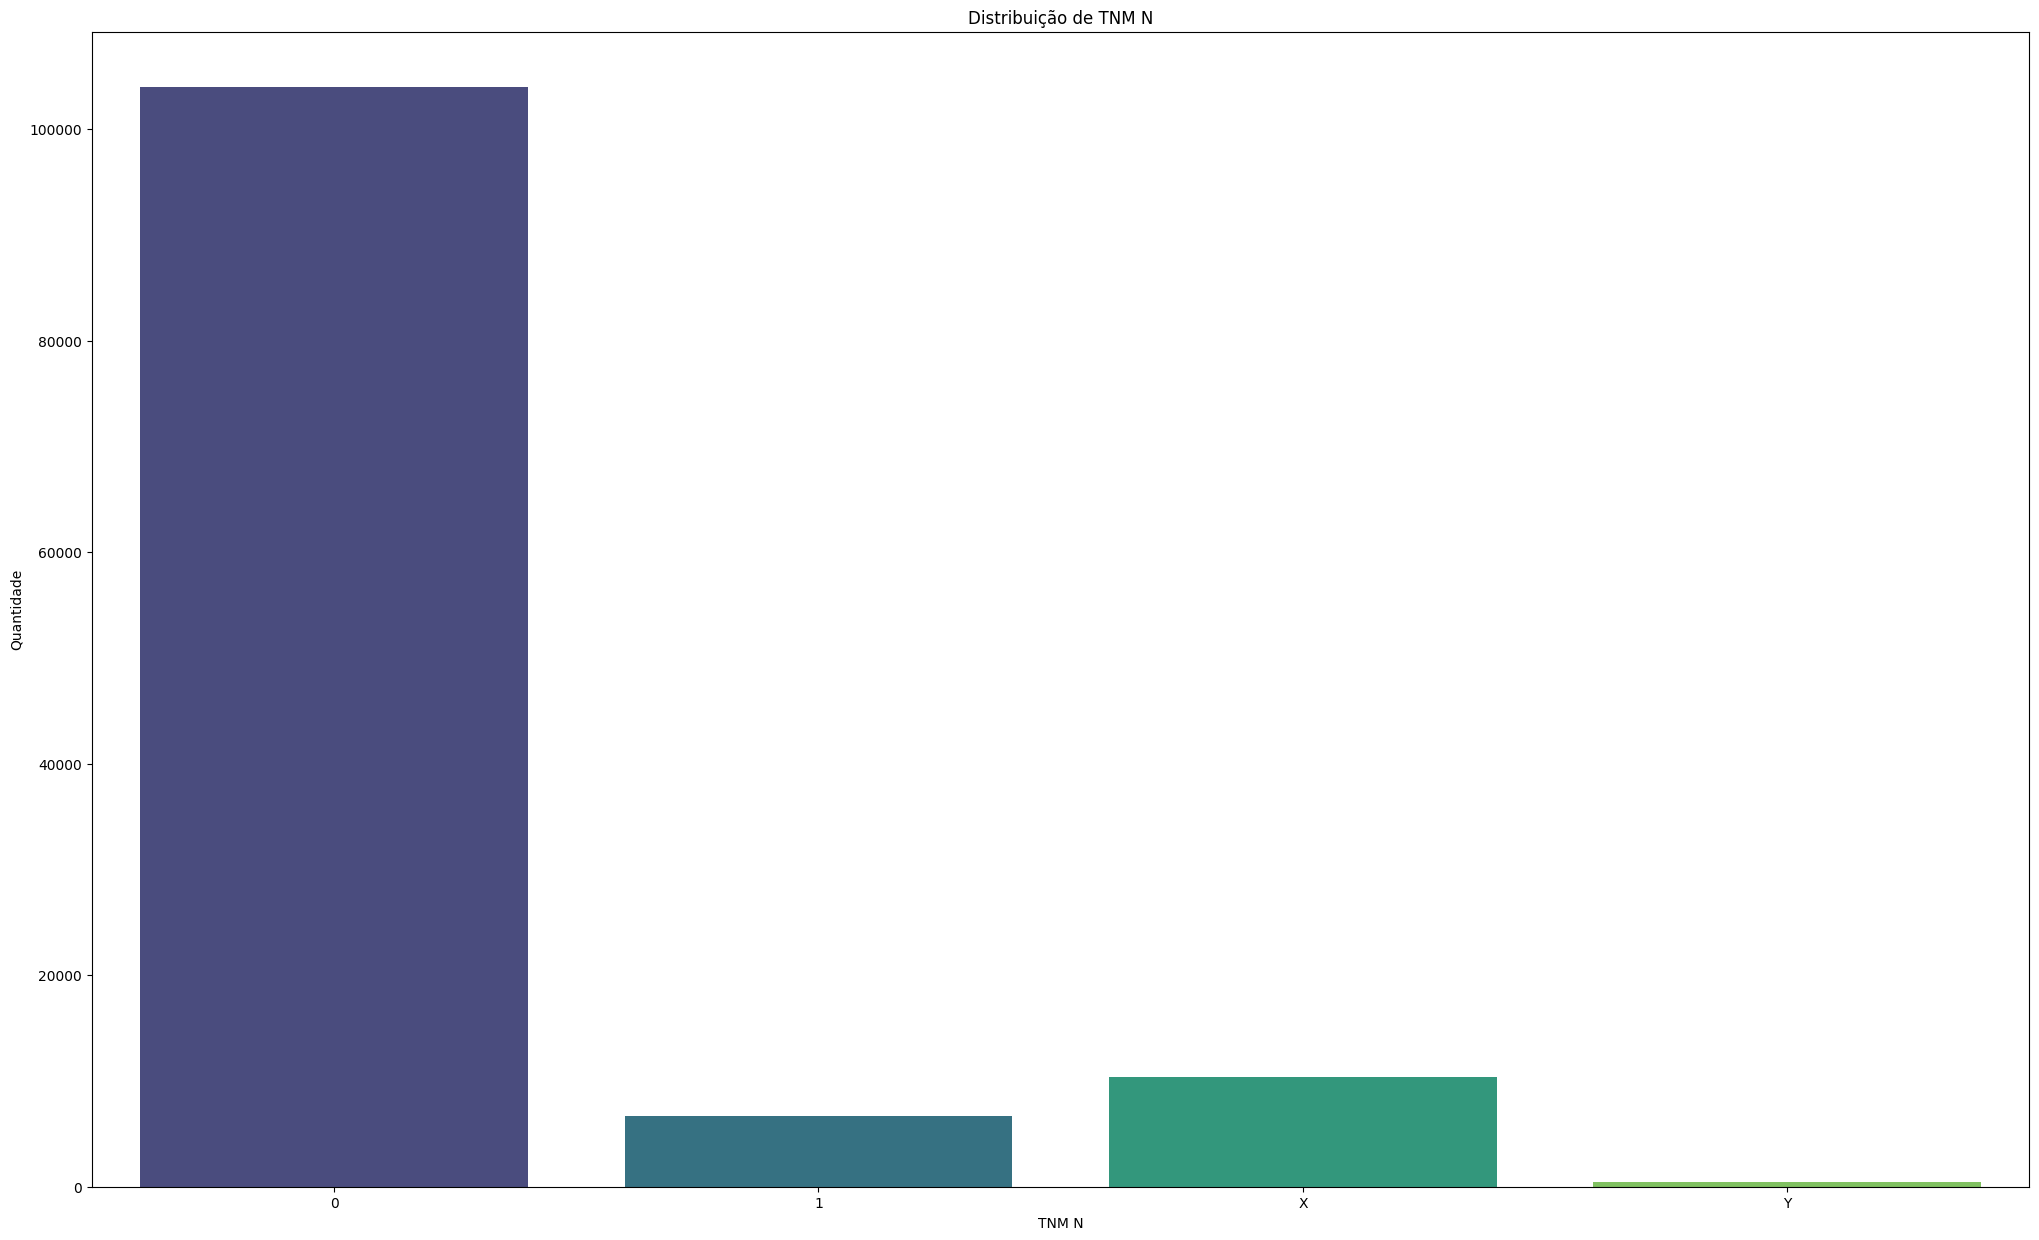

TNM_N
0    104019
1      6706
X     10388
Y       438


In [ ]:
tnm_n_counts = df_pacigeral.TNM_N.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_n_counts.index, y=tnm_n_counts.values, palette="viridis")

plt.xlabel("TNM N")
plt.ylabel("Quantidade")
plt.title("Distribuição de TNM N")

plt.show()
print(df_pacigeral.TNM_N.value_counts().sort_index().to_string())

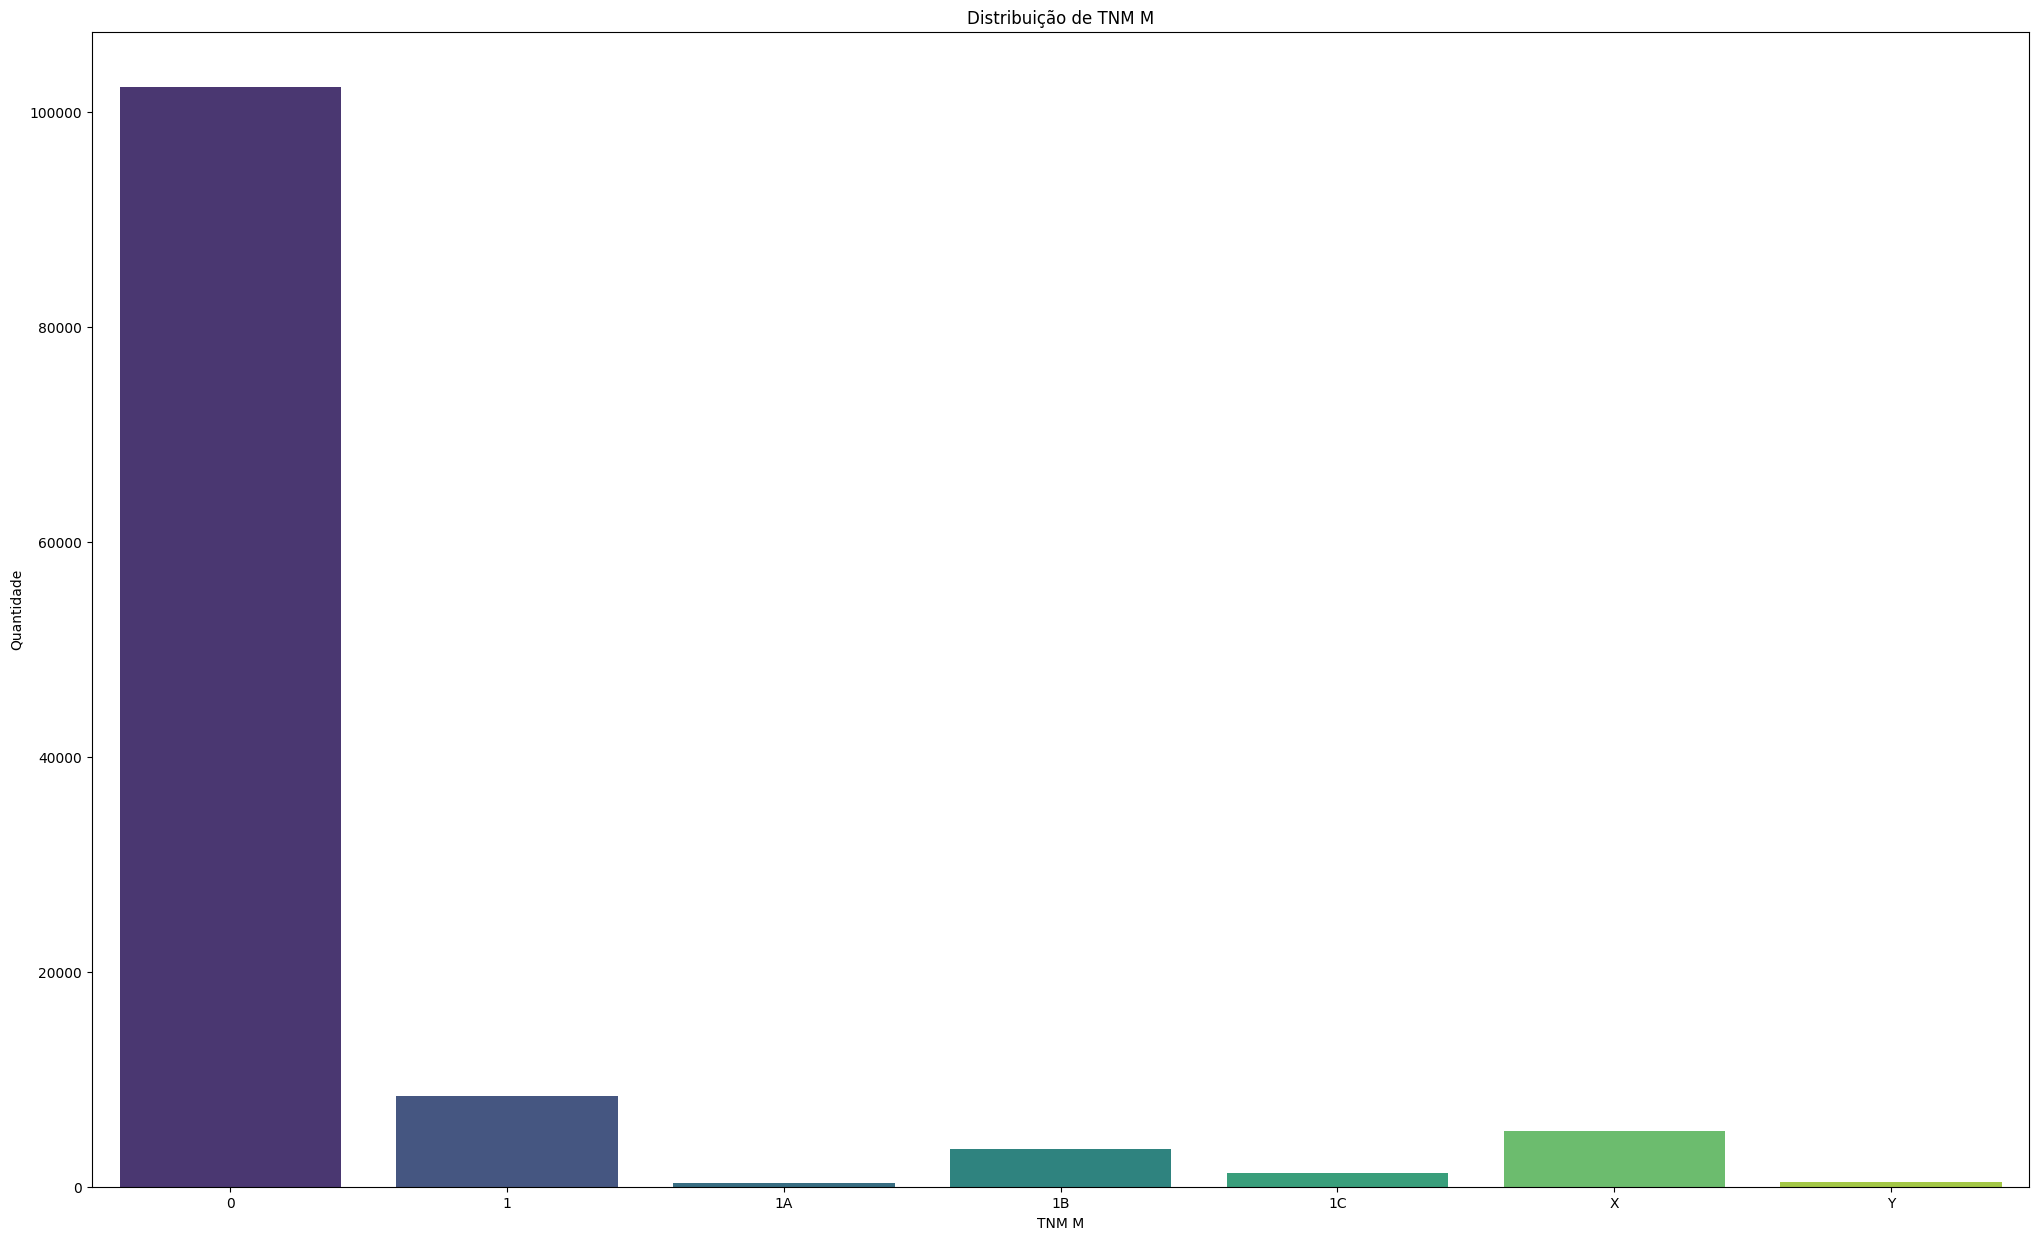

TNM_M
0     102362
1       8432
1A       352
1B      3488
1C      1266
X       5213
Y        438


In [ ]:
tnm_m_counts = df_pacigeral.TNM_M.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_m_counts.index, y=tnm_m_counts.values, palette="viridis")

plt.xlabel("TNM M")
plt.ylabel("Quantidade")
plt.title("Distribuição de TNM M")

plt.show()
print(df_pacigeral.TNM_M.value_counts().sort_index().to_string())

TNM_T TNM_N TNM_M  Quantidade
   2C     0     0       23239
   2A     0     0       13199
   1C     0     0       12886
    2     0     0        9506
   2B     0     0        8957
    3     0     0        8408
   3A     0     0        8010
    X     X     X        5173
   3B     0     0        4590
   1A     0     0        4101
    1     0     0        3371
    X     X     1        2468
    4     0     0        2404
    X     X    1B        1048
   3B     1     0         970
    4     1     1         885
   1B     0     0         800
    4     0     1         766
    4     1    1C         627
    3     0     1         480
    Y     Y     Y         438
   3A     1     0         426
    4     1     0         426
    3     1     1         423
    3     1     0         416
    2     0     1         415
    4     1    1B         336
   1C     0     1         328
   2C     0     1         318
   2C     0    1B         295
    4     0    1B         270
    4     X     1         253
    X     

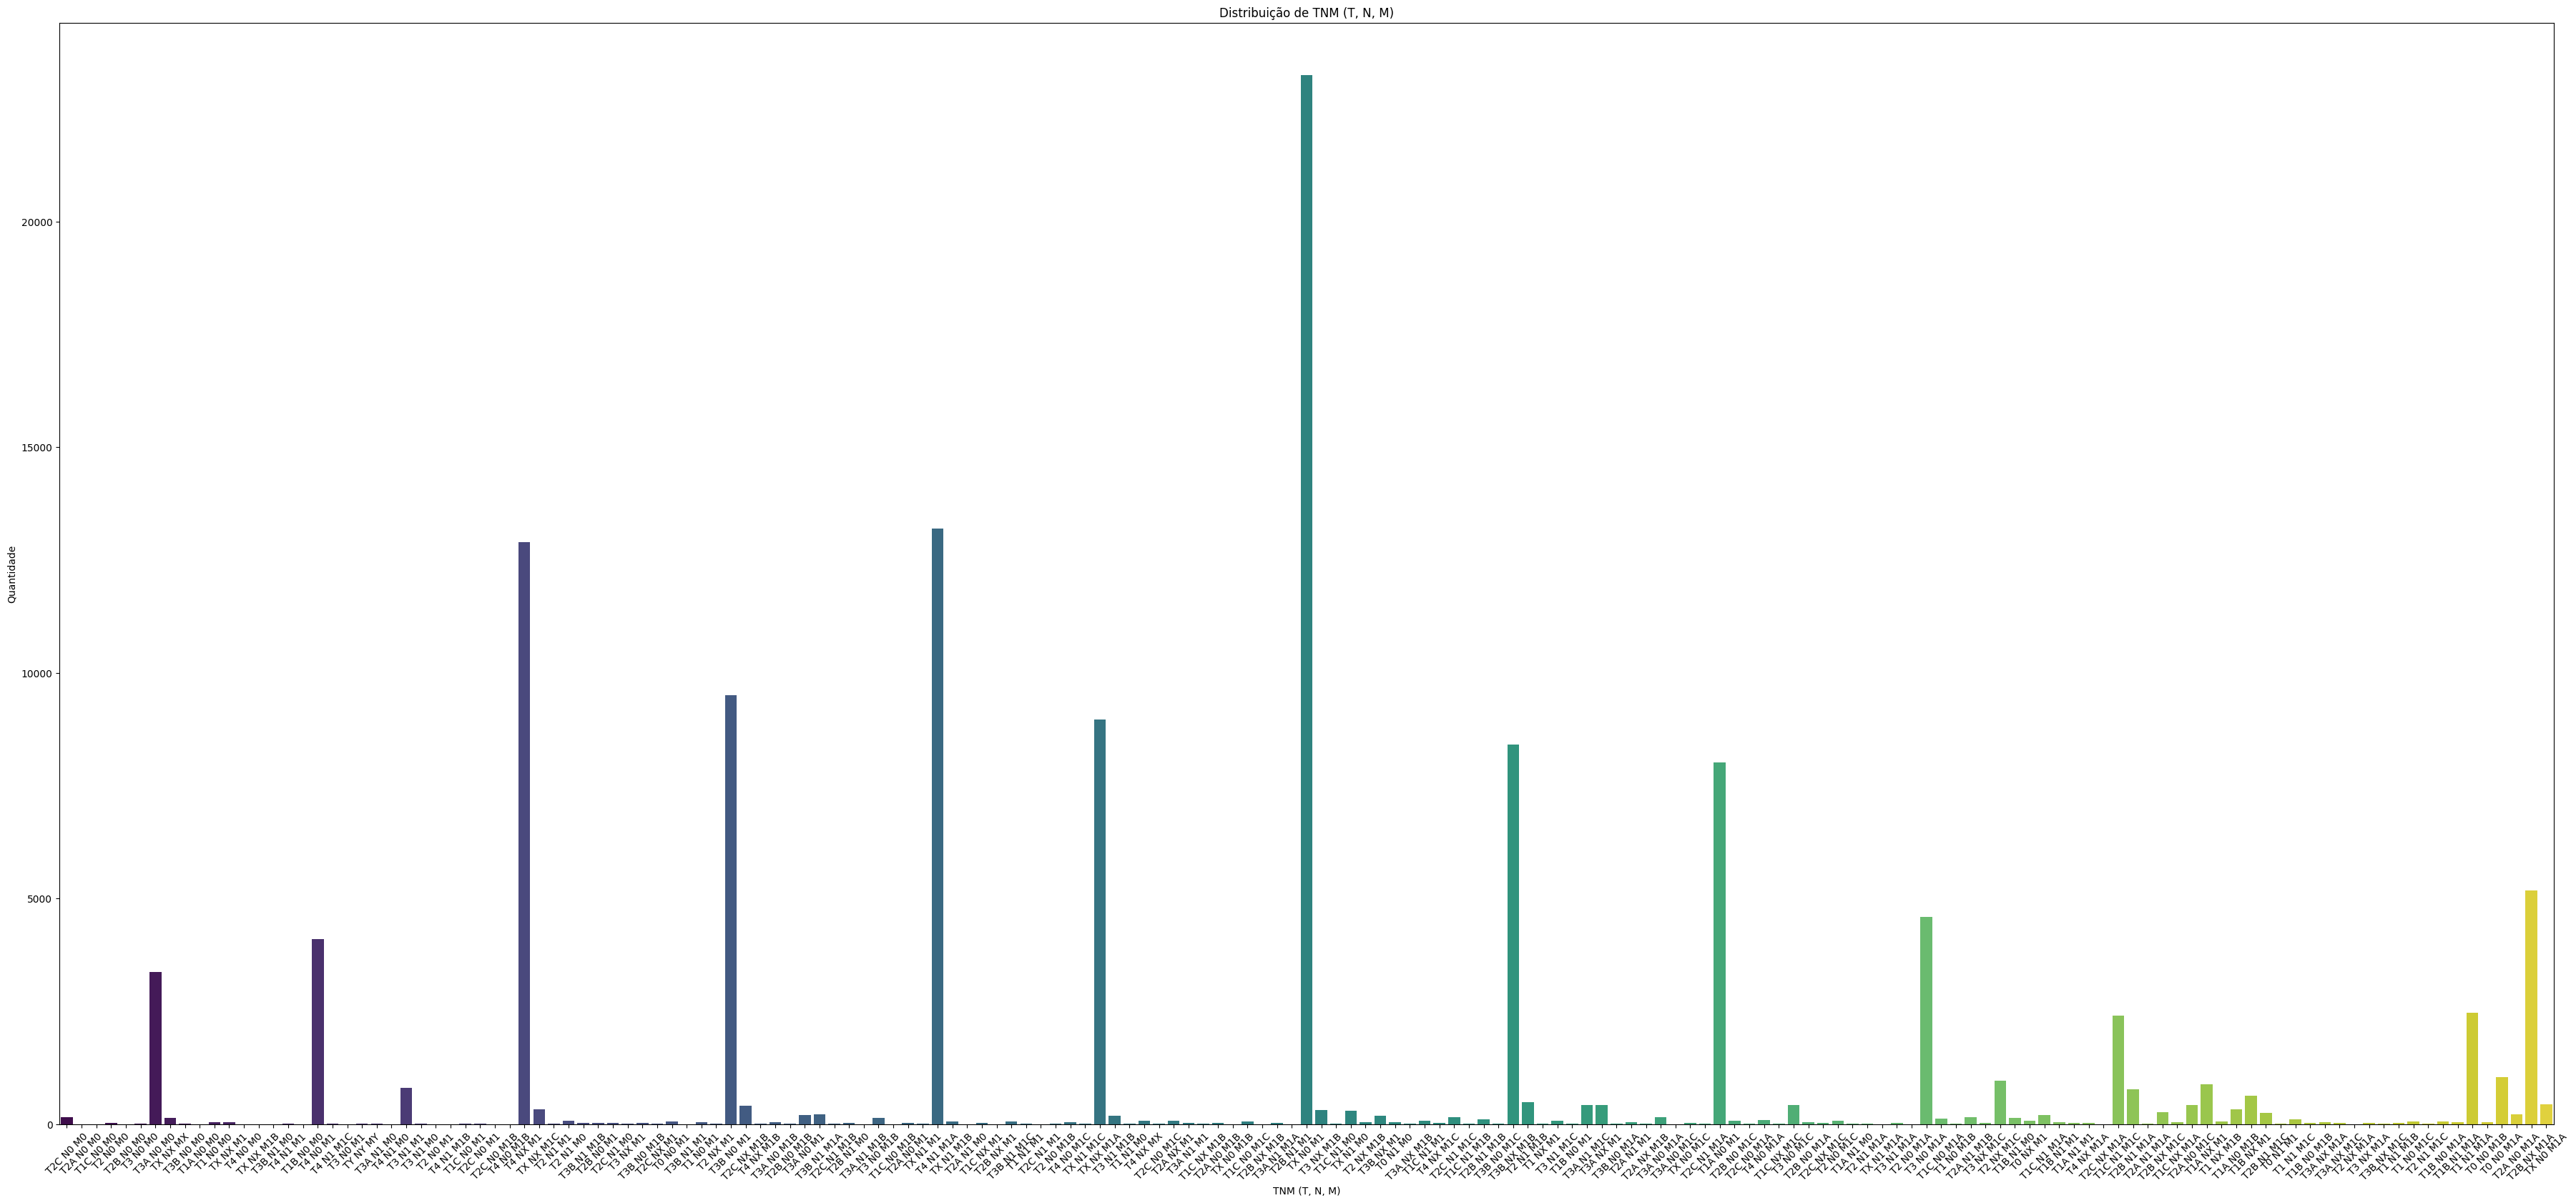

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tnm_counts = df_pacigeral.groupby(["TNM_T", "TNM_N", "TNM_M"]).size().reset_index(name="Quantidade")

tnm_counts = tnm_counts.sort_values(by="Quantidade", ascending=False)

print(tnm_counts.to_string(index=False))

plt.figure(figsize=(45, 20))
sns.barplot(x=tnm_counts.index, y=tnm_counts["Quantidade"], palette="viridis")

plt.xlabel("TNM (T, N, M)")
plt.ylabel("Quantidade")
plt.title("Distribuição de TNM (T, N, M)")

plt.xticks(ticks=range(len(tnm_counts)), labels=tnm_counts.apply(lambda x: f"T{x['TNM_T']} N{x['TNM_N']} M{x['TNM_M']}", axis=1), rotation=45)

plt.show()

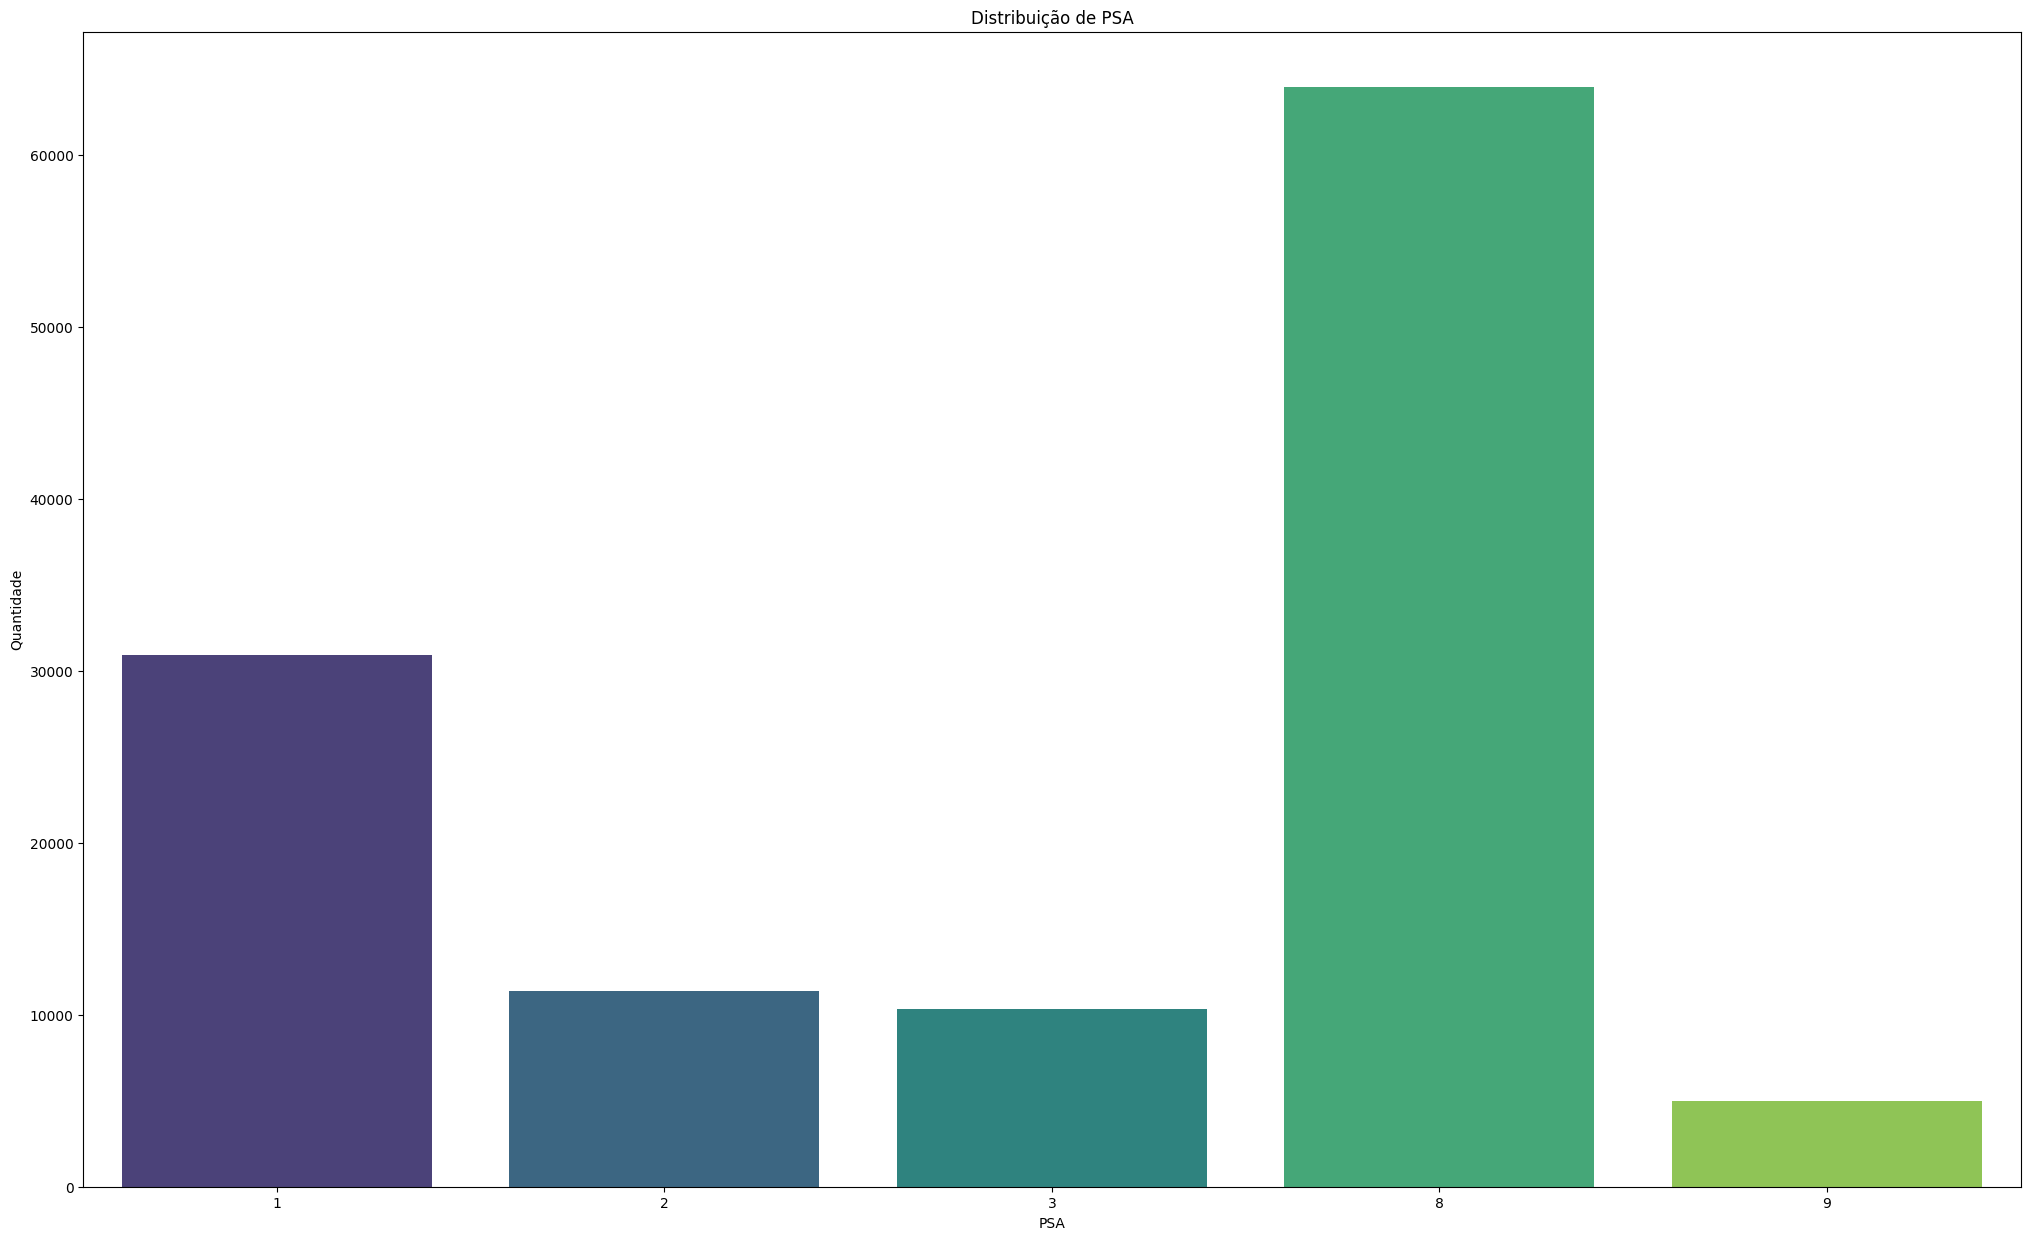

PSA
1    30892
2    11376
3    10359
8    63961
9     4963


In [ ]:
psa_counts = df_pacigeral.PSA.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=psa_counts.index, y=psa_counts.values, palette="viridis")

plt.xlabel("PSA")
plt.ylabel("Quantidade")
plt.title("Distribuição de PSA")

plt.show()
print(df_pacigeral.PSA.value_counts().sort_index().to_string())

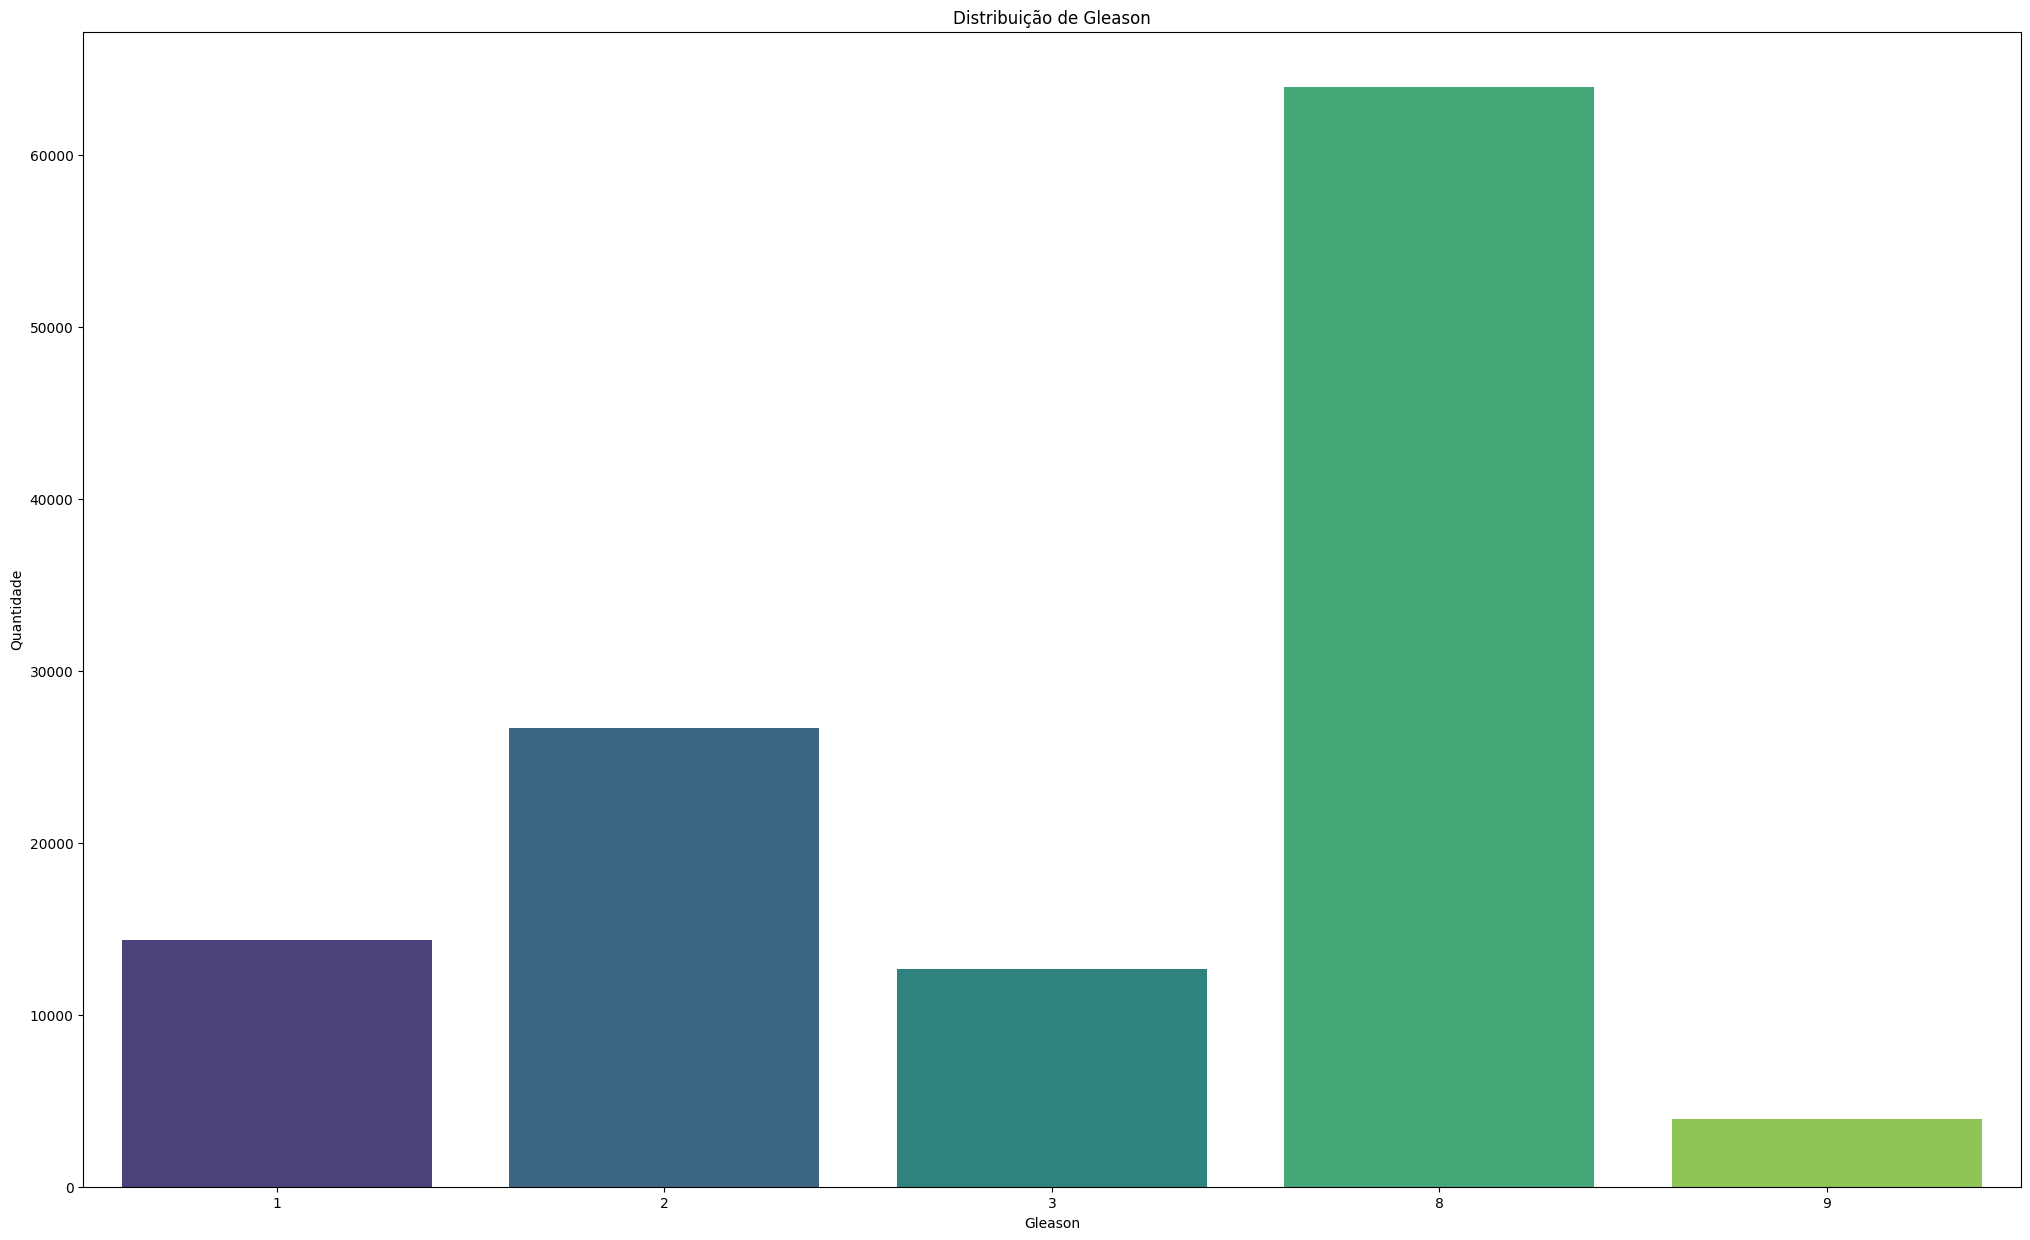

GLEASON
1    14350
2    26663
3    12645
8    63961
9     3932


In [ ]:
gleason_counts = df_pacigeral.GLEASON.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=gleason_counts.index, y=gleason_counts.values, palette="viridis")

plt.xlabel("Gleason")
plt.ylabel("Quantidade")
plt.title("Distribuição de Gleason")

plt.show()
print(df_pacigeral.GLEASON.value_counts().sort_index().to_string())

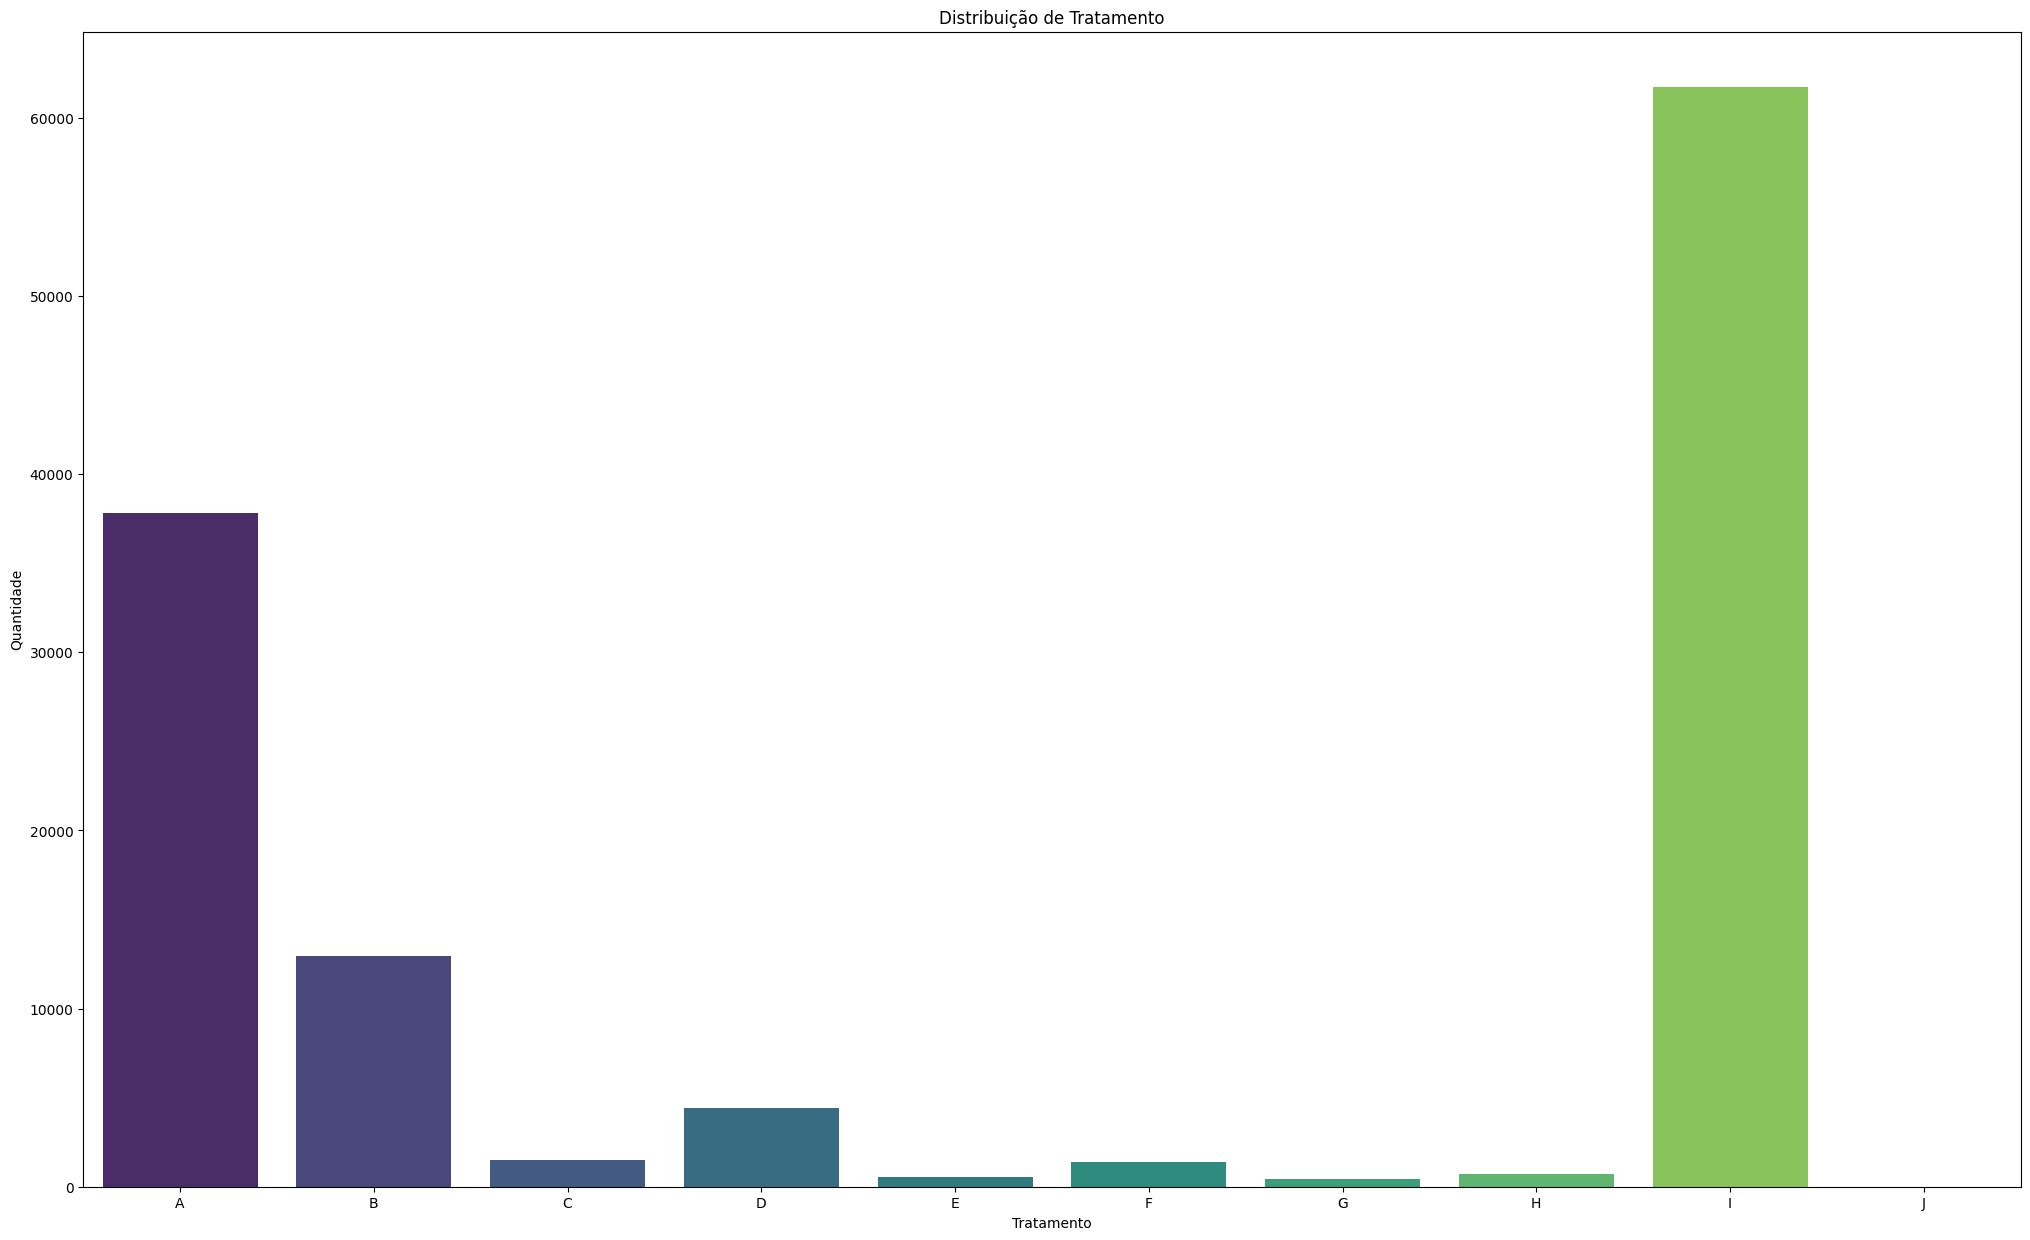

TRATAMENTO
A    37808
B    12976
C     1512
D     4420
E      556
F     1386
G      414
H      730
I    61740
J        9
TRATAMENTO
A    31.104639
B    10.675354
C     1.243922
D     3.636334
E     0.457421
F     1.140262
G     0.340598
H     0.600571
I    50.793494
J     0.007404


In [ ]:
tratamento_counts = df_pacigeral.TRATAMENTO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tratamento_counts.index, y=tratamento_counts.values, palette="viridis")

plt.xlabel("Tratamento")
plt.ylabel("Quantidade")
plt.title("Distribuição de Tratamento")

plt.show()
print(df_pacigeral.TRATAMENTO.value_counts().sort_index().to_string())
porcentagem = (df_pacigeral.TRATAMENTO.value_counts(normalize=True).sort_index() * 100)
print(porcentagem.to_string())

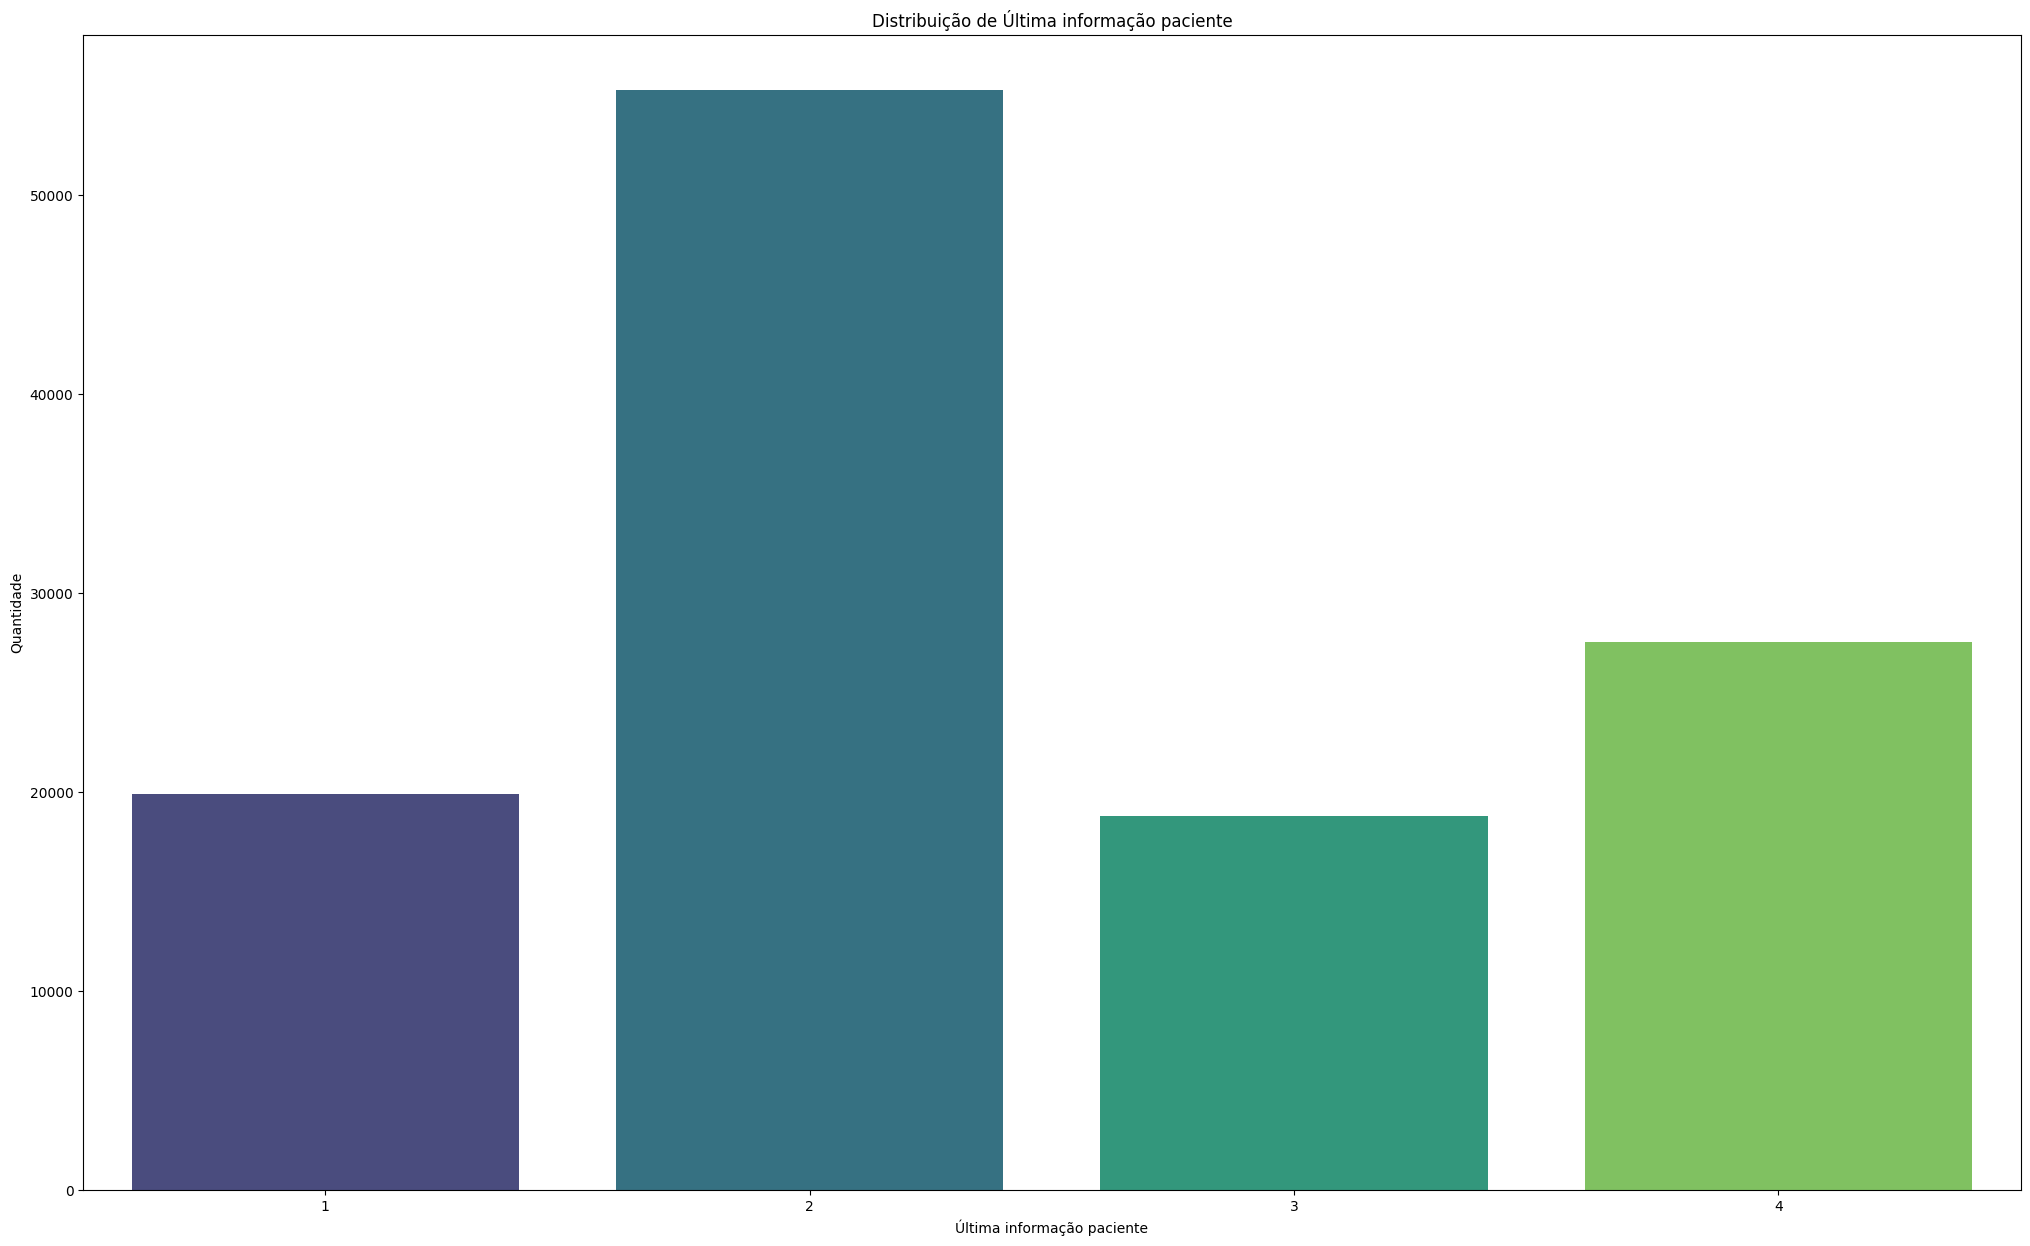

ULTIMA_INFORMACAO_PACIENTE
1    19931
2    55265
3    18825
4    27530


In [ ]:
ultima_informacao_paciente_counts = df_pacigeral.ULTIMA_INFORMACAO_PACIENTE.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=ultima_informacao_paciente_counts.index, y=ultima_informacao_paciente_counts.values, palette="viridis")

plt.xlabel("Última informação paciente")
plt.ylabel("Quantidade")
plt.title("Distribuição de Última informação paciente")

plt.show()
print(df_pacigeral.ULTIMA_INFORMACAO_PACIENTE.value_counts().sort_index().to_string())

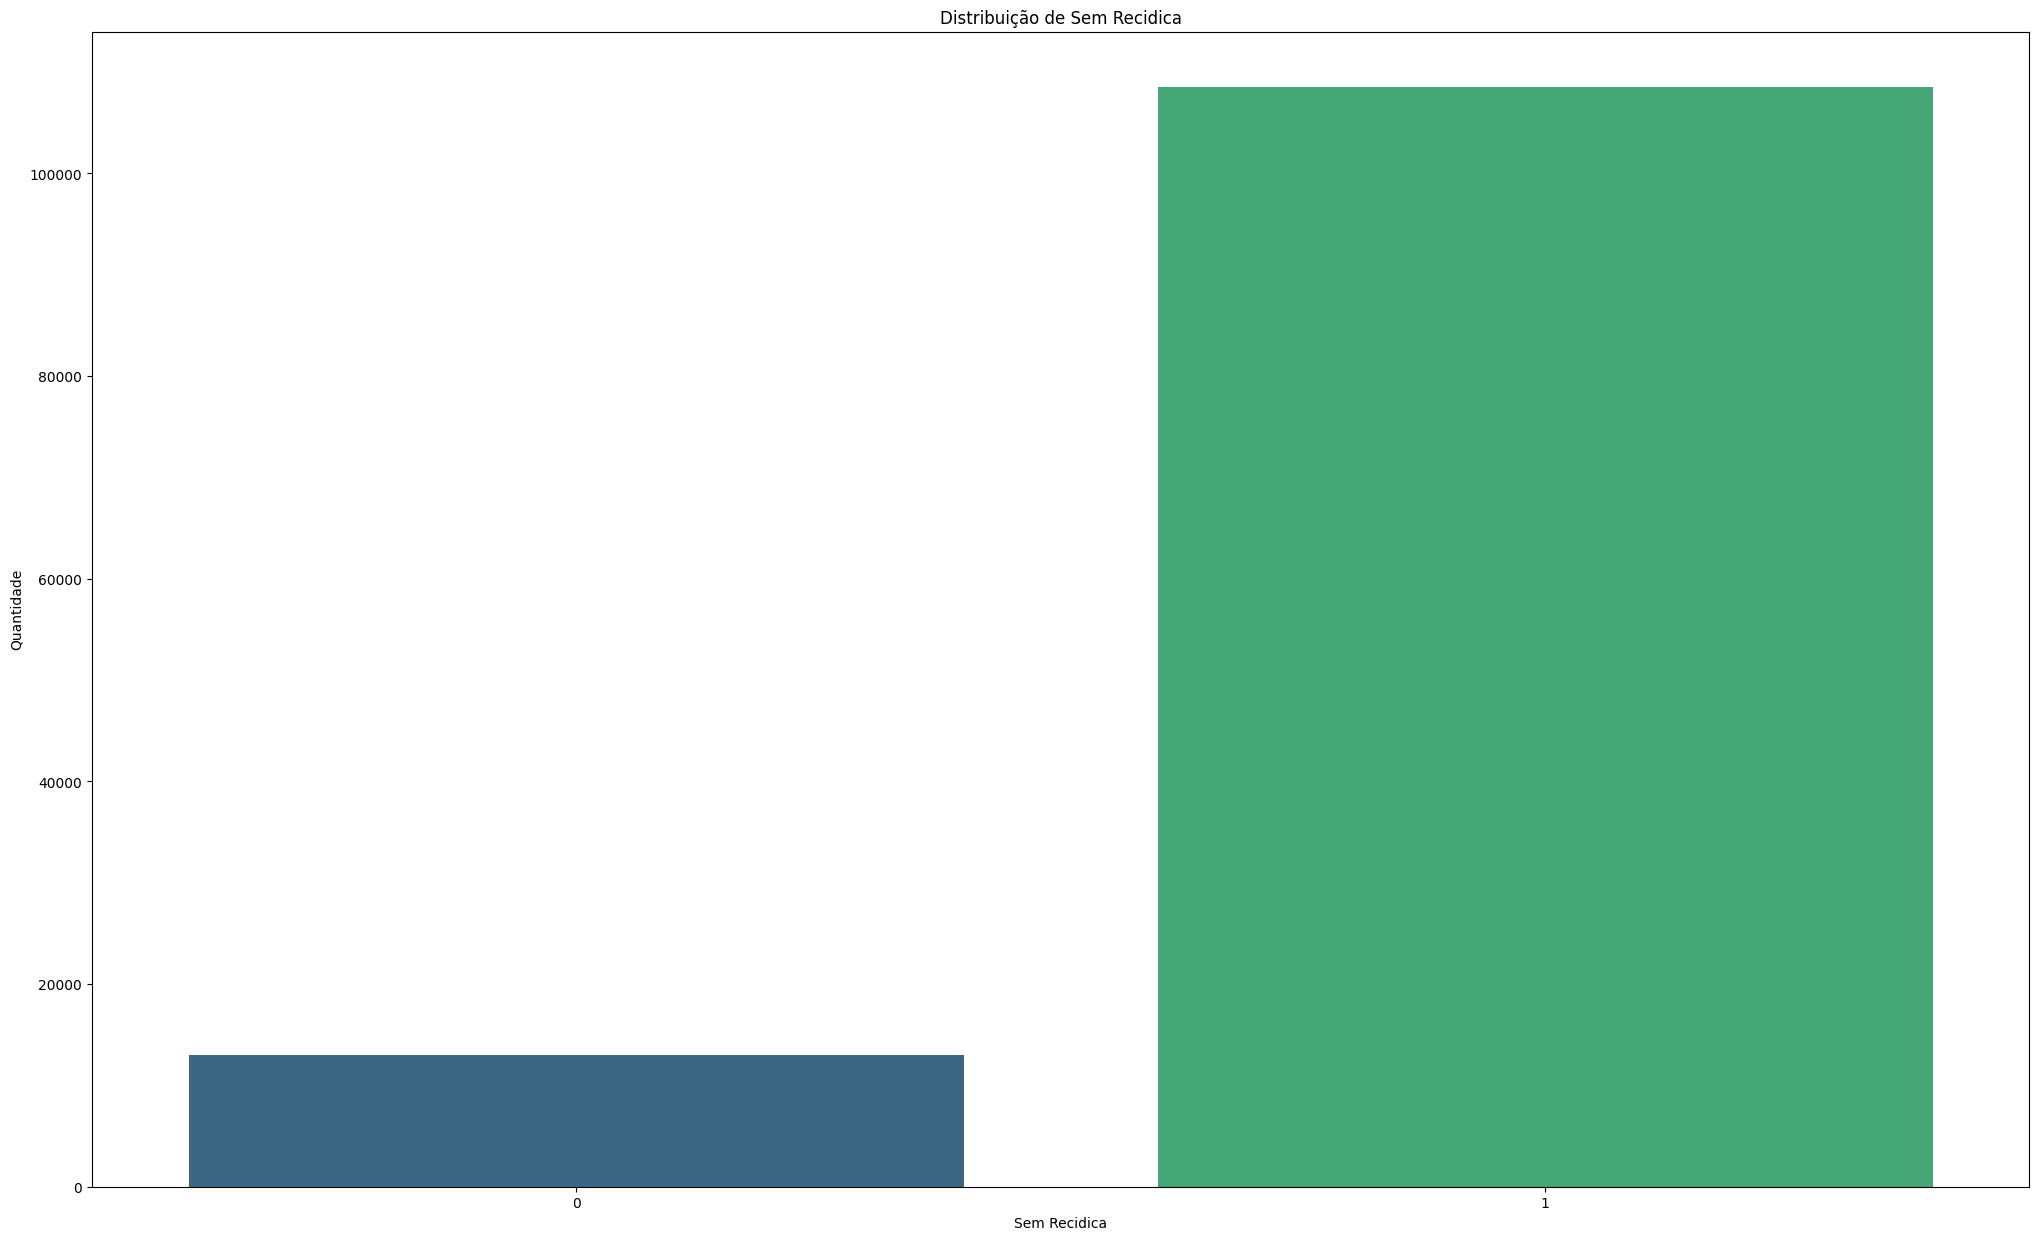

SEM_RECIDIVA
0     12993
1    108558


In [ ]:
sem_recidiva_counts = df_pacigeral.SEM_RECIDIVA.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=sem_recidiva_counts.index, y=sem_recidiva_counts.values, palette="viridis")

plt.xlabel("Sem Recidica")
plt.ylabel("Quantidade")
plt.title("Distribuição de Sem Recidica")

plt.show()
print(df_pacigeral.SEM_RECIDIVA.value_counts().sort_index().to_string())

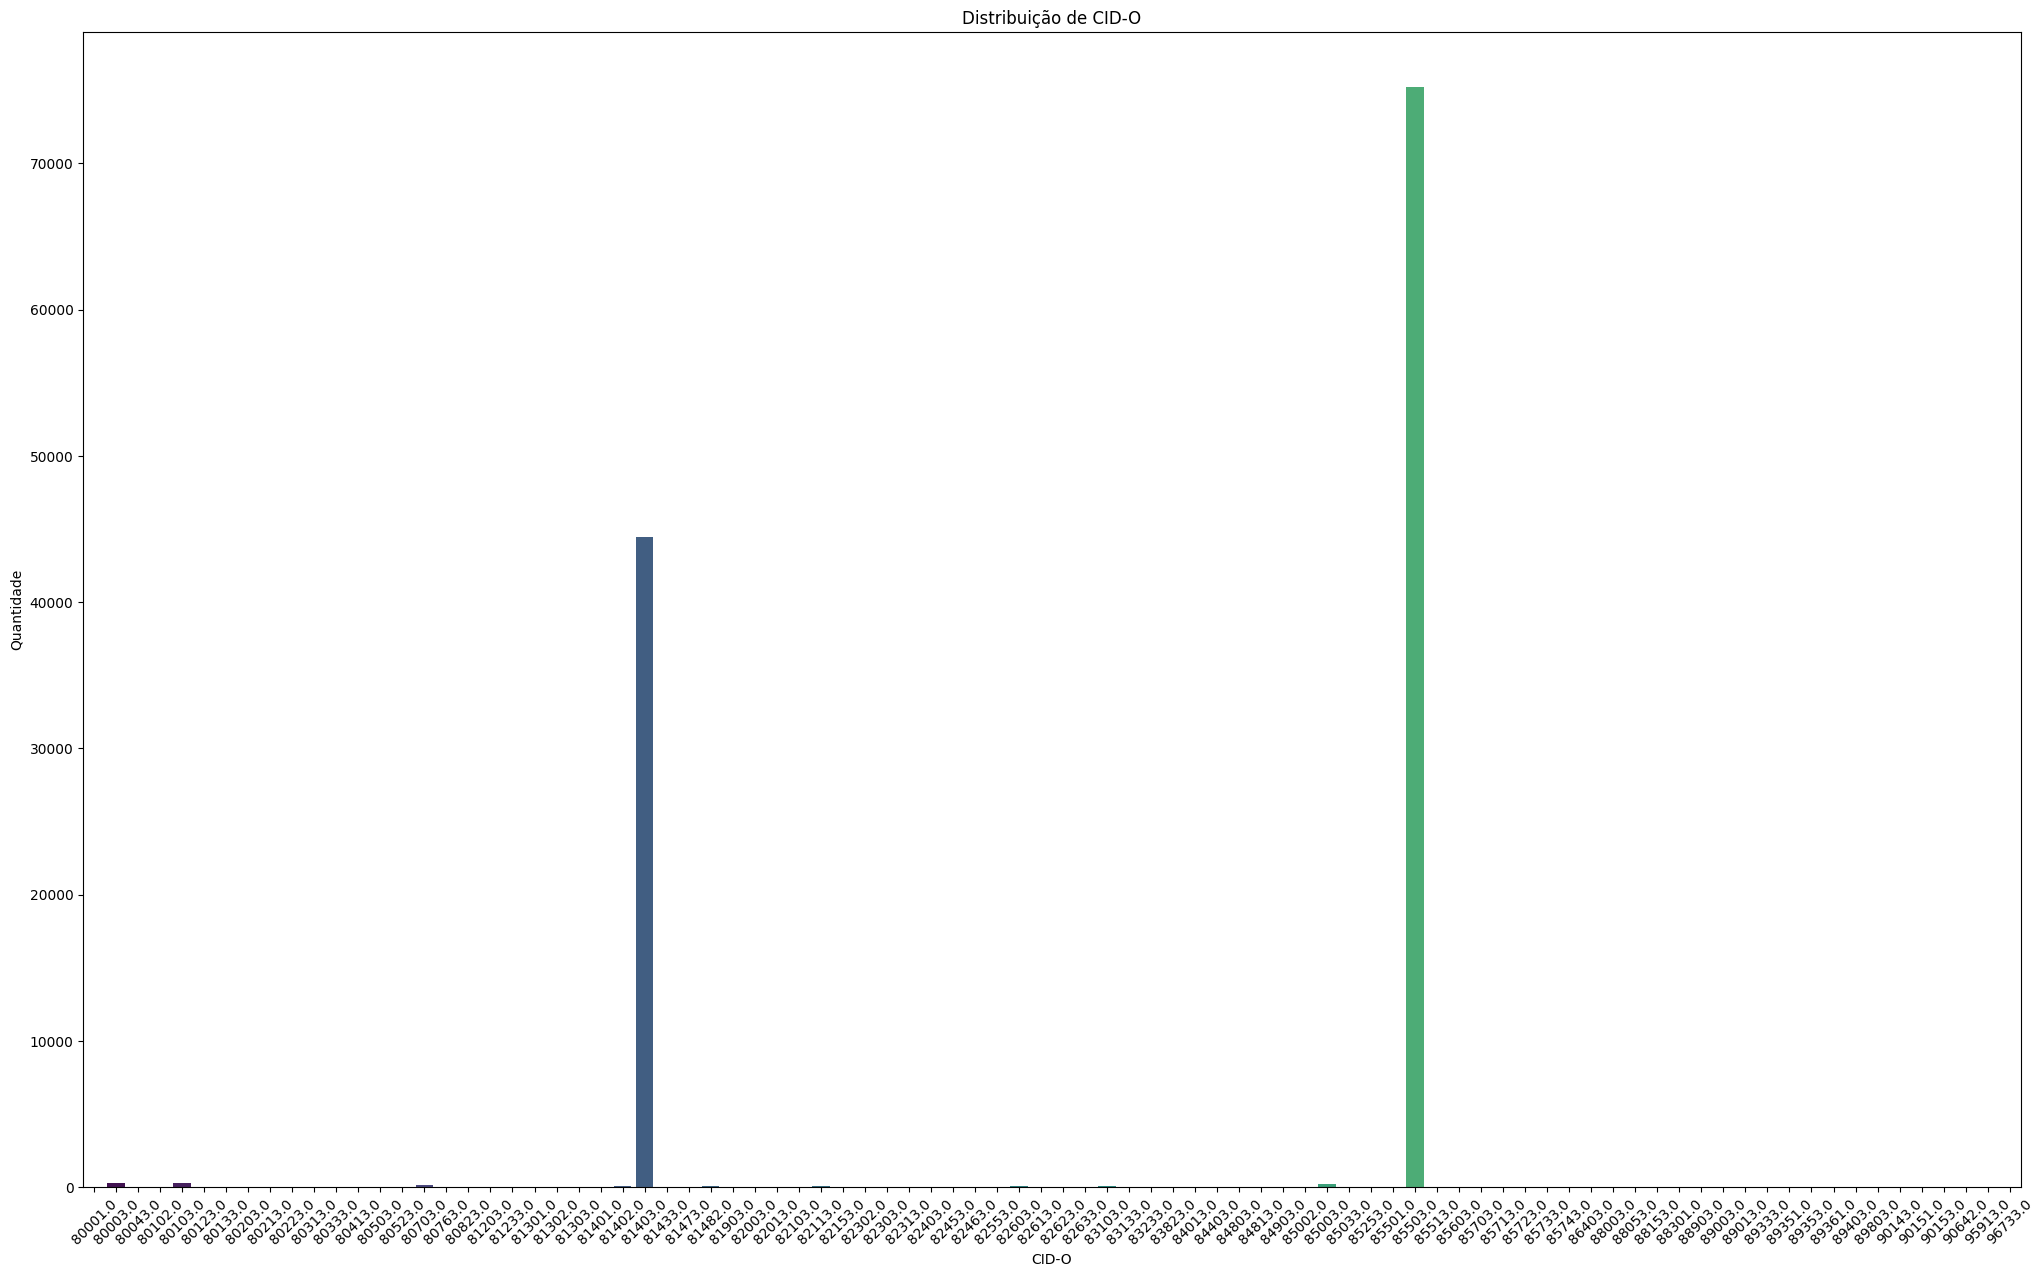

Contagem absoluta:
CID_O
85503.0    75211
81403.0    44429
80003.0      284
80103.0      258
85003.0      256
80703.0      143
82113.0      114
81482.0       99
83103.0       97
82603.0       88
81402.0       65
84803.0       41
81473.0       34
82463.0       30
84013.0       28
80413.0       26
81203.0       25
83133.0       25
82623.0       24
80503.0       24
83233.0       21
85513.0       18
85033.0       17
80203.0       14
84813.0       14
88903.0       10
84903.0        9
85501.0        9
90153.0        8
85743.0        7
82553.0        7
81903.0        6
82633.0        6
81301.0        5
82013.0        5
81303.0        5
80001.0        5
82302.0        4
82153.0        4
80213.0        4
81433.0        3
82303.0        3
82103.0        3
85603.0        3
89353.0        3
81233.0        3
85713.0        2
80523.0        2
81302.0        2
82453.0        2
82613.0        2
80102.0        2
85002.0        2
90642.0        2
80333.0        2
82403.0        2
83823.0        2
89333.

In [ ]:
cid_o_counts = df_pacigeral.CID_O.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=cid_o_counts.index, y=cid_o_counts.values, palette="viridis")

plt.xlabel("CID-O")
plt.ylabel("Quantidade")
plt.title("Distribuição de CID-O")
plt.xticks(rotation=45)

plt.show()
print("Contagem absoluta:")
print(df_pacigeral.CID_O.value_counts().sort_values(ascending=False).to_string())

print("\nPorcentagem:")
porcentagem = df_pacigeral.CID_O.value_counts(normalize=True).sort_values(ascending=False) * 100
print(porcentagem.to_string())

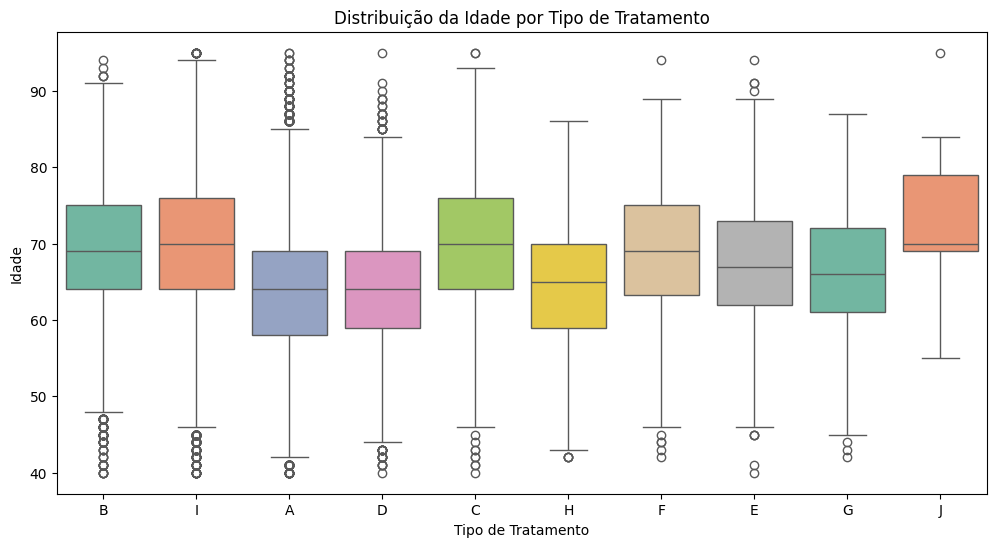

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_pacigeral["TRATAMENTO"], y=df_pacigeral["IDADE"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("Idade")
plt.title("Distribuição da Idade por Tipo de Tratamento")

plt.show()

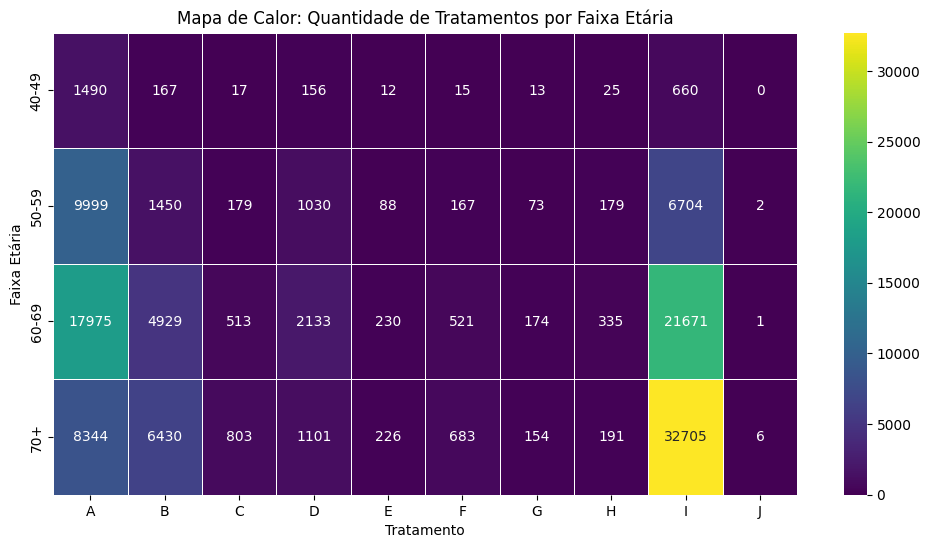

In [ ]:
faixa_etaria_counts = df_pacigeral.groupby(["FAIXA_ETARIA", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(faixa_etaria_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Faixa Etária")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Faixa Etária")

plt.show()

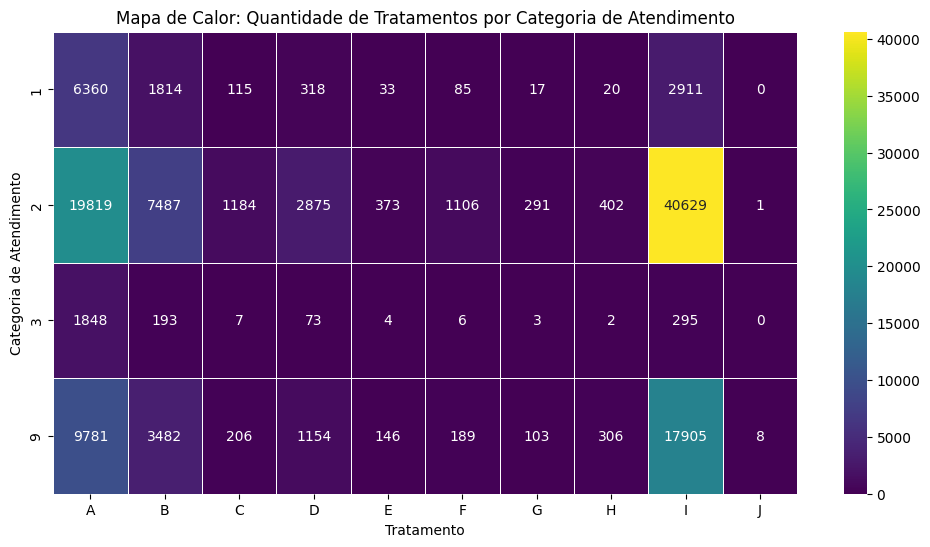

In [ ]:
categoria_atendimento_counts = df_pacigeral.groupby(["CATEGORIA_ATENDIMENTO", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Categoria de Atendimento")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Categoria de Atendimento")

plt.show()

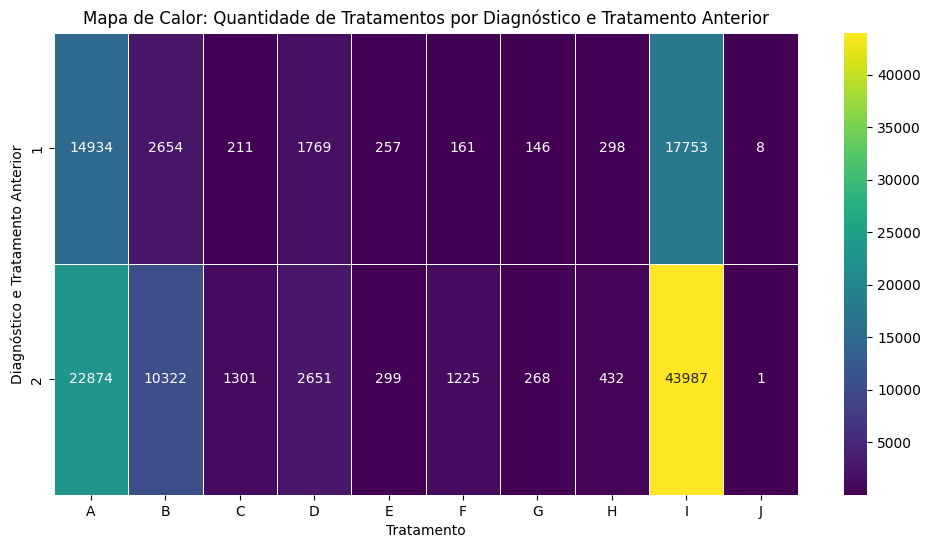

In [ ]:
diagnostico_e_tratamento_anterior_counts = df_pacigeral.groupby(["DIAGNOSTICO_E_TRATAMENTO_ANTERIOR", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(diagnostico_e_tratamento_anterior_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Diagnóstico e Tratamento Anterior")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Diagnóstico e Tratamento Anterior")

plt.show()

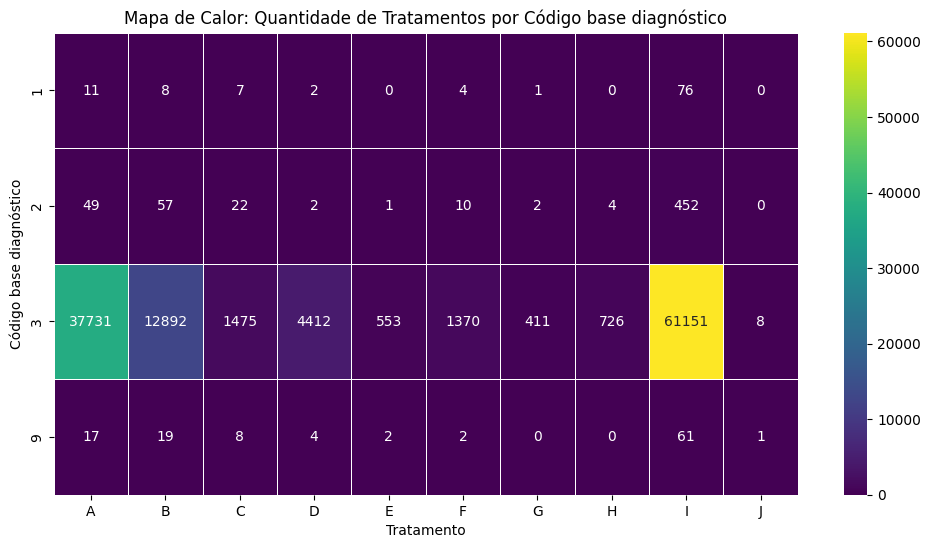

In [ ]:
codigo_base_diagnostico_counts = df_pacigeral.groupby(["CODIGO_BASE_DIAGNOSTICO", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(codigo_base_diagnostico_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Código base diagnóstico")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Código base diagnóstico")

plt.show()

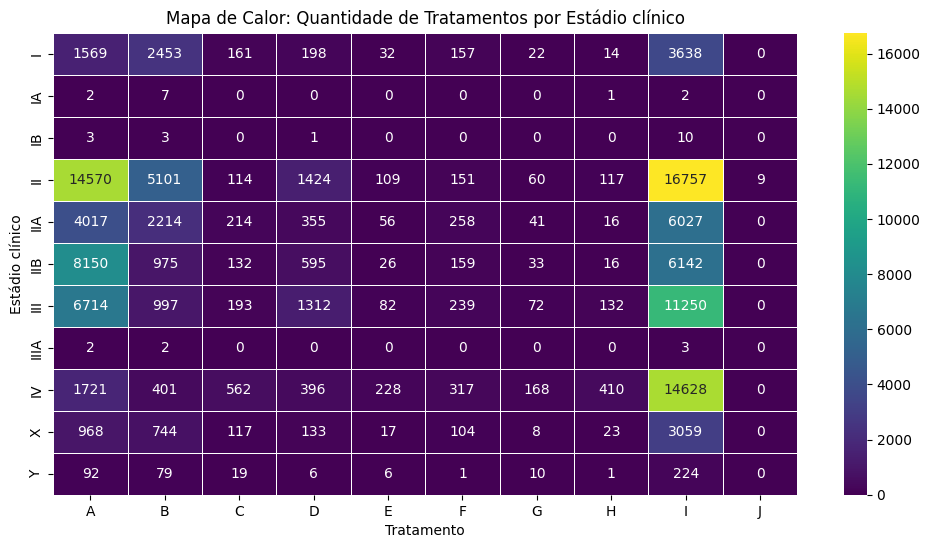

In [ ]:
estadio_clinico_counts = df_pacigeral.groupby(["ESTADIO_CLINICO", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(estadio_clinico_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Estádio clínico")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Estádio clínico")

plt.show()

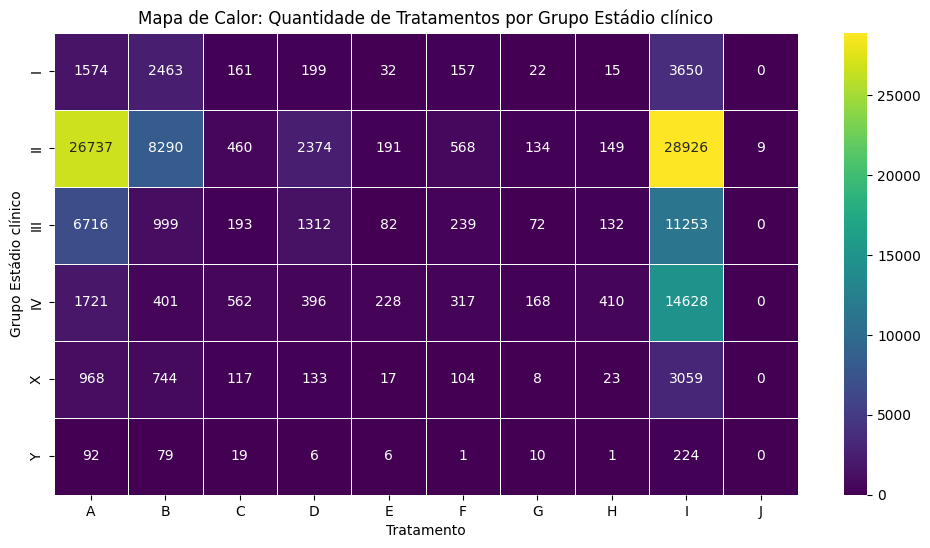

In [ ]:
grupo_estadio_clinico_counts = df_pacigeral.groupby(["GRUPO_ESTADIO_CLINICO", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(grupo_estadio_clinico_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Grupo Estádio clínico")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Grupo Estádio clínico")

plt.show()

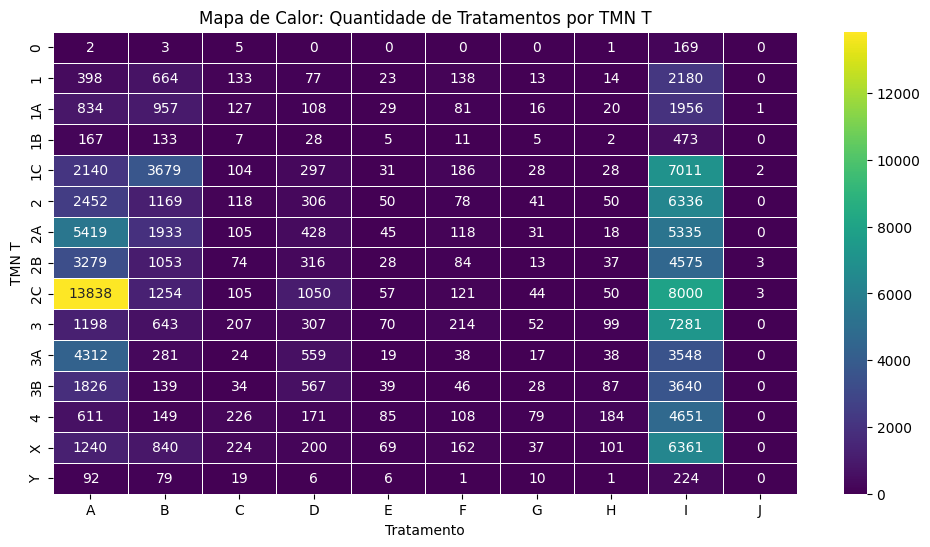

In [ ]:
tnm_t_counts = df_pacigeral.groupby(["TNM_T", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(tnm_t_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("TMN T")
plt.title("Mapa de Calor: Quantidade de Tratamentos por TMN T")

plt.show()

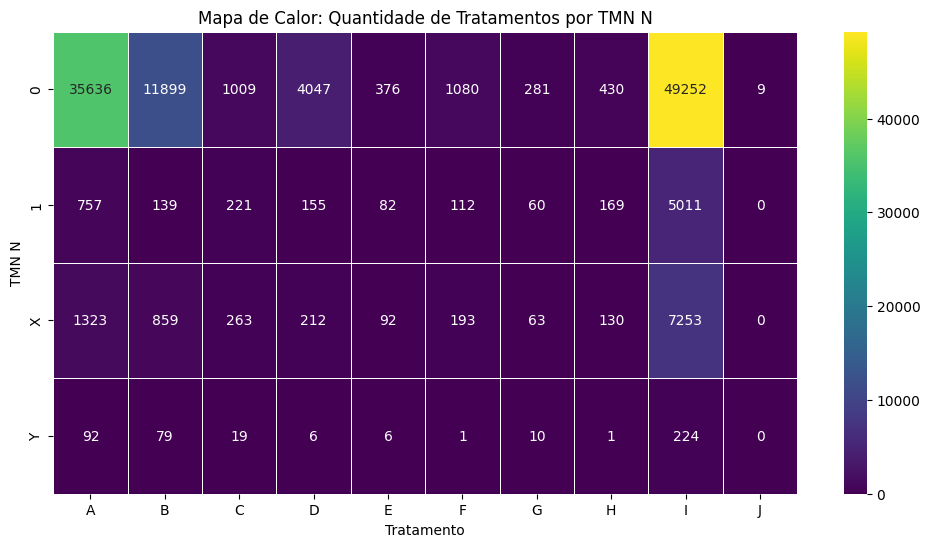

In [ ]:
tnm_n_counts = df_pacigeral.groupby(["TNM_N", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(tnm_n_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("TMN N")
plt.title("Mapa de Calor: Quantidade de Tratamentos por TMN N")

plt.show()

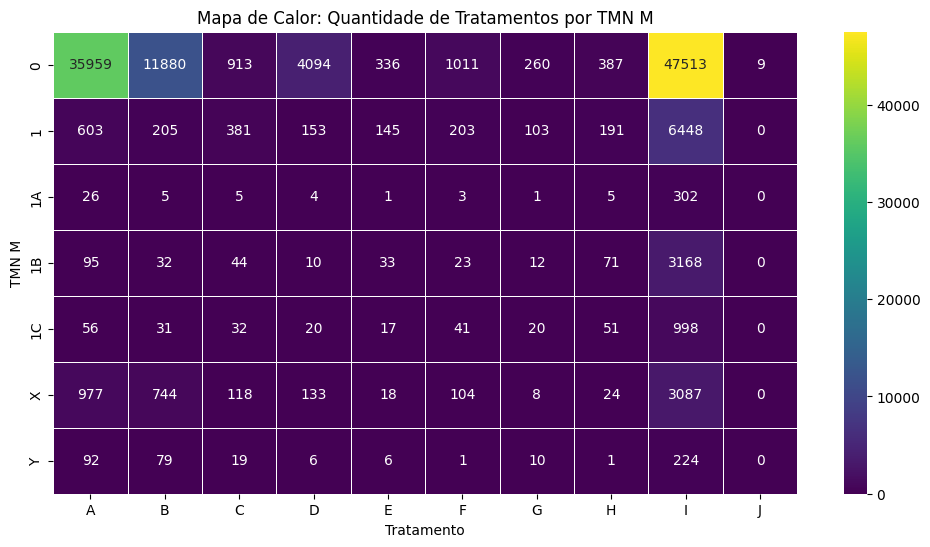

In [ ]:
tnm_m_counts = df_pacigeral.groupby(["TNM_M", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(tnm_m_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("TMN M")
plt.title("Mapa de Calor: Quantidade de Tratamentos por TMN M")

plt.show()

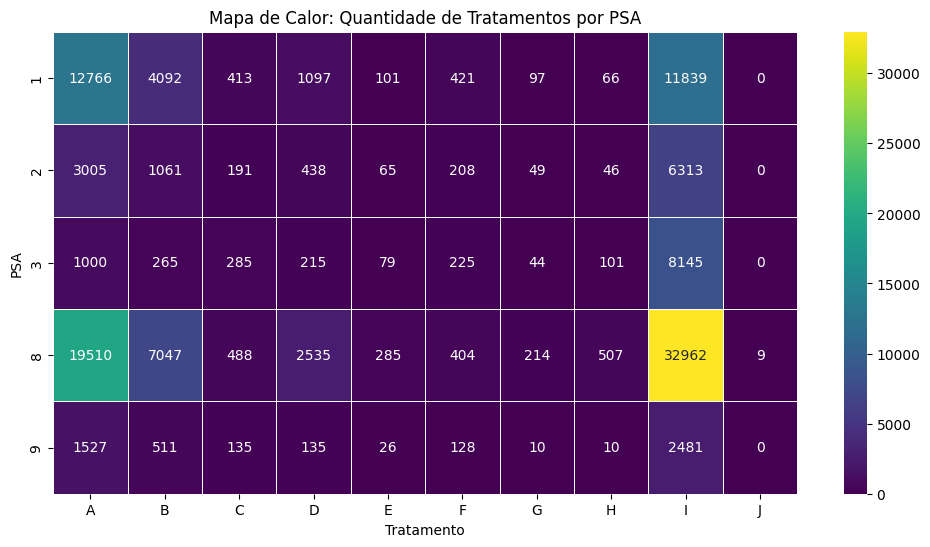

In [ ]:
psa_counts = df_pacigeral.groupby(["PSA", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(psa_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("PSA")
plt.title("Mapa de Calor: Quantidade de Tratamentos por PSA")

plt.show()

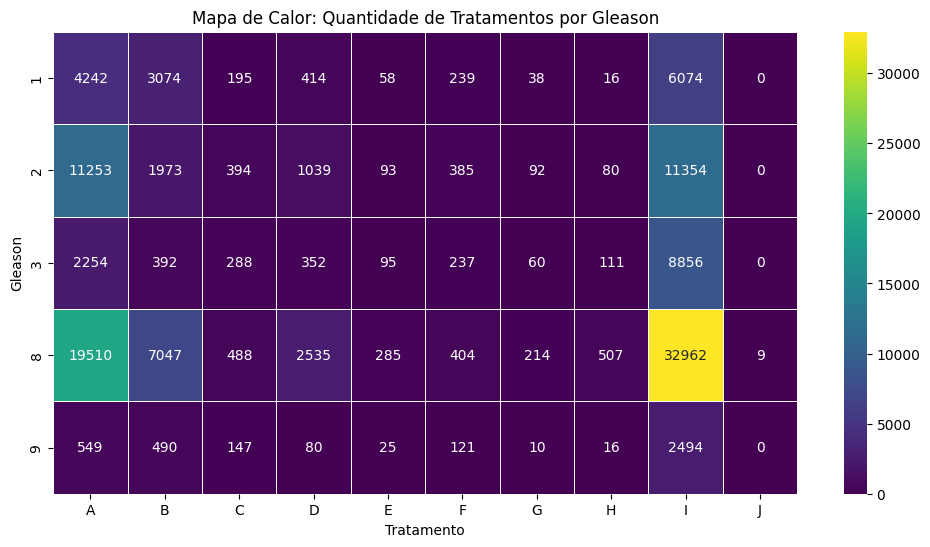

In [ ]:
gleason_counts = df_pacigeral.groupby(["GLEASON", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(gleason_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Gleason")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Gleason")

plt.show()

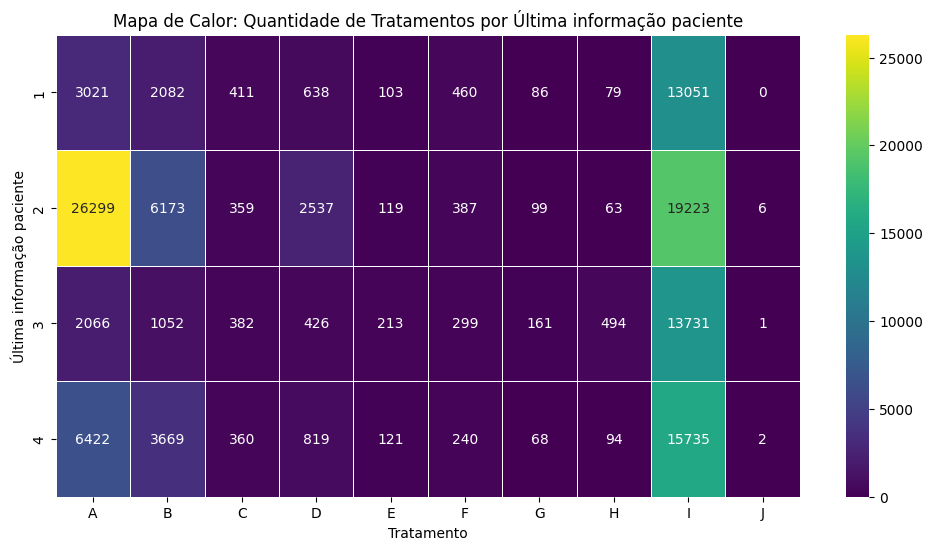

In [ ]:
ultima_informacao_paciente_counts = df_pacigeral.groupby(["ULTIMA_INFORMACAO_PACIENTE", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(ultima_informacao_paciente_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Última informação paciente")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Última informação paciente")

plt.show()

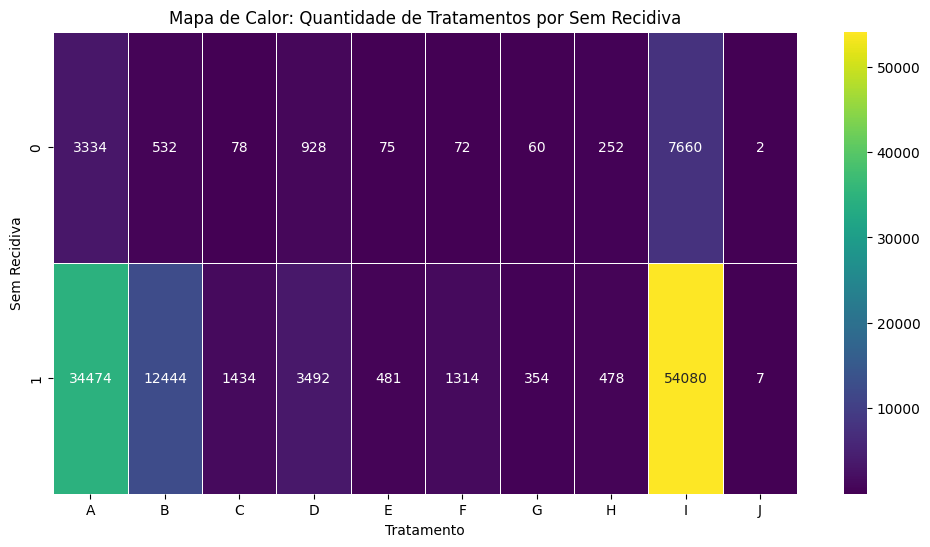

In [ ]:
sem_recidiva_counts = df_pacigeral.groupby(["SEM_RECIDIVA", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(sem_recidiva_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Sem Recidiva")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Sem Recidiva")

plt.show()

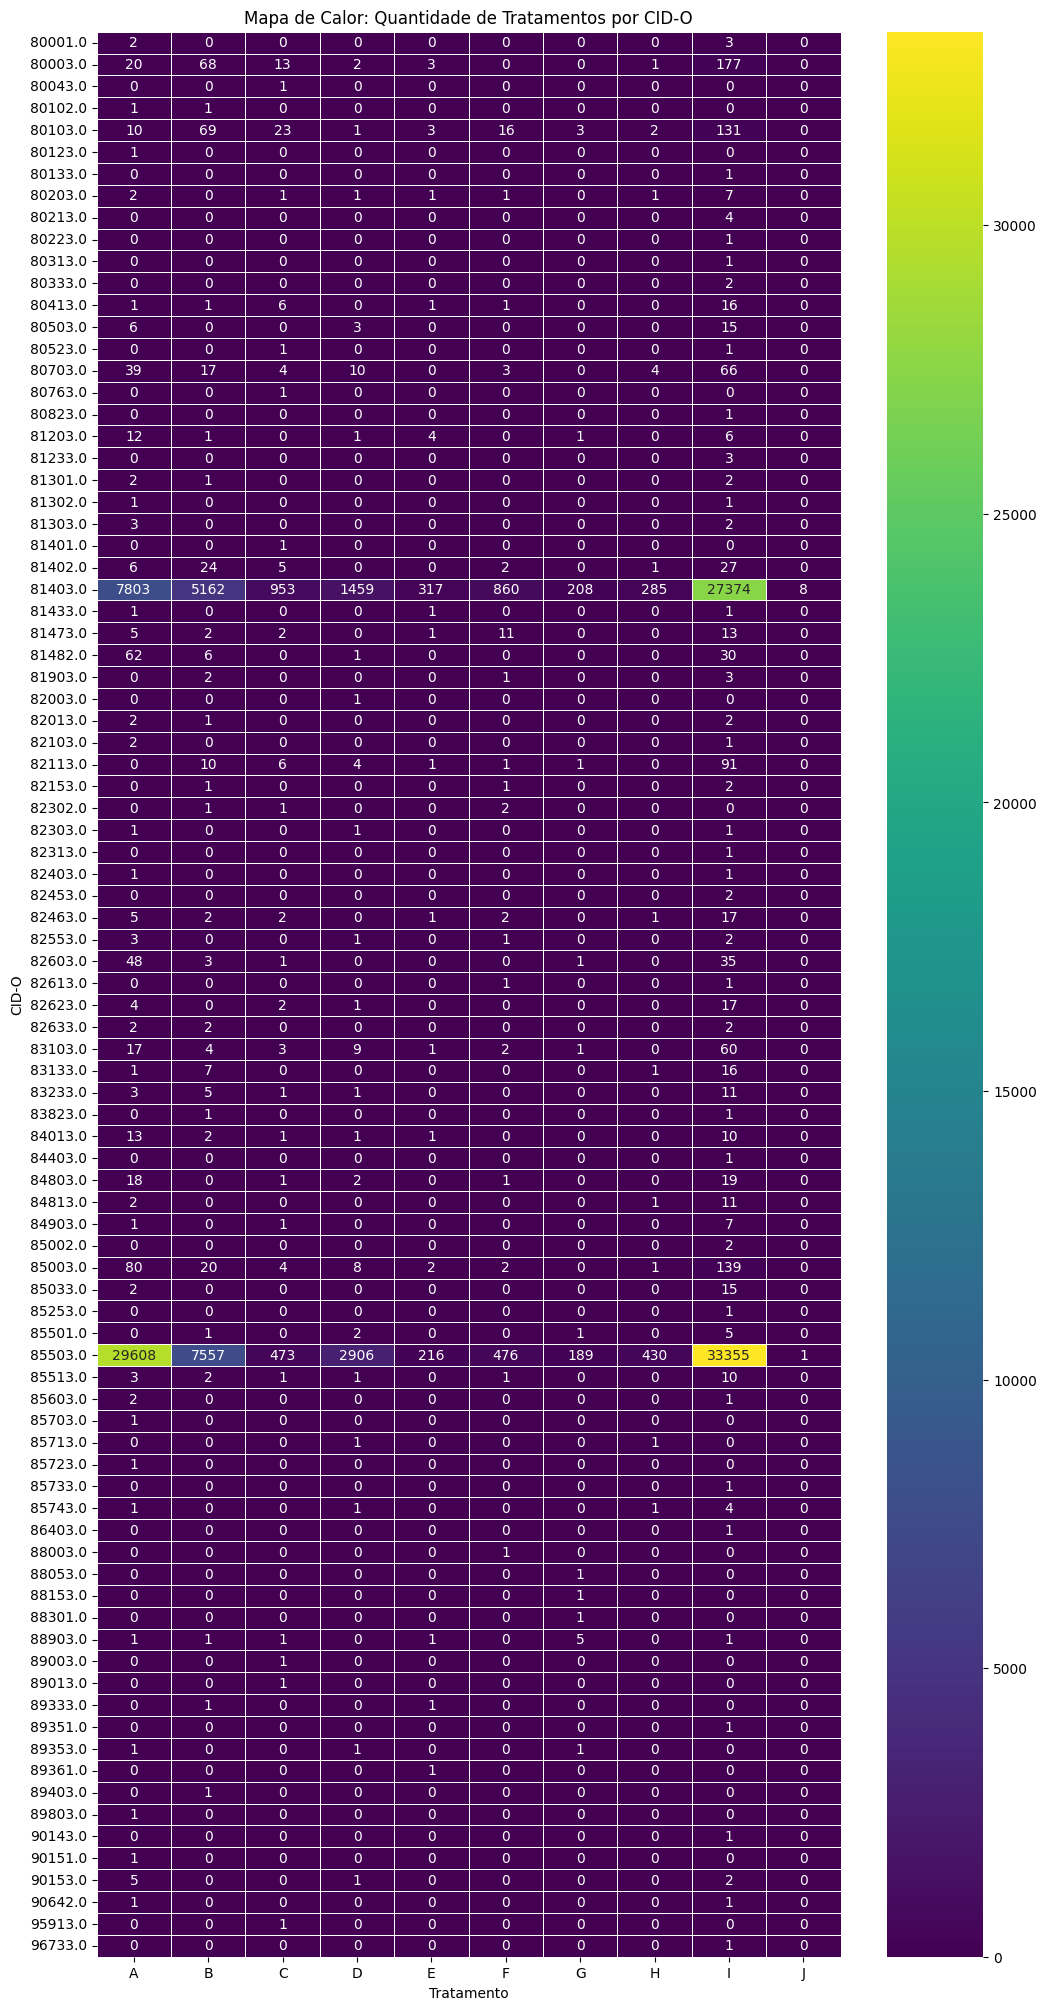

In [ ]:
cid_o_counts = df_pacigeral.groupby(["CID_O", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 25))
sns.heatmap(cid_o_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("CID-O")
plt.title("Mapa de Calor: Quantidade de Tratamentos por CID-O")

plt.show()

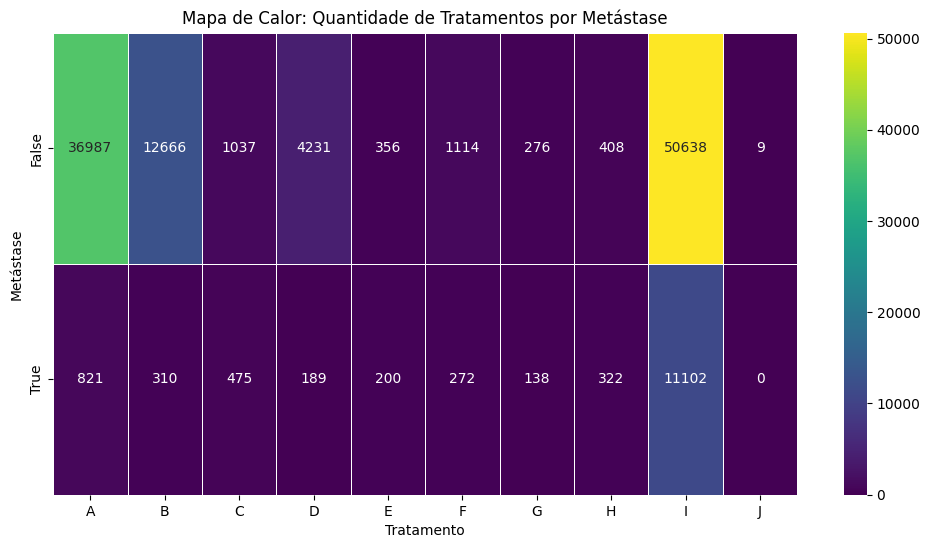

In [ ]:
metastase_counts = df_pacigeral.groupby(["METASTASE", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(metastase_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("Metástase")
plt.title("Mapa de Calor: Quantidade de Tratamentos por Metástase")

plt.show()

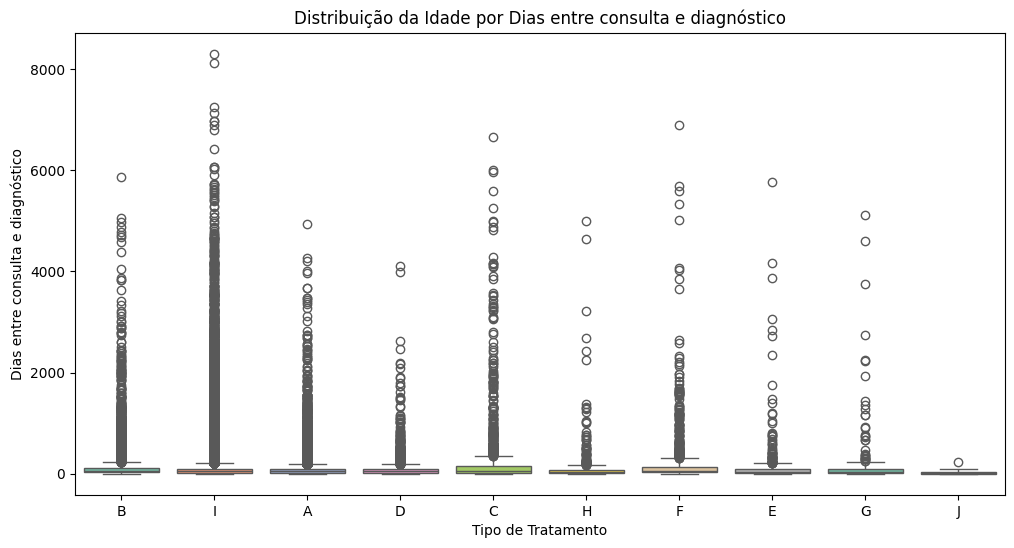

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_pacigeral["TRATAMENTO"], y=df_pacigeral["DIAS_ENTRE_CONSULTA_DIAGNOSTICO"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("Dias entre consulta e diagnóstico")
plt.title("Distribuição da Idade por Dias entre consulta e diagnóstico")

plt.show()

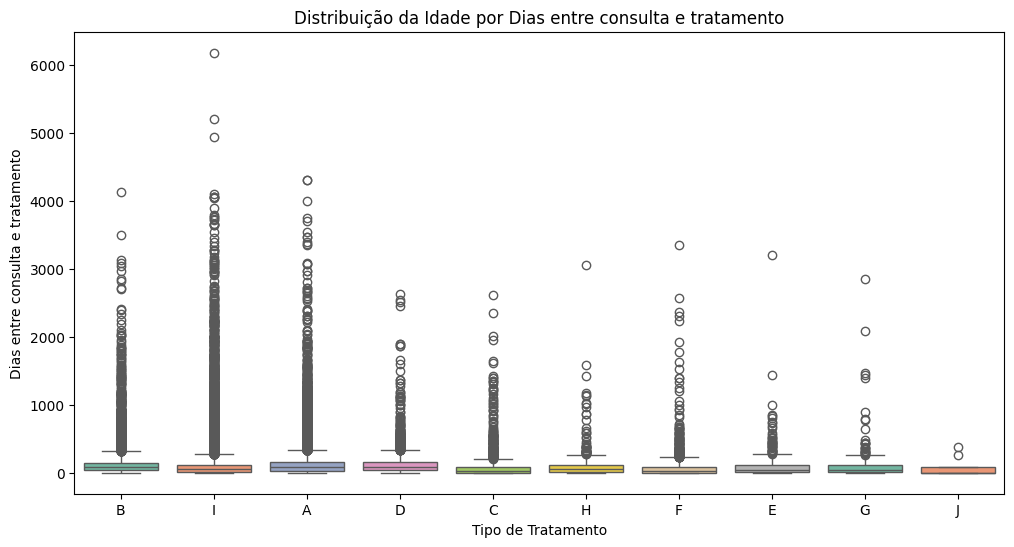

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_pacigeral["TRATAMENTO"], y=df_pacigeral["DIAS_ENTRE_CONSULTA_TRATAMENTO"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("Dias entre consulta e tratamento")
plt.title("Distribuição da Idade por Dias entre consulta e tratamento")

plt.show()

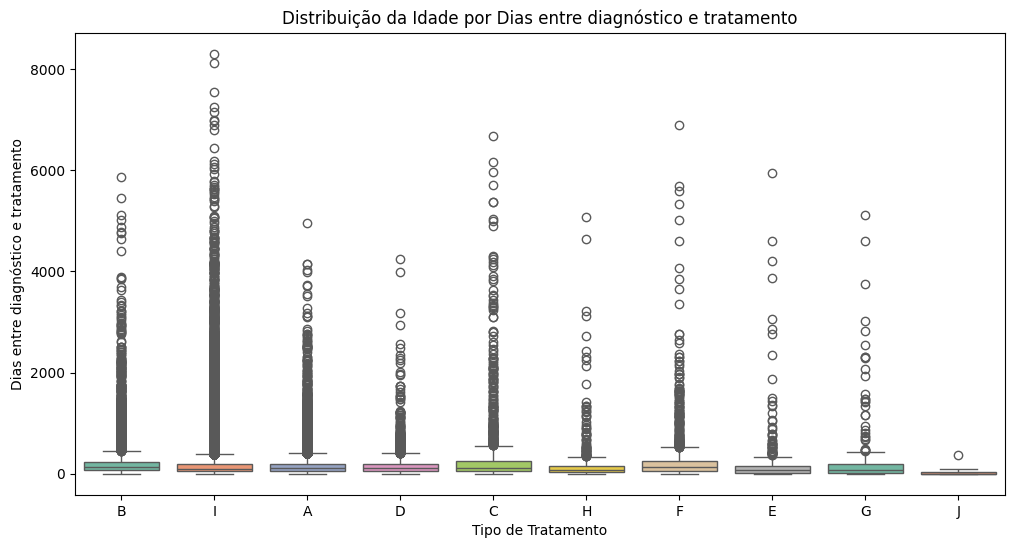

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_pacigeral["TRATAMENTO"], y=df_pacigeral["DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("Dias entre diagnóstico e tratamento")
plt.title("Distribuição da Idade por Dias entre diagnóstico e tratamento")

plt.show()
df_pacigeral.to_csv('df_fosp_selected.csv', index=False)

In [ ]:
df_selected = df_pacigeral.drop(columns=["ESTADIO_CLINICO", "GRUPO_ESTADIO_CLINICO", "FAIXA_ETARIA"])
df_selected = df_selected.loc[df_selected["TRATAMENTO"] != "J"]
# counts = df_selected["CID_O"].value_counts()
# df_selected["CID_O"] = df_selected["CID_O"].apply(lambda x: "OUTROS" if counts[x] < 10 else x)
# counts = df_selected["CID_O"].value_counts()
# print(counts)

In [ ]:
df_selected.describe(include='all')

,IDADE,CATEGORIA_ATENDIMENTO,DIAGNOSTICO_E_TRATAMENTO_ANTERIOR,CODIGO_BASE_DIAGNOSTICO,TNM_T,TNM_N,TNM_M,PSA,GLEASON,TRATAMENTO,ULTIMA_INFORMACAO_PACIENTE,DIAS_ENTRE_CONSULTA_DIAGNOSTICO,DIAS_ENTRE_CONSULTA_TRATAMENTO,DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO,SEM_RECIDIVA,CID_O,METASTASE
count,121542.000000,121542.000000,121542.000000,121542.000000,121542,121542,121542,121542.000000,121542.000000,121542,121542.000000,121542.000000,121542.000000,121542.000000,121542.000000,121542.000000,121542
unique,NaN,NaN,NaN,NaN,15,4,7,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,2C,0,0,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,24519,104010,102353,NaN,NaN,61740,NaN,NaN,NaN,NaN,NaN,NaN,107713
mean,67.466423,3.840203,1.685845,2.998856,NaN,NaN,NaN,5.273930,5.369461,NaN,2.443871,104.692172,108.709360,174.704851,0.893115,83951.715308,NaN
std,8.698626,3.184883,0.464180,0.204901,NaN,NaN,NaN,3.250216,3.065339,NaN,1.013808,284.140662,188.965494,318.756703,0.308968,1997.079141,NaN
min,40.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,80001.000000,NaN
25%,62.000000,2.000000,1.000000,3.000000,NaN,NaN,NaN,1.000000,2.000000,NaN,2.000000,21.000000,17.000000,50.000000,1.000000,81403.000000,NaN
50%,68.000000,2.000000,2.000000,3.000000,NaN,NaN,NaN,8.000000,8.000000,NaN,2.000000,49.000000,62.000000,106.000000,1.000000,85503.000000,NaN
75%,74.000000,9.000000,2.000000,3.000000,NaN,NaN,NaN,8.000000,8.000000,NaN,3.000000,97.000000,133.000000,193.000000,1.000000,85503.000000,NaN


![image.png](
  
)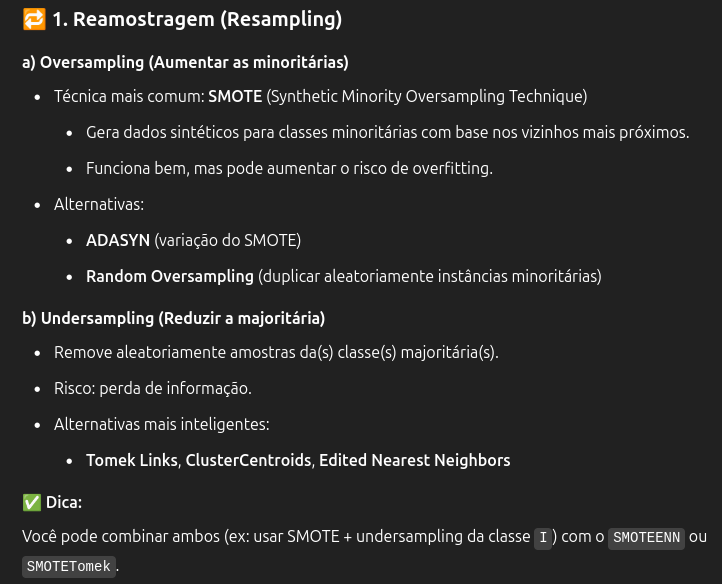

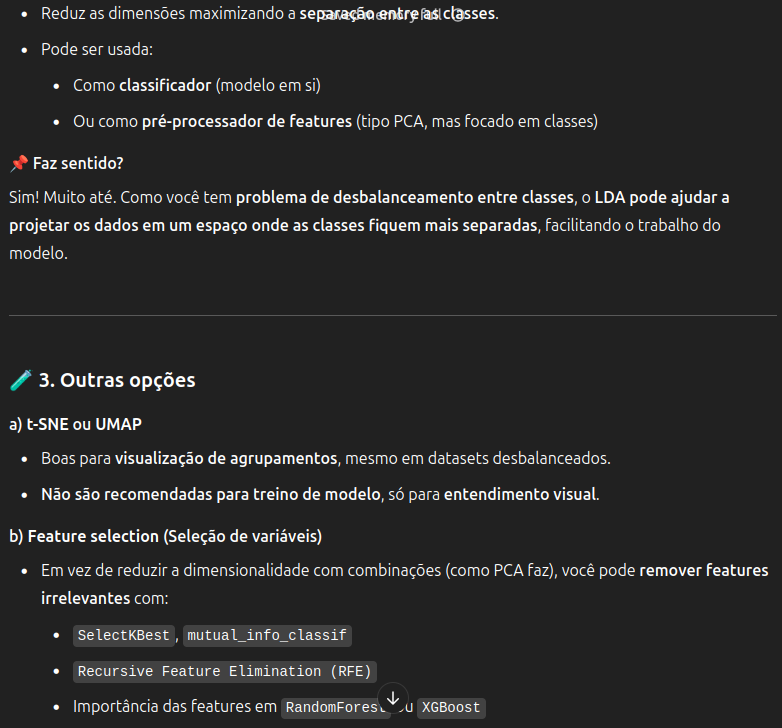

### RHC Exploration

In [17]:
df_rhc.head()

,TPCASO,SEXO,IDADE,LOCALNAS,RACACOR,INSTRUC,CLIATEN,CLITRAT,HISTFAMC,ALCOOLIS,TABAGISM,ESTADRES,PROCEDEN,ANOPRIDI,ORIENC,EXDIAG,ESTCONJ,ANTRI,DTPRICON,DIAGANT,BASMAIMP,LOCTUDET,LOCTUPRI,TIPOHIST,LATERALI,LOCTUPRO,MAISUMTU,TNM,ESTADIAM,ESTADIAG,RZNTR,DTINITRT,PRITRATH,ESTDFIMT,CNES,UFUH,MUUH,OCUPACAO,DTDIAGNO,DTTRIAGE,DATAPRICON,DATAINITRT,DATAOBITO,OUTROESTA,VALOR_TOT,BASDIAGSP,ano,PTNM
0,1,1,43,PB,1,3,24,24,9,9,9,PB,2507200,2009,1,NaN,2,2010,1995,1,7.0,C61,C61.9,8000/3,8,.,1,999,2,2,8,2010.0,5,3,2676060,PB,2504009,985,01/10/2009,19/07/2010,08/02/1995,19/07/2010,/ /,88,1,3,1995,NaN
1,1,1,69,PB,1,2,32,32,1,1,1,PB,2504009,2007,1,NaN,4,1995,1995,1,7.0,C61,C61.9,8140/3,8,.,1,999,4,4,8,2007.0,25,3,2676060,PB,2504009,999,28/03/2007,19/05/1995,19/05/1995,25/06/2007,/ /,88,1,3,1995,NaN
2,1,1,72,PE,1,9,32,24,9,9,9,PB,2504009,1997,1,NaN,2,2008,1995,1,5.0,C61,C61.9,8140/3,8,.,1,999,2,2,8,1999.0,25,3,2676060,PB,2504009,9999,02/01/1997,18/06/2008,29/07/1995,03/05/1999,20/04/2009,88,1,3,1995,NaN
3,1,1,78,PB,4,2,24,24,9,9,3,PB,2500403,1996,2,NaN,2,1999,1996,2,6.0,C61,C61.9,8140/3,9,.,3,999,99,9,8,1996.0,5,3,2676060,PB,2504009,664,01/11/1996,28/11/1999,28/11/1996,28/11/1996,/ /,88,1,3,1996,NaN
4,1,1,68,PB,1,9,32,32,9,3,1,RJ,3304557,2002,9,NaN,2,1997,1997,1,7.0,C61,C61.9,8140/3,8,NaN,1,999,99,9,8,2001.0,2,9,2269783,RJ,3304557,451,10/01/2002,09/07/1997,23/09/1997,08/12/2001,/ /,88.0,1,3,1997,NaN


In [18]:
df_rhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630520 entries, 0 to 630519
Data columns (total 48 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   TPCASO      630520 non-null  int64  
 1   SEXO        630520 non-null  int64  
 2   IDADE       630520 non-null  int64  
 3   LOCALNAS    630518 non-null  object 
 4   RACACOR     630520 non-null  int64  
 5   INSTRUC     630520 non-null  int64  
 6   CLIATEN     630520 non-null  int64  
 7   CLITRAT     630520 non-null  int64  
 8   HISTFAMC    630520 non-null  int64  
 9   ALCOOLIS    630520 non-null  int64  
 10  TABAGISM    630520 non-null  int64  
 11  ESTADRES    630520 non-null  object 
 12  PROCEDEN    630506 non-null  object 
 13  ANOPRIDI    630516 non-null  object 
 14  ORIENC      630520 non-null  int64  
 15  EXDIAG      359221 non-null  float64
 16  ESTCONJ     630520 non-null  int64  
 17  ANTRI       443431 non-null  object 
 18  DTPRICON    630520 non-null  int64  
 19  DI

In [19]:
df_rhc = df_rhc.drop(columns=['TPCASO'])

In [20]:
df_rhc.SEXO.value_counts()

SEXO
1    630451
2        48
3        21
Name: count, dtype: int64

In [21]:
df_rhc = df_rhc[~df_rhc['SEXO'].isin([2, 3])]

In [22]:
df_rhc.LOCALNAS.value_counts()

LOCALNAS
MG    133731
SP    101917
BA     70344
RS     48078
CE     28599
RJ     28021
PE     26163
99     23606
PR     22583
SC     19823
RN     15884
PB     15623
MA     14108
SI     13040
ES     12889
AL      9060
PI      8342
PA      8141
SE      7991
GO      4293
MS      3957
AM      3640
MT      2901
OP      2139
TO      1570
EX      1514
AC      1122
AP       452
RO       416
DF       353
RR       149
Name: count, dtype: int64

In [23]:
df_rhc.RACACOR.value_counts()
df_rhc.loc[:, 'RACACOR'] = df_rhc['RACACOR'].replace(99, 9)
df_rhc.RACACOR.value_counts()

RACACOR
9    205620
4    198973
1    181647
2     39926
3      3719
5       566
Name: count, dtype: int64

In [24]:
df_rhc.INSTRUC.value_counts()
df_rhc.loc[:, 'INSTRUC'] = df_rhc['INSTRUC'].replace(0, 9)
df_rhc.INSTRUC.value_counts()

INSTRUC
2    215042
9    176063
3     86109
4     62614
1     58042
6     30168
5      2413
Name: count, dtype: int64

In [25]:
df_rhc.CLIATEN.value_counts()
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(0, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(61, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(51, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(52, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(65, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(62, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(59, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(68, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(63, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(81, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(91, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(53, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(57, 99)
df_rhc.loc[:, 'CLIATEN'] = df_rhc['CLIATEN'].replace(89, 99)
df_rhc.CLIATEN.value_counts()

CLIATEN
32    214443
99    187658
24     93459
31     90739
46     12645
23     11473
9       7154
4       3207
3        923
88       902
30       838
39       685
36       634
33       626
50       580
26       554
17       541
7        272
19       235
2        205
20       200
12       188
1        185
13       177
21       176
42       172
14       159
10       152
29       140
48       131
44       114
47       103
15        96
6         92
8         76
11        72
34        72
22        66
5         64
25        40
27        36
18        34
16        22
35        21
37        20
41        19
28        14
45        14
38        12
43        11
Name: count, dtype: int64

In [26]:
df_rhc.HISTFAMC.value_counts()
df_rhc['HISTFAMC'] = df_rhc['HISTFAMC'].replace(0, 9)
df_rhc.HISTFAMC.value_counts()

HISTFAMC
9    404495
2    126263
1     99693
Name: count, dtype: int64

In [27]:
df_rhc.ALCOOLIS.value_counts()
df_rhc['ALCOOLIS'] = df_rhc['ALCOOLIS'].replace(0, 9)
df_rhc.ALCOOLIS.value_counts()

ALCOOLIS
9    355656
1    141342
3     67539
2     45306
4     17285
8      3323
Name: count, dtype: int64

In [28]:
df_rhc.TABAGISM.value_counts()
df_rhc['TABAGISM'] = df_rhc['TABAGISM'].replace(0, 9)
df_rhc.TABAGISM.value_counts()

TABAGISM
9    340561
1    143057
2     67742
3     61593
4     14586
8      2912
Name: count, dtype: int64

In [29]:
df_rhc.ESTADRES.value_counts()
df_rhc['ESTADRES'] = df_rhc['ESTADRES'].replace('77', '99')
df_rhc.ESTADRES.value_counts()

ESTADRES
SP    147685
MG    121459
BA     56384
RS     47531
PR     33949
RJ     31110
CE     27717
SC     22219
PE     19650
ES     15983
RN     15484
MA     12577
PB     11593
PA      7858
SE      6889
MS      6879
MT      6853
PI      6620
AL      6252
AM      4503
DF      4449
TO      3752
GO      3729
99      3457
RO      3421
AC      1159
AP       886
RR       403
Name: count, dtype: int64

In [30]:
df_rhc = df_rhc.drop(columns=['PROCEDEN'])

In [31]:
df_rhc.ANOPRIDI.value_counts()
df_rhc.loc[df_rhc['ANOPRIDI'].astype(str).str.contains('/'), 'ANOPRIDI'] = 9999
df_rhc['ANOPRIDI'] = df_rhc['ANOPRIDI'].astype(str).str.replace(r'\..*', '', regex=True)
df_rhc['ANOPRIDI'] = df_rhc['ANOPRIDI'].replace('8888', '9999')
df_rhc.ANOPRIDI.value_counts()

ANOPRIDI
2018    38230
2014    37415
2015    37281
2019    36923
2016    35269
        ...  
1933        1
1985        1
1943        1
1936        1
1975        1
Name: count, Length: 71, dtype: int64

In [32]:
df_rhc.ORIENC.value_counts()
df_rhc['ORIENC'] = df_rhc['ORIENC'].replace(0, 9)
df_rhc.ORIENC.value_counts()

ORIENC
1    330122
9    217074
2     74766
3      6323
8      2166
Name: count, dtype: int64

In [33]:
df_rhc.EXDIAG.value_counts()

EXDIAG
4.0    212896
5.0    126772
2.0      9262
1.0      4177
8.0      2818
9.0      2396
3.0       876
Name: count, dtype: int64

In [34]:
df_rhc.ESTCONJ.value_counts()
df_rhc['ESTCONJ'] = df_rhc['ESTCONJ'].replace(0, 9)
df_rhc.ESTCONJ.value_counts()

ESTCONJ
2    278296
9    217707
1     65392
3     37837
4     25048
5      6171
Name: count, dtype: int64

In [35]:
df_rhc.ANTRI.value_counts()
df_rhc.loc[df_rhc['ANTRI'].astype(str).str.contains('/'), 'ANTRI'] = '9999'
df_rhc['ANTRI'] = df_rhc['ANTRI'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else x)
df_rhc['ANTRI'] = df_rhc['ANTRI'].replace('8888', '9999')
df_rhc.ANTRI.value_counts()

ANTRI
2019    27898
2018    27484
2015    26759
2016    25484
2022    25128
        ...  
1966        1
1969        1
1968        1
1923        1
1934        1
Name: count, Length: 95, dtype: int64

In [36]:
df_rhc.DTPRICON.value_counts()
df_rhc.loc[df_rhc['DTPRICON'].astype(str).str.contains('/'), 'DTPRICON'] = 9999
df_rhc['DTPRICON'] = df_rhc['DTPRICON'].apply(lambda x: str(x).split('.')[0] if pd.notna(x) else x)
df_rhc['DTPRICON'] = df_rhc['DTPRICON'].replace('8888', '9999')
df_rhc.DTPRICON.value_counts()

DTPRICON
2019    40565
2018    39707
2015    39015
2014    38014
2016    37271
2017    37042
2013    36130
2022    35673
2011    34005
2012    33496
2021    33148
2010    30711
2020    30298
2009    26804
2008    24123
2007    20678
2006    17626
2005    16391
2023    15944
2004    12546
2003     9952
2002     8660
2001     7191
2000     5101
1999      280
1998       71
1997        5
1995        3
1996        1
Name: count, dtype: int64

In [37]:
df_rhc.DIAGANT.value_counts()
df_rhc['DIAGANT'] = df_rhc['DIAGANT'].replace(0, 9)
df_rhc.DIAGANT.value_counts()

DIAGANT
2    352963
1    148165
3    108493
4     13993
9      6837
Name: count, dtype: int64

In [38]:
df_rhc.BASMAIMP.value_counts()
df_rhc['BASMAIMP'] = df_rhc['BASMAIMP'].replace(0, 9)
df_rhc.BASMAIMP.value_counts()

BASMAIMP
7.0    445330
5.0      5127
2.0      4918
9.0      4516
1.0      3697
3.0      3620
4.0      2876
6.0      1975
Name: count, dtype: int64

In [39]:
df_rhc = df_rhc.drop(columns=['LOCTUDET'])

In [40]:
df_rhc = df_rhc.drop(columns=['LOCTUPRI'])

In [41]:
df_rhc.TIPOHIST.value_counts()
df_rhc = df_rhc[df_rhc['TIPOHIST'].astype(str) != '/']
df_rhc.TIPOHIST.value_counts()

TIPOHIST
8140/3    473051
8550/3    139650
8000/3      5890
8010/3      2966
8140/2      1571
           ...  
8680/3         1
8960/3         1
5220/3         1
8003/3         1
8074/3         1
Name: count, Length: 174, dtype: int64

In [42]:
df_rhc.LATERALI.value_counts()
df_rhc.loc[:, 'LATERALI'] = df_rhc['LATERALI'].replace(0, 9)
df_rhc.LATERALI.value_counts()

LATERALI
8    410194
9    204483
3      9316
1      3733
2      2723
Name: count, dtype: int64

In [43]:
df_rhc = df_rhc.drop(columns=['LOCTUPRO'])

In [44]:
df_rhc.MAISUMTU.value_counts()
df_rhc['MAISUMTU'] = df_rhc['MAISUMTU'].replace(0, 9)
df_rhc.MAISUMTU.value_counts()

MAISUMTU
1    435216
9    181341
2     12319
3      1573
Name: count, dtype: int64

In [45]:
df_rhc.TNM.value_counts()
df_rhc = df_rhc[df_rhc['TNM'].astype(str).str.len() == 3]
df_rhc = df_rhc[~df_rhc['TNM'].str.contains('A', case=False, na=False)]
df_rhc['TNM'] = (
    df_rhc['TNM']
    .astype(str)
    .str.replace(r'[98]', 'X', regex=True)
    .str.replace('x', 'X')
    .str.replace('I', '1')
)
df_rhc = df_rhc[
    df_rhc['TNM'].str[0].str.upper().str.match(r'[01234XY]') &
    df_rhc['TNM'].str[1].str.upper().str.match(r'[01XY]') &
    df_rhc['TNM'].str[2].str.upper().str.match(r'[01XY]')
]
df_rhc.TNM.value_counts()

TNM
XXX    268274
200    145769
100     65887
300     58994
XX1     13677
400      9072
2XX      7037
401      5653
310      4845
411      4750
301      4133
201      3995
1XX      3526
311      3175
3XX      3019
2X0      2647
20X      2519
2X1      1760
4X1      1722
210      1599
3X1      1484
3X0      1408
410      1377
1X0      1319
211      1287
101      1251
30X      1219
YYY       990
000       882
4XX       756
001       622
X00       591
X11       483
10X       471
XX0       449
31X       399
1X1       382
111       321
4X0       315
110       284
X01       226
41X       155
21X       126
X10       111
40X       103
010        35
X1X        27
11X        19
X0X        18
011        15
0X1         8
0XX         5
00X         3
01X         2
0X0         2
Name: count, dtype: int64

In [46]:
df_rhc.ESTADIAM.value_counts()
df_rhc['ESTADIAM'] = df_rhc['ESTADIAM'].replace('88', '99')
df_rhc['ESTADIAM'] = df_rhc['ESTADIAM'].replace('IV', '4')
valores_para_remover = [
    '3c', '2c', '3b', '0', '1c', '4A', 'C', '4B', 'B', '2D', '4C', 'A',
    '11', 'C1', 'D', '23', '41', 'C2', '40', '21', '14', '12', '44', '20', '0A', 'D2'
]

df_rhc = df_rhc[~df_rhc['ESTADIAM'].str.upper().isin([v.upper() for v in valores_para_remover])]
df_rhc['ESTADIAM'] = df_rhc['ESTADIAM'].replace({
    '88': '99',
    'IV': '4',
    'II': '2',
    '02': '2',
    '04': '4',
    'B2': '2B',
    '03': '3',
    'B1': '1B',
    '01': '1',
    '9': '99',
    'I': '1'
})
df_rhc.ESTADIAM.value_counts()

ESTADIAM
99    234593
2     158400
4      79413
3      72342
1      46585
2B     19145
2A     16796
3A       156
1B        67
1A        44
Name: count, dtype: int64

In [47]:
df_rhc = df_rhc.drop(columns=['ESTADIAG'])

In [48]:
df_rhc.RZNTR.value_counts()

RZNTR
8    504434
7     44941
9     41988
2     16730
3      6049
6      5872
4      4986
1      2326
5       394
Name: count, dtype: int64

In [49]:
df_rhc.DTINITRT.value_counts()

DTINITRT
2019.0    33632
2015.0    32825
2018.0    31955
2016.0    31467
2014.0    31234
2017.0    31035
2013.0    30303
2022.0    29752
2012.0    28469
2011.0    27966
2021.0    27125
2020.0    26719
2010.0    25099
2009.0    22342
2008.0    19826
2007.0    17104
2023.0    16899
2006.0    14777
2005.0    13447
2004.0    10447
2003.0     8309
2002.0     7265
2001.0     5918
2000.0     3698
2024.0     2351
1899.0      197
1999.0      173
1998.0       57
1997.0        4
1995.0        3
1996.0        2
2025.0        1
1954.0        1
Name: count, dtype: int64

In [50]:
df_rhc['PRITRATH'] = df_rhc['PRITRATH'].astype(str)

def remove_repeated_chars(word):
    seen = set()
    result = []
    for char in str(word):
        if char not in seen:
            seen.add(char)
            result.append(char)
    return ''.join(result)
df_rhc['PRITRATH'] = df_rhc['PRITRATH'].apply(remove_repeated_chars)

df_rhc = df_rhc[~df_rhc['PRITRATH'].astype(str).str.contains('9')]

df_rhc['PRITRATH_normalized'] = df_rhc['PRITRATH'].apply(lambda x: ''.join(sorted(str(x))))
df_rhc = df_rhc.drop(columns=['PRITRATH'])
df_rhc['PRITRATH_normalized'].value_counts()

PRITRATH_normalized
2       146092
3       113479
5        91125
1        90822
35       72662
         ...  
268          1
256          1
2378         1
2468         1
3568         1
Name: count, Length: 73, dtype: int64

In [51]:
tratamentos = [1, 2, 3, 4, 5, 6, 7, 8]

def extrair_tratamentos(valor):
    return set(int(d) for d in str(valor) if d.isdigit())

for t in tratamentos:
    df_rhc[f'tratamento_{t}'] = df_rhc['PRITRATH_normalized'].apply(
        lambda x: t in extrair_tratamentos(x)
    )
df_rhc = df_rhc.drop(columns=['PRITRATH_normalized'])

df_rhc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621661 entries, 0 to 630519
Data columns (total 49 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEXO          621661 non-null  int64  
 1   IDADE         621661 non-null  int64  
 2   LOCALNAS      621659 non-null  object 
 3   RACACOR       621661 non-null  int64  
 4   INSTRUC       621661 non-null  int64  
 5   CLIATEN       621661 non-null  int64  
 6   CLITRAT       621661 non-null  int64  
 7   HISTFAMC      621661 non-null  int64  
 8   ALCOOLIS      621661 non-null  int64  
 9   TABAGISM      621661 non-null  int64  
 10  ESTADRES      621661 non-null  object 
 11  ANOPRIDI      621661 non-null  object 
 12  ORIENC        621661 non-null  int64  
 13  EXDIAG        355832 non-null  float64
 14  ESTCONJ       621661 non-null  int64  
 15  ANTRI         435650 non-null  object 
 16  DTPRICON      621661 non-null  object 
 17  DIAGANT       621661 non-null  int64  
 18  BASMAIMP 

In [52]:
df_rhc.head(20)

,SEXO,IDADE,LOCALNAS,RACACOR,INSTRUC,CLIATEN,CLITRAT,HISTFAMC,ALCOOLIS,TABAGISM,ESTADRES,ANOPRIDI,ORIENC,EXDIAG,ESTCONJ,ANTRI,DTPRICON,DIAGANT,BASMAIMP,TIPOHIST,LATERALI,MAISUMTU,TNM,ESTADIAM,RZNTR,DTINITRT,ESTDFIMT,CNES,UFUH,MUUH,OCUPACAO,DTDIAGNO,DTTRIAGE,DATAPRICON,DATAINITRT,DATAOBITO,OUTROESTA,VALOR_TOT,BASDIAGSP,ano,PTNM,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_6,tratamento_7,tratamento_8
0,1,43,PB,1,3,24,24,9,9,9,PB,2009,1,NaN,2,2010,1995,1,7.0,8000/3,8,1,XXX,2,8,2010.0,3,2676060,PB,2504009,985,01/10/2009,19/07/2010,08/02/1995,19/07/2010,/ /,88,1,3,1995,NaN,False,False,False,False,True,False,False,False
1,1,69,PB,1,2,32,32,1,1,1,PB,2007,1,NaN,4,1995,1995,1,7.0,8140/3,8,1,XXX,4,8,2007.0,3,2676060,PB,2504009,999,28/03/2007,19/05/1995,19/05/1995,25/06/2007,/ /,88,1,3,1995,NaN,False,True,False,False,True,False,False,False
2,1,72,PE,1,9,32,24,9,9,9,PB,1997,1,NaN,2,2008,1995,1,5.0,8140/3,8,1,XXX,2,8,1999.0,3,2676060,PB,2504009,9999,02/01/1997,18/06/2008,29/07/1995,03/05/1999,20/04/2009,88,1,3,1995,NaN,False,True,False,False,True,False,False,False
3,1,78,PB,4,2,24,24,9,9,3,PB,1996,2,NaN,2,1999,1996,2,6.0,8140/3,9,3,XXX,99,8,1996.0,3,2676060,PB,2504009,664,01/11/1996,28/11/1999,28/11/1996,28/11/1996,/ /,88,1,3,1996,NaN,False,False,False,False,True,False,False,False
4,1,68,PB,1,9,32,32,9,3,1,RJ,2002,9,NaN,2,1997,1997,1,7.0,8140/3,8,1,XXX,99,8,2001.0,9,2269783,RJ,3304557,451,10/01/2002,09/07/1997,23/09/1997,08/12/2001,/ /,88.0,1,3,1997,NaN,False,True,False,False,False,False,False,False
5,1,72,PE,9,9,24,24,9,1,1,PE,1997,1,NaN,9,1997,1997,2,7.0,8000/3,8,1,XXX,99,8,1997.0,6,477,PE,2611606,9999,02/03/1997,17/03/1997,17/03/1997,22/04/1997,15/05/1997,NaN,1,3,1997,NaN,False,False,False,False,True,False,False,False
6,1,74,PB,1,1,9,4,9,9,9,PB,1997,1,NaN,1,1997,1997,1,7.0,8140/3,9,1,100,1,8,1997.0,3,2676060,PB,2504009,589,22/08/1997,15/04/1997,15/04/1997,16/09/1997,/ /,88.0,1,3,1997,NaN,False,True,False,False,True,False,False,False
7,1,70,PE,9,9,24,24,9,9,9,PE,1997,1,NaN,2,1997,1997,2,6.0,8140/3,8,1,XXX,99,8,1997.0,4,477,PE,2611606,9999,02/09/1997,17/09/1997,17/09/1997,22/09/1997,/ /,88.0,1,3,1997,NaN,False,False,True,False,True,False,False,False
8,1,75,PE,1,2,24,24,9,9,9,PB,1997,1,NaN,3,1997,1997,2,7.0,8140/3,8,1,XXX,4,8,1997.0,3,2676060,PB,2504009,311,01/09/1997,18/11/1997,30/09/1997,18/11/1997,/ /,NaN,1,3,1997,NaN,False,False,False,False,True,False,False,False
9,1,59,RN,4,1,24,31,9,9,9,MS,1998,2,NaN,2,1998,1998,2,7.0,8140/3,8,1,XXX,99,8,1998.0,3,9776,MS,5002704,999,24/04/1998,12/05/1998,12/05/1998,12/05/1998,/ /,88.0,1,3,1998,NaN,False,False,True,False,False,False,False,False


In [53]:
df_rhc.ESTDFIMT.value_counts()

ESTDFIMT
9    289507
3    112581
8     85619
1     66427
2     25313
4     21379
6     13162
5      7673
Name: count, dtype: int64

In [54]:
df_rhc = df_rhc.drop(columns=['CNES'])

In [55]:
df_rhc.UFUH.value_counts()

UFUH
SP    158384
MG    117563
BA     54626
RS     44464
PR     34444
RJ     29979
CE     27684
SC     21577
PE     20003
ES     15998
RN     15658
PB     10929
MA     10742
PI      7633
PA      7327
SE      6508
AL      6214
MT      6086
MS      5596
DF      4952
AM      4489
TO      3986
RO      3090
GO      1967
AC       986
AP       532
RR       244
Name: count, dtype: int64

In [56]:
df_rhc = df_rhc.drop(columns=['MUUH'])

In [57]:
df_rhc.OCUPACAO.value_counts()

OCUPACAO
9999     264092
999       90974
621       49454
639       37975
985       21438
          ...  
99989         1
29            1
33            1
39            1
781           1
Name: count, Length: 365, dtype: int64

In [59]:
df_rhc = df_rhc.drop(columns=['DTDIAGNO', 'DTTRIAGE', 'DATAPRICON', 'DATAINITRT', 'DATAOBITO', 'OUTROESTA', 'VALOR_TOT'])

In [60]:
df_rhc.BASDIAGSP.value_counts()

BASDIAGSP
3    604381
2      9497
9      3945
1      3838
Name: count, dtype: int64

In [61]:
df_rhc.ano.value_counts()

ano
2019    39942
2018    38928
2015    38590
2014    37387
2016    36794
2017    36602
2013    35567
2022    35057
2011    33536
2012    32967
2021    32559
2010    30266
2020    29804
2009    26424
2008    23769
2007    20437
2006    17491
2005    16301
2023    15808
2004    12463
2003     9866
2002     8572
2001     7133
2000     5044
1999      277
1998       68
1997        5
1995        3
1996        1
Name: count, dtype: int64

In [62]:
df_rhc = df_rhc.drop(columns=['PTNM'])

### Balanced Dataset Generation

In [80]:
from sklearn.preprocessing import OrdinalEncoder
from imblearn.under_sampling import ClusterCentroids

In [81]:
df_summed.head()

,IDADE,CATEGORIA_ATENDIMENTO,DIAGNOSTICO_E_TRATAMENTO_ANTERIOR,CODIGO_BASE_DIAGNOSTICO,ESTADIO_CLINICO,GRUPO_ESTADIO_CLINICO,TNM_T,TNM_N,TNM_M,PSA,GLEASON,TRATAMENTO,ULTIMA_INFORMACAO_PACIENTE,DIAS_ENTRE_CONSULTA_DIAGNOSTICO,DIAS_ENTRE_CONSULTA_TRATAMENTO,DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO,FAIXA_ETARIA,SEM_RECIDIVA,CID_O,METASTASE
0,66,1,2,3,II,II,1C,0,0,8.0,8.0,B,2.0,125.0,0.0,125.0,60-69,1.0,85503.0,False
1,81,9,2,3,III,III,3,0,0,8.0,8.0,I,4.0,61.0,17.0,78.0,70+,1.0,81403.0,False
2,50,2,2,3,III,III,3,0,0,2.0,3.0,I,1.0,0.0,0.0,0.0,50-59,1.0,81403.0,False
3,62,2,1,3,II,II,2C,0,0,8.0,8.0,A,3.0,41.0,287.0,246.0,60-69,1.0,85503.0,False
4,86,9,2,3,III,III,3,0,0,8.0,8.0,I,3.0,0.0,102.0,102.0,70+,1.0,81403.0,False


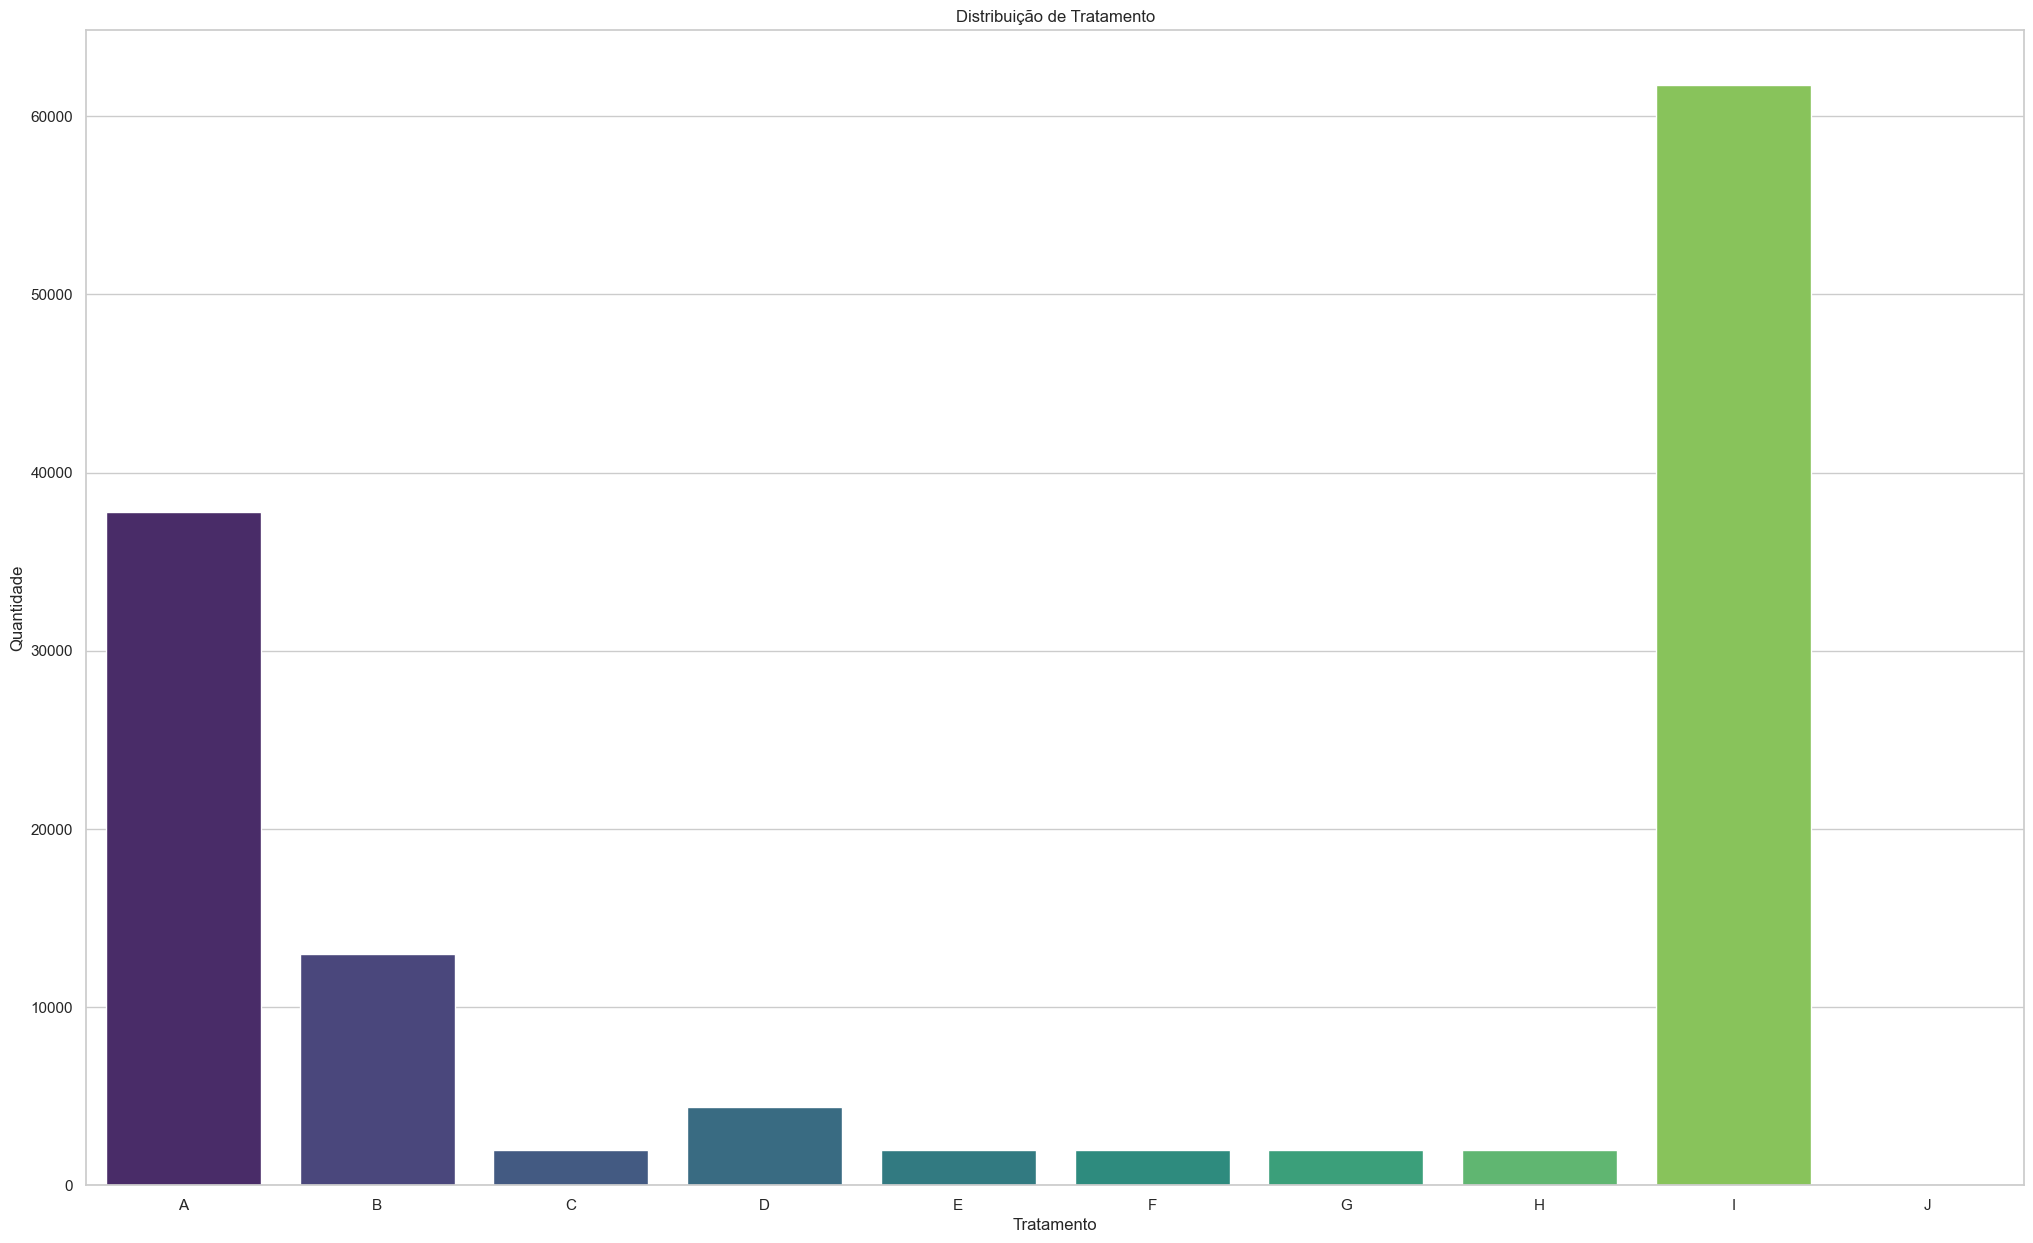

TRATAMENTO
A    37808
B    12976
C     1970
D     4420
E     1970
F     1970
G     1970
H     1970
I    61740
J        9
TRATAMENTO
A    29.816329
B    10.233196
C     1.553591
D     3.485722
E     1.553591
F     1.553591
G     1.553591
H     1.553591
I    48.689700
J     0.007098


In [82]:
tratamento_counts = df_summed.TRATAMENTO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tratamento_counts.index, y=tratamento_counts.values, palette="viridis")

plt.xlabel("Tratamento")
plt.ylabel("Quantidade")
plt.title("Distribuição de Tratamento")

plt.show()
print(df_summed.TRATAMENTO.value_counts().sort_index().to_string())
porcentagem = (df_summed.TRATAMENTO.value_counts(normalize=True).sort_index() * 100)
print(porcentagem.to_string())

In [83]:
df_summed.isnull().sum()

IDADE                                   0
CATEGORIA_ATENDIMENTO                   0
DIAGNOSTICO_E_TRATAMENTO_ANTERIOR       0
CODIGO_BASE_DIAGNOSTICO                 0
ESTADIO_CLINICO                         0
GRUPO_ESTADIO_CLINICO                5252
TNM_T                                   0
TNM_N                                   0
TNM_M                                   0
PSA                                  5252
GLEASON                              5252
TRATAMENTO                              0
ULTIMA_INFORMACAO_PACIENTE           5252
DIAS_ENTRE_CONSULTA_DIAGNOSTICO      5252
DIAS_ENTRE_CONSULTA_TRATAMENTO       5252
DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO    5252
FAIXA_ETARIA                         5252
SEM_RECIDIVA                         5252
CID_O                                   0
METASTASE                            5252
dtype: int64

In [84]:
summed = df_summed[df_summed['TRATAMENTO'].isin(['C', 'E', 'F', 'G', 'H'])]
summed.isnull().sum()

IDADE                                   0
CATEGORIA_ATENDIMENTO                   0
DIAGNOSTICO_E_TRATAMENTO_ANTERIOR       0
CODIGO_BASE_DIAGNOSTICO                 0
ESTADIO_CLINICO                         0
GRUPO_ESTADIO_CLINICO                5252
TNM_T                                   0
TNM_N                                   0
TNM_M                                   0
PSA                                  5252
GLEASON                              5252
TRATAMENTO                              0
ULTIMA_INFORMACAO_PACIENTE           5252
DIAS_ENTRE_CONSULTA_DIAGNOSTICO      5252
DIAS_ENTRE_CONSULTA_TRATAMENTO       5252
DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO    5252
FAIXA_ETARIA                         5252
SEM_RECIDIVA                         5252
CID_O                                   0
METASTASE                            5252
dtype: int64

In [85]:
def imputar_dados(df):
    df = df.copy()

    num_cols = [
        'DIAS_ENTRE_CONSULTA_DIAGNOSTICO',
        'DIAS_ENTRE_CONSULTA_TRATAMENTO',
        'DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO'
    ]
    for col in num_cols:
        if col in df.columns:
            df[col].fillna(0, inplace=True)

    ordinal_cols = ['PSA', 'GLEASON']
    for col in ordinal_cols:
        if col in df.columns:
            df[col].fillna(9, inplace=True)

    bin_cols = ['SEM_RECIDIVA']
    for col in bin_cols:
        if col in df.columns:
            df[col].fillna(1, inplace=True)

    return df

df_final = imputar_dados(df_summed)
df_final = df_final.drop(columns=['GRUPO_ESTADIO_CLINICO', 'FAIXA_ETARIA', 'METASTASE'])
df_final["ULTIMA_INFORMACAO_PACIENTE"].fillna(df_final["ULTIMA_INFORMACAO_PACIENTE"].mode()[0], inplace=True)
df_final = df_final[df_final["TRATAMENTO"] != 'J']

In [86]:
X = df_final.drop(columns=['TRATAMENTO'])
y = df_final['TRATAMENTO']

In [87]:
cat_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

target_size = y.value_counts()[['C', 'E', 'F', 'G', 'H']].mean().astype(int)

sampling_strategy = {label: target_size for label in ['A', 'B', 'D', 'I']}

undersampler = ClusterCentroids(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_minor = X[y.isin(['C', 'E', 'F', 'G', 'H'])]
y_minor = y[y.isin(['C', 'E', 'F', 'G', 'H'])]

X_final = pd.concat([X_minor, pd.DataFrame(X_resampled, columns=X.columns)])
y_final = pd.concat([y_minor, pd.Series(y_resampled, name='TRATAMENTO')])

df_final_cluster = X_final.copy()
df_final_cluster['TRATAMENTO'] = y_final.values

print("Shape final após ClusterCentroids parcial:", df_final_cluster.shape)
print("\nDistribuição final:")
print(df_final_cluster['TRATAMENTO'].value_counts())

Shape final após ClusterCentroids parcial: (27580, 17)

Distribuição final:
TRATAMENTO
C    3940
H    3940
F    3940
E    3940
G    3940
A    1970
B    1970
D    1970
I    1970
Name: count, dtype: int64


In [88]:
df_final_cluster.isnull().sum()

IDADE                                0
CATEGORIA_ATENDIMENTO                0
DIAGNOSTICO_E_TRATAMENTO_ANTERIOR    0
CODIGO_BASE_DIAGNOSTICO              0
ESTADIO_CLINICO                      0
TNM_T                                0
TNM_N                                0
TNM_M                                0
PSA                                  0
GLEASON                              0
ULTIMA_INFORMACAO_PACIENTE           0
DIAS_ENTRE_CONSULTA_DIAGNOSTICO      0
DIAS_ENTRE_CONSULTA_TRATAMENTO       0
DIAS_ENTRE_DIAGNOSTICO_TRATAMENTO    0
SEM_RECIDIVA                         0
CID_O                                0
TRATAMENTO                           0
dtype: int64

In [ ]:
df_final_cluster.to_csv(PROCESSED_DIR / 'df_cluster_centroids.csv', index=False, encoding='utf-8')